# 03 FDG exploration

In [1]:
# install required packages - commented out so it doesn't install every time
#%conda install -n Lauren openpyxl numpy pandas statsmodels plotnine matplotlib scikit-learn scipy mizani nbconvert pandoc pyreadstat kmodes seaborn

# import required packages
import openpyxl; 
import datetime;
import numpy as np;
import pandas as pd;
import statsmodels as sm;
import statsmodels.formula.api as smf;
import plotnine as p9;
import matplotlib;
#import sklearn;
import scipy;
from scipy.stats import linregress;
from scipy.stats import pearsonr;
import itertools
from sklearn import preprocessing 
import inspect
import pickle


# read in and clean data

In [2]:
data_folder_loc = "//admsyn/Primary/ADM/CustomerStudies/Rockefeller/Riluzole_Biomarkers/"
code_folder_loc = "//admsyn/homes/@DH-ADMDX/0/lauren.koenig-1606/code/Riluzole FDG/"

In [3]:
# read in data
composite_rr, pons_rr, para_rr, new_para_rr, new_ras_rr = pd.read_pickle(code_folder_loc + '/output/01_newdata.pkl')

In [4]:
# orig has additional 
# 
# pons (1st) is missing 'L_Hip', 'R_Hip', 'Avg_Hip', 'Temp', 'FRONTAL-gm', 'Avg_MedOrbFrontal', 'Avg PCC'
# para (1st) is missing 'L_Hip', 'R_Hip', 'Avg_Hip', 'Temp', 'FRONTAL-gm', 'Avg_MedOrbFrontal'

# para (new) is missing 'L_Hip', 'R_Hip', 'Avg_Hip', 'Temp', 'Avg PCC', 'Avg_MedOrbFrontal'
# para (new) also has 'SensMot-gm', 'Paracentral-gm', 'RASref1-gm'

# ras (new) is missing 'L_Hip', 'R_Hip', 'Avg_Hip', 'Temp', 'Avg_MedOrbFrontal'
# ras (new) also has 'SensMot-gm', 'Paracentral-gm', 'RASref1-gm', 'CO', 'Graycer-gm', 'Vermis-gm'

In [5]:
FDG_columns = ['Avg_MedOrbFrontal', 'Graycer_gm', 'Avg_PCC', 'Avg_Hip', 'MTL_gm', 'CO', 'Temp', 'SensMot_gm', 'L_Hip',
 'Vermis_gm', 'FRONTAL_gm', 'AC_gm', 'Precun_gm', 'Par_gm', 'RASref1_gm', 'Temp_gm', 'Paracentral_gm', 'R_Hip', 'PostCing_gm']

# define biomarker groups
plasma_columns = [ 'Ab40', 'Ab42', 'Ab42_40', 'GFAP','NFL',  'pTau181', 'pTau217',  'pTau231', 'pTau181_Ab42']
log10_plasma_columns = [s + '_log10' for s in plasma_columns]

cog_columns = ['MMSE', 'adascogtotal', 'bvrt', 'dstotal','tma','tmb',  'cowattotal', 'cdrtotal', 'cdrsum', 'adltotal', 'npitotal', 'gds']
vol_columns = ['VOL_Ventricles_Lz',
       'VOL_Ventricles_Rz', 'VOL_Putamen_Lz', 'VOL_Putamen_Rz',
       'VOL_ParaHip_Lz', 'VOL_ParaHip_Rz', 'VOL_Fusi_Lz', 'VOL_Fusi_Rz',
       'VOL_InfTemp_Lz', 'VOL_InfTemp_Rz', 'VOL_MidTemp_Lz', 'VOL_MidTemp_Rz',
       'VOL_SupTemp_Lz', 'VOL_SupTemp_Rz', 'VOL_Precun_Lz', 'VOL_Precun_Rz',
       'VOL_InfPar_Lz', 'VOL_InfPar_Rz', 'VOL_ParaPostCentr_Lz',
       'VOL_ParaPostCentr_Rz', 'VOL_SupraMarg_Lz', 'VOL_SupraMarg_Rz',
       'VOL_SupPar_Lz', 'VOL_SupPar_Rz', 'VOL_OrbitFront_Lz',
       'VOL_OrbitFront_Rz', 'VOL_Insula_Lz', 'VOL_Insula_Rz',
       'VOL_InfFront_Lz', 'VOL_InfFront_Rz', 'VOL_MidFront_Lz',
       'VOL_MidFront_Rz', 'VOL_SupFront_Lz', 'VOL_SupFront_Rz',
       'VOL_PrecFront_Lz', 'VOL_PrecFront_Rz', 'VOL_LatOcc_Lz',
       'VOL_LatOcc_Rz', 'VOL_Lingual_Lz', 'VOL_Lingual_Rz', 'VOL_Cuneus_Lz',
       'VOL_Cuneus_Rz', 'VOL_Pericalc_Lz', 'VOL_Pericalc_Rz',
       'VOL_AntCingulate_Lz', 'VOL_AntCingulate_Rz', 'VOL_PostCingulate_Lz',
       'VOL_PostCingulate_Rz', 'VOL_Entorhinal_Lz', 'VOL_Entorhinal_Rz',
       'VOL_Hip_Lz', 'VOL_Hip_Rz', 'VOL_TotalGrayz', 'VOL_TotalGray_Lz',
       'VOL_TotalGray_Rz', 'VOL_LatTemp_Lz', 'VOL_LatTemp_Rz',
       'VOL_Parietal_Lz', 'VOL_Parietal_Rz', 'VOL_Frontal_Lz',
       'VOL_Frontal_Rz', 'VOL_InfMidTemp_Lz', 'VOL_InfMidTemp_Rz',
       'VOL_InfInsFrontal_Lz', 'VOL_InfInsFrontal_Rz', 'VOL_MidSupFrontal_Lz',
       'VOL_MidSupFrontal_Rz', 'VOL_Inf_Mid_Fus_Temp_Lz',
       'VOL_Inf_Mid_Fus_Temp_Rz', 'VOL_Precun_InfPar_Lz',
       'VOL_Precun_InfPar_Rz', 'VOL_Precun_InfPar_Supramarg_Lz',
       'VOL_Precun_InfPar_Supramarg_Rz', 'VOL_LatOccLingCun_Lz',
       'VOL_LatOccLingCun_Rz', 'VOL_InfParSupra_Lz', 'VOL_InfParSupra_Rz']



# Model changes over time in trial

## orig rr : only dataset with longitudinal FDG

c:\Users\Lauren.Koenig\AppData\Local\anaconda3\envs\Lauren\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.




 Avg_MedOrbFrontal 0.01
              Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: Avg_MedOrbFrontal
No. Observations:   84      Method:             REML             
No. Groups:         42      Scale:              0.0008           
Min. group size:    2       Log-Likelihood:     121.6042         
Max. group size:    2       Converged:          Yes              
Mean group size:    2.0                                          
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept              -0.018    0.014 -1.307 0.191 -0.046  0.009
timepoint[T.end]       -0.018    0.009 -2.066 0.039 -0.036 -0.001
Group                   0.033    0.020  1.666 0.096 -0.006  0.071
Group:timepoint[T.end]  0.033    0.012  2.634 0.008  0.008  0.057
Group Var               0.003    0.040                          

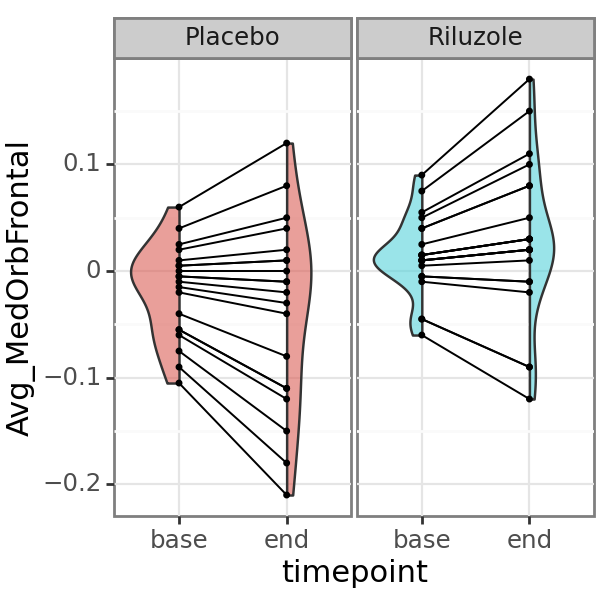




 Avg_PCC 0.0
              Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     Avg_PCC
No. Observations:     84          Method:                 REML   
No. Groups:           42          Scale:                  0.0008 
Min. group size:      2           Log-Likelihood:         97.4864
Max. group size:      2           Converged:              Yes    
Mean group size:      2.0                                        
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               0.923    0.025 37.021 0.000  0.874  0.971
timepoint[T.end]       -0.041    0.009 -4.574 0.000 -0.059 -0.023
Group                  -0.002    0.034 -0.060 0.952 -0.070  0.065
Group:timepoint[T.end]  0.035    0.012  2.844 0.004  0.011  0.060
Group Var               0.012    0.134                           
 



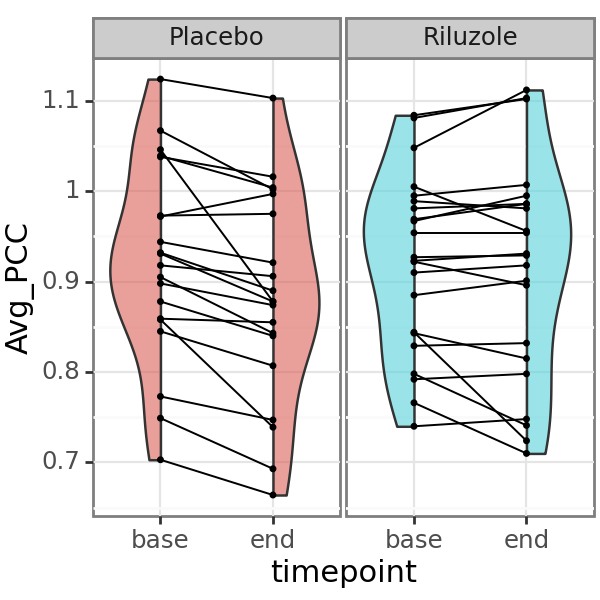

c:\Users\Lauren.Koenig\AppData\Local\anaconda3\envs\Lauren\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.




 Avg_Hip 0.1


c:\Users\Lauren.Koenig\AppData\Local\anaconda3\envs\Lauren\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.




 MTL_gm 0.12


c:\Users\Lauren.Koenig\AppData\Local\anaconda3\envs\Lauren\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.




 Temp 0.01
              Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    Temp    
No. Observations:      84         Method:                REML    
No. Groups:            42         Scale:                 0.0005  
Min. group size:       2          Log-Likelihood:        121.0367
Max. group size:       2          Converged:             Yes     
Mean group size:       2.0                                       
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               0.737    0.018 40.754 0.000  0.702  0.772
timepoint[T.end]       -0.023    0.007 -3.275 0.001 -0.036 -0.009
Group                  -0.003    0.025 -0.116 0.907 -0.052  0.046
Group:timepoint[T.end]  0.025    0.009  2.610 0.009  0.006  0.043
Group Var               0.006    0.092                           
 



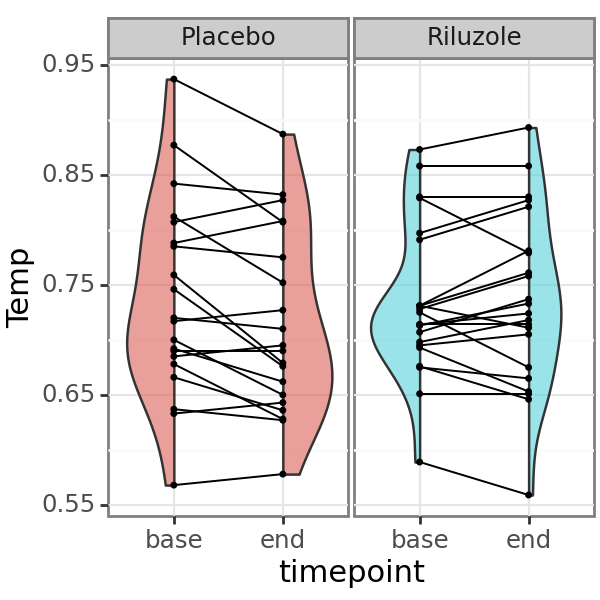

c:\Users\Lauren.Koenig\AppData\Local\anaconda3\envs\Lauren\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.




 L_Hip 0.41


c:\Users\Lauren.Koenig\AppData\Local\anaconda3\envs\Lauren\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.




 FRONTAL_gm 0.01
              Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    FRONTAL_gm
No. Observations:    84         Method:                REML      
No. Groups:          42         Scale:                 0.0023    
Min. group size:     2          Log-Likelihood:        95.4427   
Max. group size:     2          Converged:             Yes       
Mean group size:     2.0                                         
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               0.983    0.017 57.930 0.000  0.950  1.016
timepoint[T.end]       -0.130    0.015 -8.531 0.000 -0.160 -0.100
Group                  -0.025    0.023 -1.070 0.285 -0.071  0.021
Group:timepoint[T.end]  0.053    0.021  2.490 0.013  0.011  0.094
Group Var               0.003    0.030                           
 



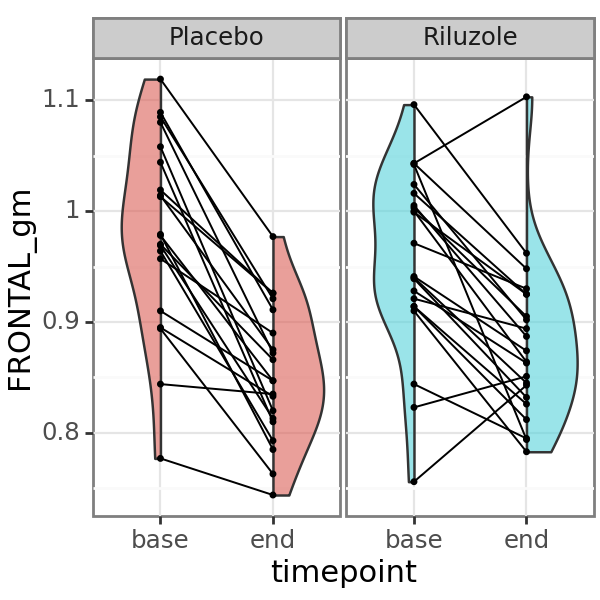

c:\Users\Lauren.Koenig\AppData\Local\anaconda3\envs\Lauren\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.




 AC_gm 0.04
              Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    AC_gm   
No. Observations:      84         Method:                REML    
No. Groups:            42         Scale:                 0.0006  
Min. group size:       2          Log-Likelihood:        115.3054
Max. group size:       2          Converged:             Yes     
Mean group size:       2.0                                       
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               0.812    0.018 43.916 0.000  0.775  0.848
timepoint[T.end]       -0.015    0.008 -1.989 0.047 -0.031 -0.000
Group                  -0.015    0.026 -0.588 0.557 -0.065  0.035
Group:timepoint[T.end]  0.022    0.011  2.073 0.038  0.001  0.043
Group Var               0.006    0.084                           
 



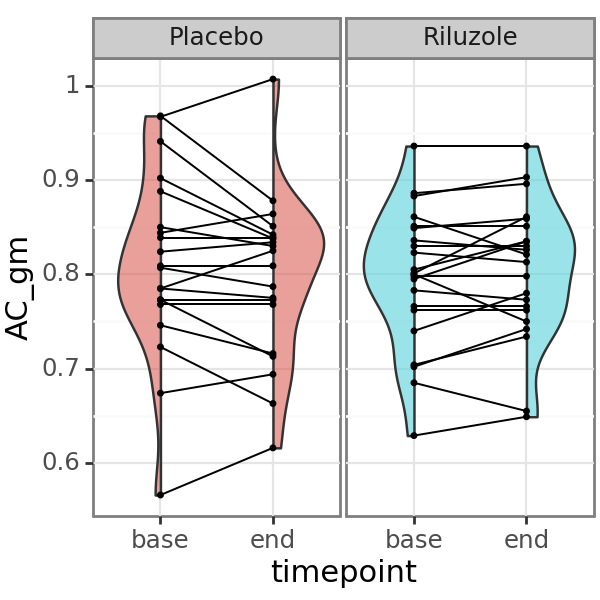




 Precun_gm 0.01
              Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    Precun_gm
No. Observations:     84         Method:                REML     
No. Groups:           42         Scale:                 0.0004   
Min. group size:      2          Log-Likelihood:        112.1655 
Max. group size:      2          Converged:             Yes      
Mean group size:      2.0                                        
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               0.921    0.023 39.983 0.000  0.875  0.966
timepoint[T.end]       -0.032    0.007 -4.862 0.000 -0.046 -0.019
Group                   0.004    0.032  0.116 0.908 -0.059  0.066
Group:timepoint[T.end]  0.026    0.009  2.776 0.006  0.008  0.044
Group Var               0.010    0.155                           
 



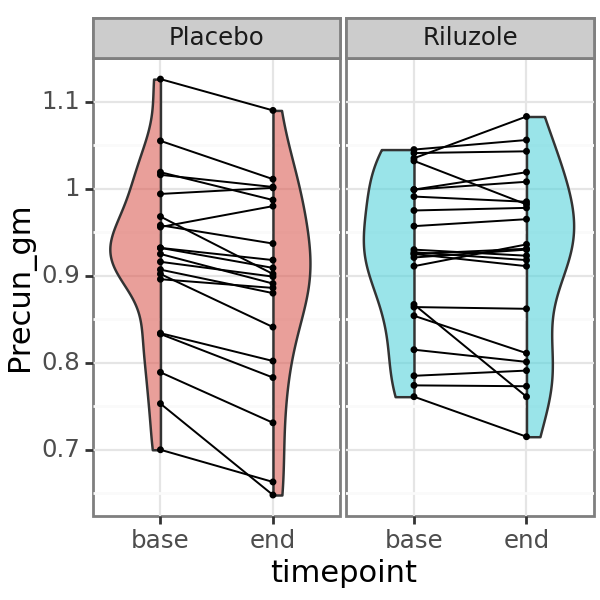




 Par_gm 0.09


c:\Users\Lauren.Koenig\AppData\Local\anaconda3\envs\Lauren\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.




 Temp_gm 0.01
              Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    Temp_gm 
No. Observations:      84         Method:                REML    
No. Groups:            42         Scale:                 0.0005  
Min. group size:       2          Log-Likelihood:        117.0164
Max. group size:       2          Converged:             Yes     
Mean group size:       2.0                                       
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               0.794    0.019 41.277 0.000  0.756  0.831
timepoint[T.end]       -0.023    0.007 -3.223 0.001 -0.037 -0.009
Group                  -0.009    0.027 -0.340 0.734 -0.061  0.043
Group:timepoint[T.end]  0.027    0.010  2.747 0.006  0.008  0.046
Group Var               0.007    0.100                           
 



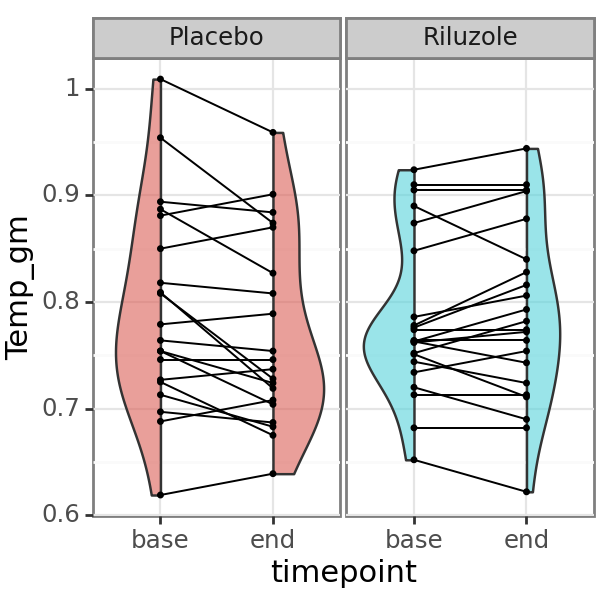




 R_Hip 0.02
              Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    R_Hip   
No. Observations:      84         Method:                REML    
No. Groups:            42         Scale:                 0.0005  
Min. group size:       2          Log-Likelihood:        103.8632
Max. group size:       2          Converged:             Yes     
Mean group size:       2.0                                       
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               0.589    0.026 22.849 0.000  0.539  0.640
timepoint[T.end]       -0.022    0.007 -2.997 0.003 -0.036 -0.008
Group                   0.013    0.036  0.364 0.716 -0.057  0.083
Group:timepoint[T.end]  0.024    0.010  2.330 0.020  0.004  0.044
Group Var               0.013    0.177                           
 



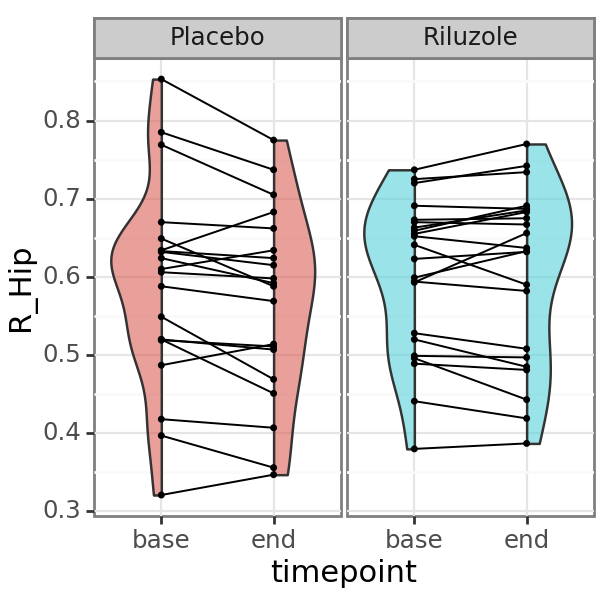




 PostCing_gm 0.0
              Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   PostCing_gm
No. Observations:     84        Method:               REML       
No. Groups:           42        Scale:                0.0006     
Min. group size:      2         Log-Likelihood:       101.7850   
Max. group size:      2         Converged:            Yes        
Mean group size:      2.0                                        
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               0.927    0.025 36.753 0.000  0.878  0.977
timepoint[T.end]       -0.050    0.008 -6.300 0.000 -0.065 -0.034
Group                   0.021    0.035  0.602 0.547 -0.047  0.089
Group:timepoint[T.end]  0.045    0.011  4.132 0.000  0.024  0.067
Group Var               0.012    0.157                           
 



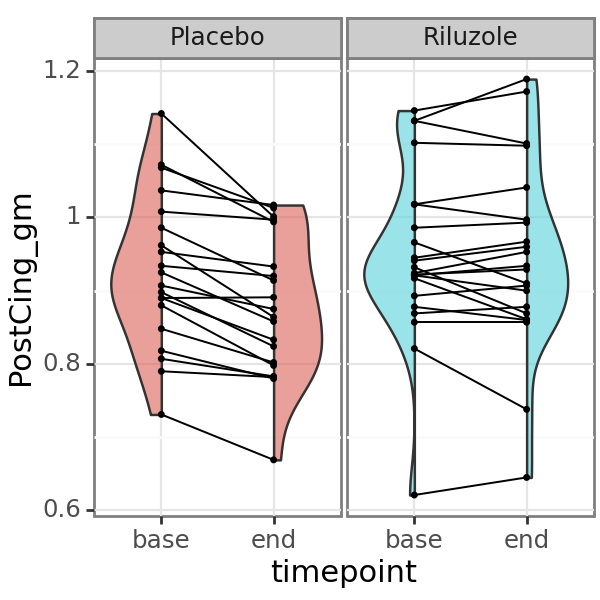

"# v2 of model - calculate change from baseline to followup and model the delta\n# gave almost identical pvalues, slightly less significant\n    temp_df = composite_rr[composite_rr['Group'].isin(['Placebo', 'Riluzole']) & composite_rr['timepoint'].isin(['base', 'end'])].dropna(subset = [var, 'Group'])\n    ppts_with_multiple_visits = temp_df['ID_ADM'].value_counts()[temp_df['ID_ADM'].value_counts()>1].index\n    temp_df = temp_df[temp_df['ID_ADM'].isin(ppts_with_multiple_visits)]\n    temp_df = temp_df.sort_values(['ID_ADM', 'timepoint'])\n    temp_df = pd.merge(temp_df[['ID_ADM', 'Group']], temp_df.groupby(['ID_ADM'])[var].diff(), left_index=True, right_index=True).dropna()\n    temp_df['Group'] = temp_df['Group'].replace({'Placebo':'0', 'Riluzole':'1'}).astype('int')\n    model2 = smf.logit(formula ='Group ~ ' + var, data = temp_df).fit(disp = 0);\n    model2_p = model2.pvalues[var].round(2).astype('str')\n    "

In [6]:
p9.options.figure_size = (3,3)

graphing_vars = ['Group']
for var in [ele for ele in FDG_columns if ele in composite_rr.columns]:


### v1 of model - use timepoint in a mixed model
    temp_df = composite_rr[composite_rr['Group'].isin(['Placebo', 'Riluzole'])].dropna(subset = [var, 'Group'])
    temp_df['Group'] = temp_df['Group'].replace({'Placebo':'0', 'Riluzole':'1'}).astype('int')
    model = smf.mixedlm(formula =var + '~ Group + timepoint + Group:timepoint', data = temp_df, groups = temp_df['ID_ADM']).fit(disp = 0);
    model_p = model.pvalues['Group:timepoint[T.end]'].round(2).astype('str')
    print('\n\n', var, model_p)
    if (model.pvalues['Group:timepoint[T.end]'] < 0.05):
        print(model.summary(),'\n')
        plot = (p9.ggplot(composite_rr[composite_rr['Group'].isin(['Placebo', 'Riluzole']) & composite_rr['timepoint'].isin(['base', 'end'])], p9.aes(x = 'timepoint', y = var)) 
                + p9.theme_bw(base_size=11) 
                + p9.geom_violin(p9.aes(fill = graphing_vars[0]), alpha = 0.6, style="left-right") 
                + p9.geom_point(size = 0.4)
                + p9.geom_line(p9.aes(group="ID_ADM"), size = 0.4)                
                + p9.facet_grid('~' + graphing_vars[0])
                + p9.theme(legend_position = "none", axis_text_x = p9.element_text(rotation = 0), plot_title = p9.element_text(size = 10), plot_subtitle = p9.element_text(size = 8))
                )  
        print(plot)

'''# v2 of model - calculate change from baseline to followup and model the delta
# gave almost identical pvalues, slightly less significant
    temp_df = composite_rr[composite_rr['Group'].isin(['Placebo', 'Riluzole']) & composite_rr['timepoint'].isin(['base', 'end'])].dropna(subset = [var, 'Group'])
    ppts_with_multiple_visits = temp_df['ID_ADM'].value_counts()[temp_df['ID_ADM'].value_counts()>1].index
    temp_df = temp_df[temp_df['ID_ADM'].isin(ppts_with_multiple_visits)]
    temp_df = temp_df.sort_values(['ID_ADM', 'timepoint'])
    temp_df = pd.merge(temp_df[['ID_ADM', 'Group']], temp_df.groupby(['ID_ADM'])[var].diff(), left_index=True, right_index=True).dropna()
    temp_df['Group'] = temp_df['Group'].replace({'Placebo':'0', 'Riluzole':'1'}).astype('int')
    model2 = smf.logit(formula ='Group ~ ' + var, data = temp_df).fit(disp = 0);
    model2_p = model2.pvalues[var].round(2).astype('str')
    '''

# All data by age

## drop followup FDG data

In [7]:
composite_rr = composite_rr[composite_rr['timepoint'].isin(['base', 'not part of trial'])]
composite_rr

Subject_ID  L_Hip  R_Hip  Avg_Hip   Temp  Temp_gm  MTL_gm  PostCing_gm  \
0    APE-792-018  0.515  0.397    0.456  0.746    0.808   0.619        0.731   
1    APE-792-026  0.586  0.632    0.609  0.720    0.764   0.649        0.934   
2        RIL-001  0.658  0.588    0.623  0.666    0.713   0.686        0.818   
3        RIL-018  0.609  0.633    0.621  0.785    0.818   0.693        0.907   
4        RIL-019  0.566  0.418    0.492  0.637    0.697   0.538        0.848   
..           ...    ...    ...      ...    ...      ...     ...          ...   
254          NaN    NaN    NaN      NaN    NaN      NaN     NaN          NaN   
255          NaN    NaN    NaN      NaN    NaN      NaN     NaN          NaN   
256          NaN    NaN    NaN      NaN    NaN      NaN     NaN          NaN   
257          NaN    NaN    NaN      NaN    NaN      NaN     NaN          NaN   
259          NaN    NaN    NaN      NaN    NaN      NaN     NaN          NaN   

     Precun_gm  Avg_PCC  ...  Aseg_vol_R_LATVENT  Aseg_vol_R_PALLIDUM  \
0        0.925    0.878  ...             49617.5               2552.9   
1        0.932    0.918  ...                 NaN                  NaN   
2        0.700    0.703  ...                 NaN                  NaN   
3        0.932    0.932  ...             30004.4               1557.7   
4        0.902    0.905  ...             23185.4               1029.6   
..         ...      ...  ...                 ...                  ...   
254        NaN      NaN  ...                 NaN                  NaN   
255        NaN      NaN  ...                 NaN                  NaN   
256        NaN      NaN  ...                 NaN                  NaN   
257        NaN      NaN  ...                 NaN                  NaN   
259        NaN      NaN  ...                 NaN                  NaN   

     Aseg_vol_R_PUTAMEN  Aseg_vol_R_THALAMUS Aseg_vol_R_VENTRALDC  \
0                2792.8               7919.0               4099.3   
1                   NaN                  NaN                  NaN   
2                   NaN                  NaN                  NaN   
3                3916.6               5666.2               3268.6   
4                2849.0               4318.4               2754.3   
..                  ...                  ...                  ...   
254                 NaN                  NaN                  NaN   
255                 NaN                  NaN                  NaN   
256                 NaN                  NaN                  NaN   
257                 NaN                  NaN                  NaN   
259                 NaN                  NaN                  NaN   

    Aseg_vol_R_VESSEL  Aseg_vol_B_WM_HYPOINT                       source  \
0                 0.0                 8957.3  Riluzole Trial Participants   
1                 NaN                    NaN  Riluzole Trial Participants   
2                 NaN                    NaN  Riluzole Trial Participants   
3                56.7                 3992.2  Riluzole Trial Participants   
4                64.9                 7965.9  Riluzole Trial Participants   
..                ...                    ...                          ...   
254               NaN                    NaN                      Control   
255               NaN                    NaN                 Non-Trial AD   
256               NaN                    NaN                Non-Trial MCI   
257               NaN                    NaN                      Control   
259               NaN                    NaN  Riluzole Trial Participants   

                          Group2   Group3  
0    Riluzole Trial Participants  Placebo  
1    Riluzole Trial Participants  Placebo  
2    Riluzole Trial Participants  Placebo  
3    Riluzole Trial Participants  Placebo  
4    Riluzole Trial Participants  Placebo  
..                           ...      ...  
254                      Control      NaN  
255                      Control      NaN  
256               

## FDG - composite rr

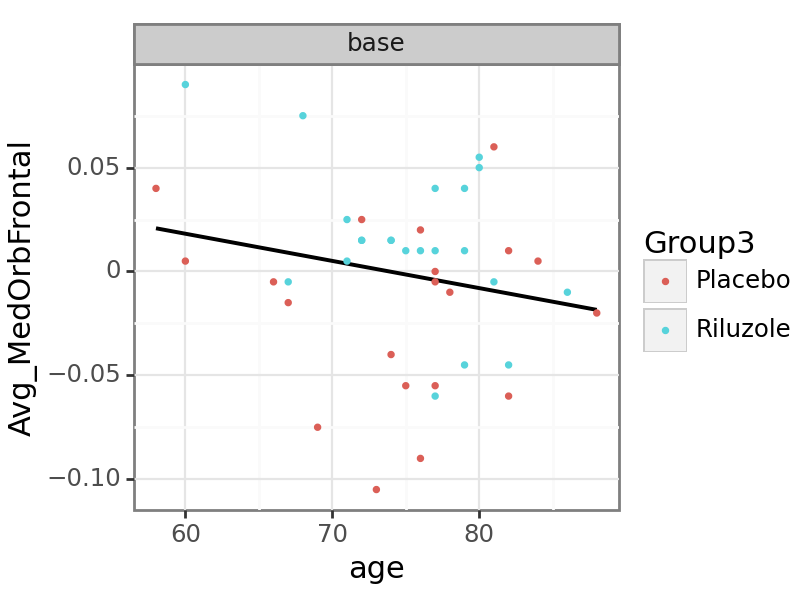

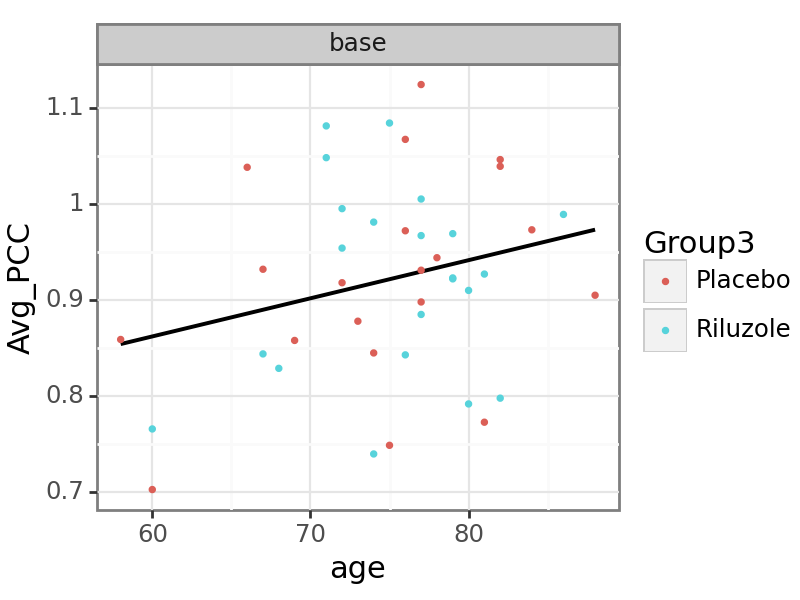

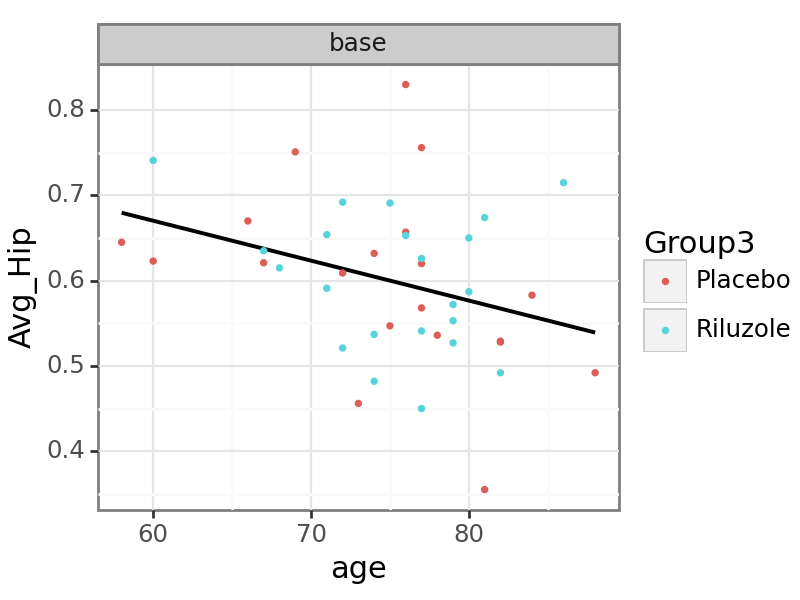

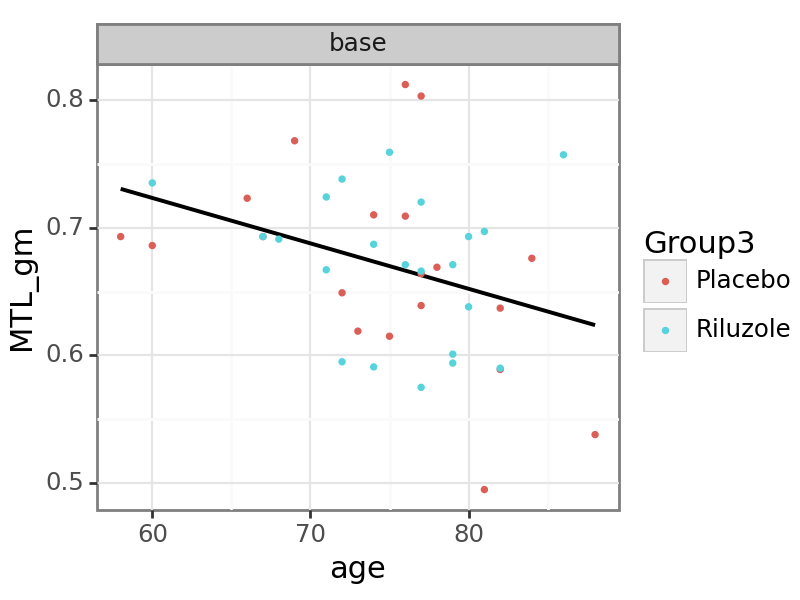

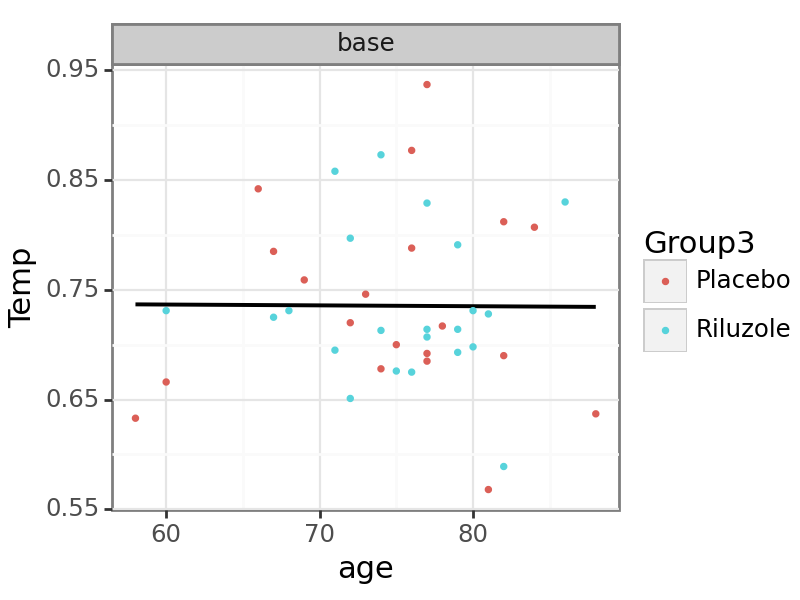

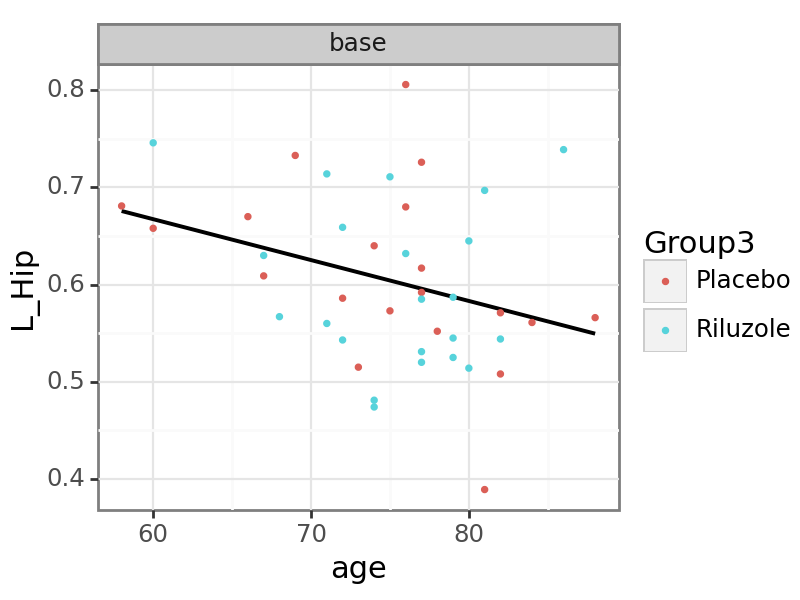

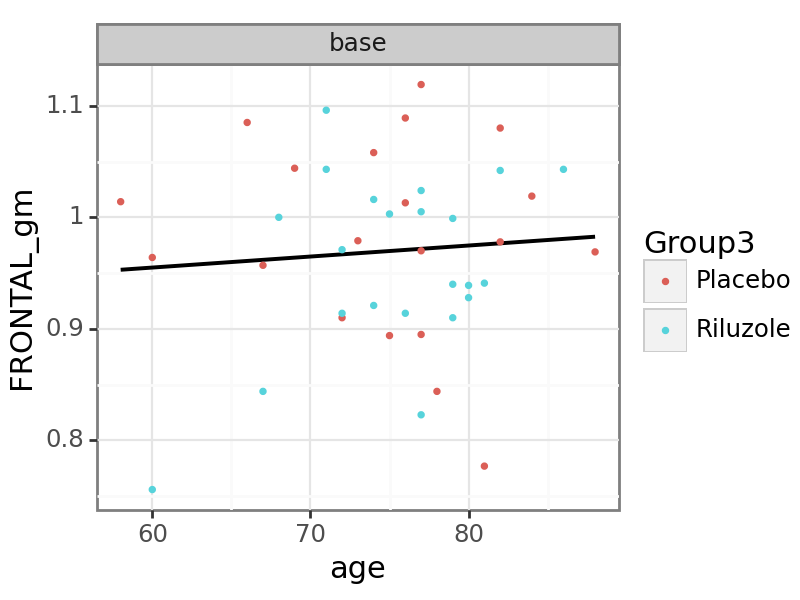

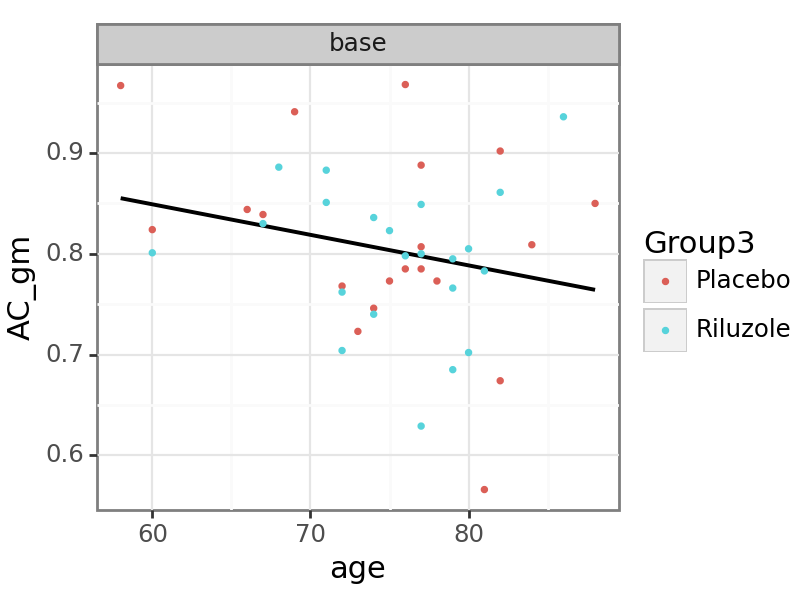

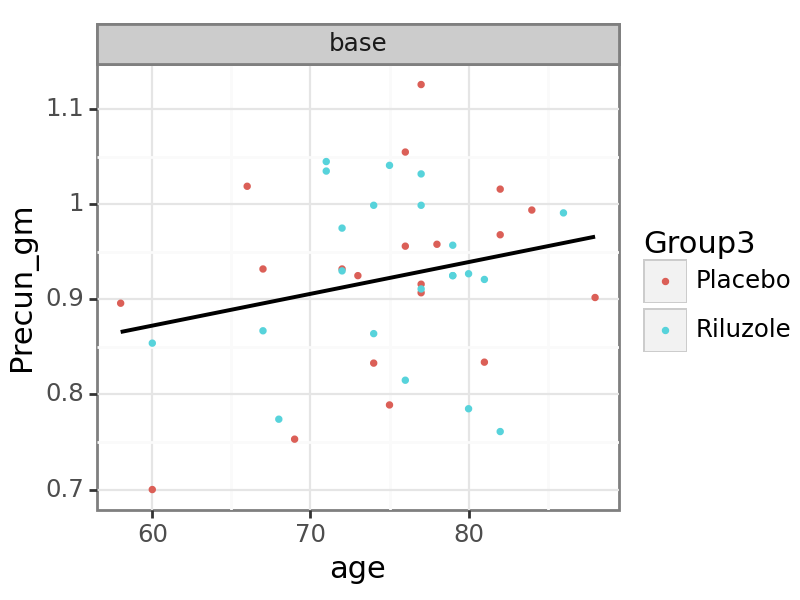

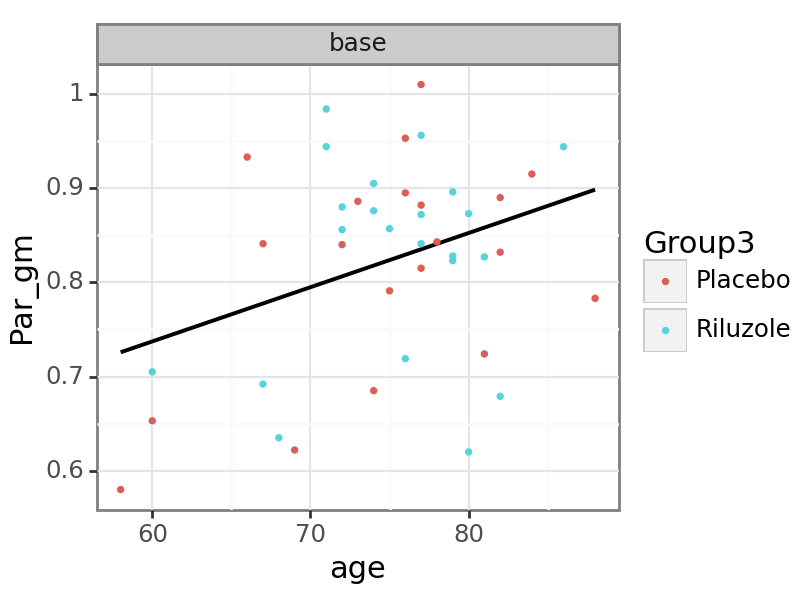

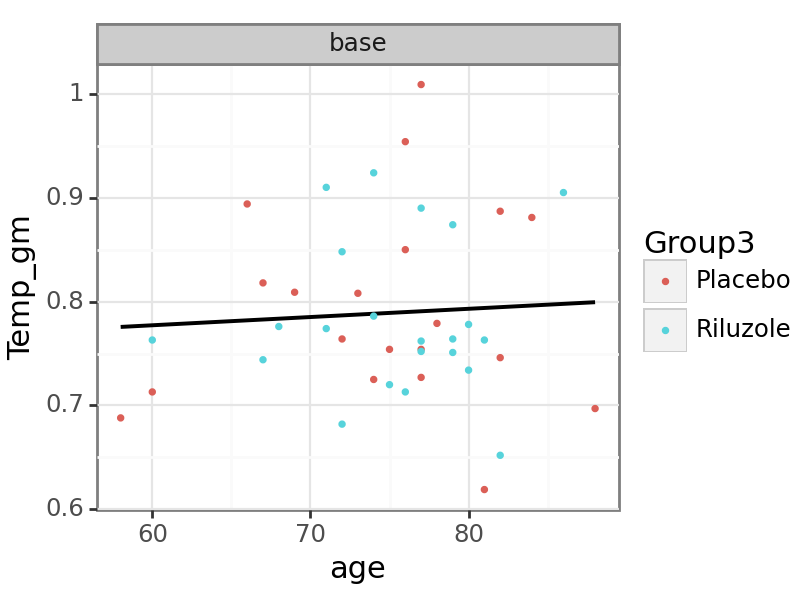

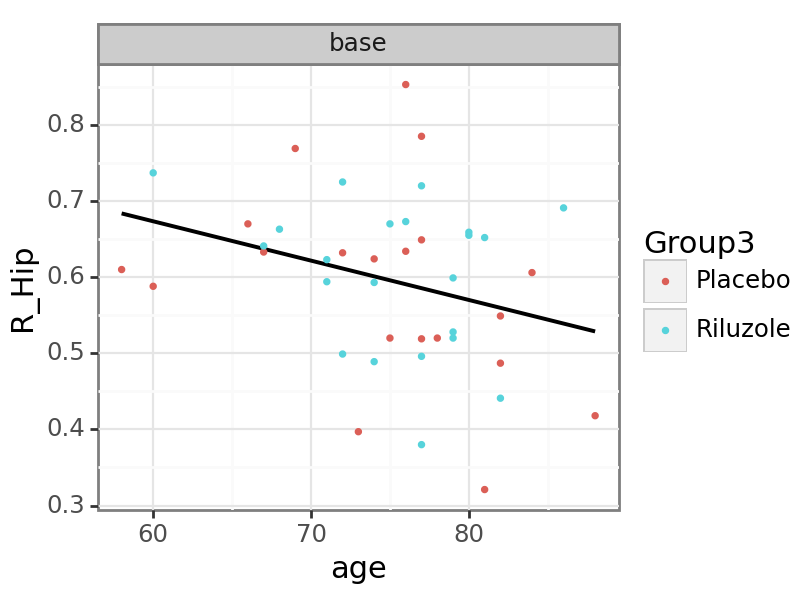

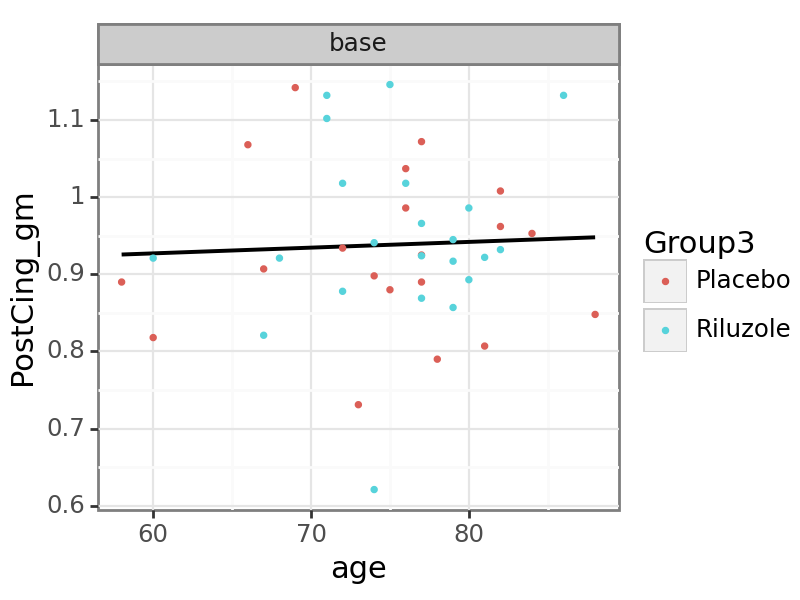

In [8]:
p9.options.figure_size = (4,3)
for var in [ele for ele in FDG_columns if ele in composite_rr.columns]:
    subset_data = composite_rr[composite_rr['timepoint'].isin(['base', 'not part of trial'])].dropna(subset = [var,'age', 'Group3'])
    subset_pons_rr = subset_data.copy()
    subset_pons_rr = subset_pons_rr.groupby('source', observed=True).filter(lambda x: x['ID_ADM'].nunique()> 6)

    plot = (
            p9.ggplot(subset_data, p9.aes(x = 'age', y = var, color = 'Group3'))
            + p9.theme_bw(base_size = 11)
            + p9.geom_smooth(subset_pons_rr, size = 0.8, se = False, color = 'black', method = 'lm')
            + p9.geom_point(size = 0.5)
            + p9.facet_grid('~timepoint')
    )
    print(plot)

## FDG - pons rr

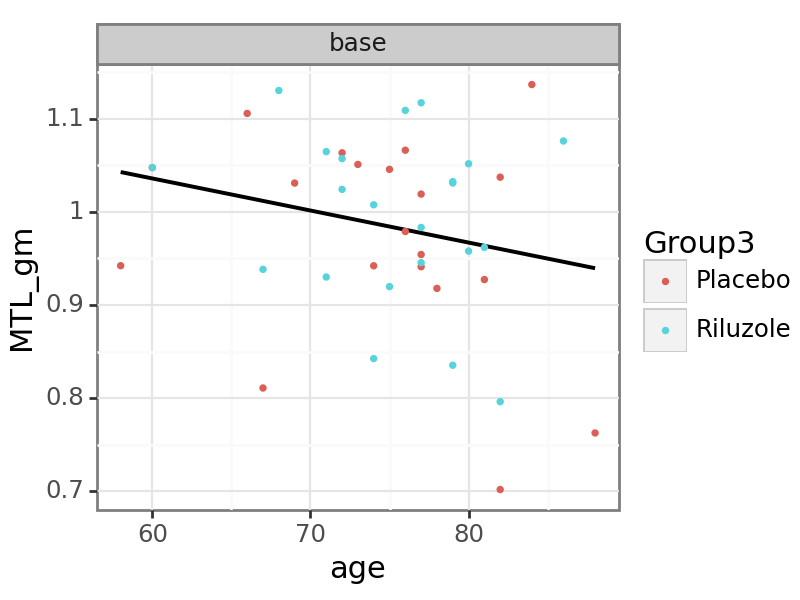

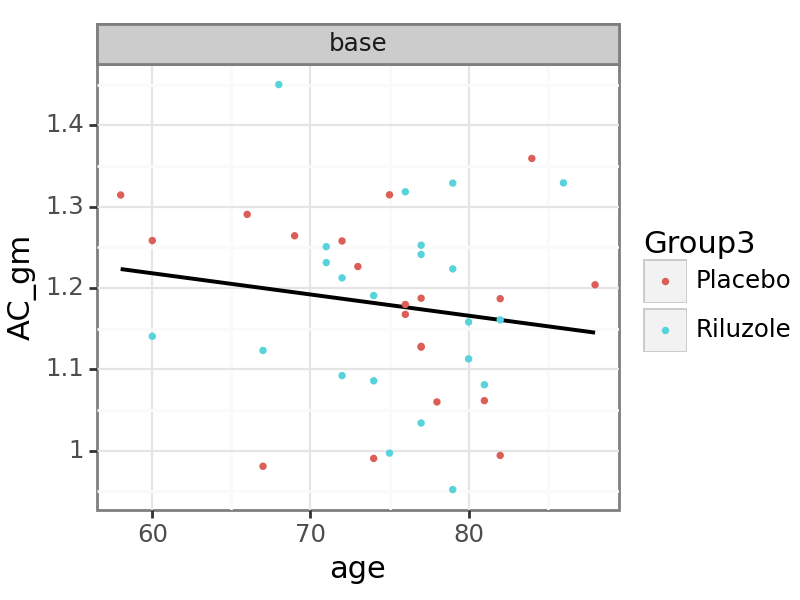

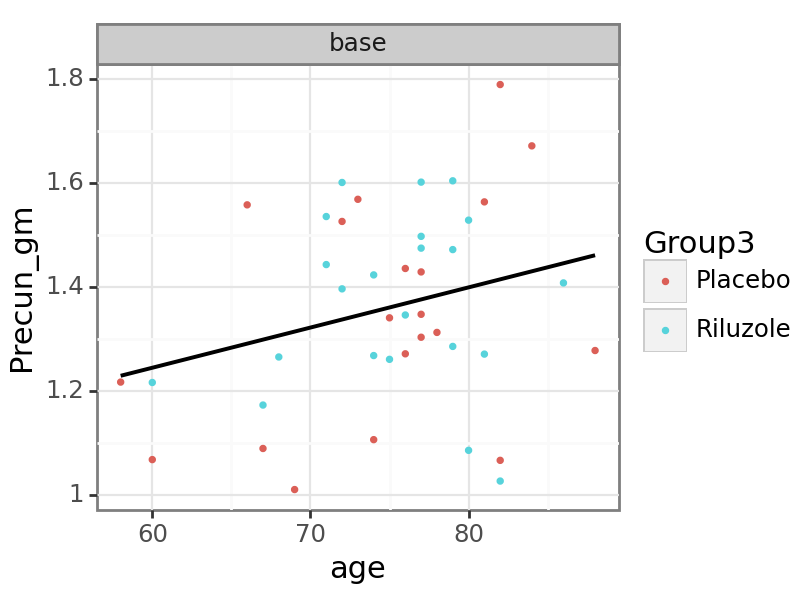

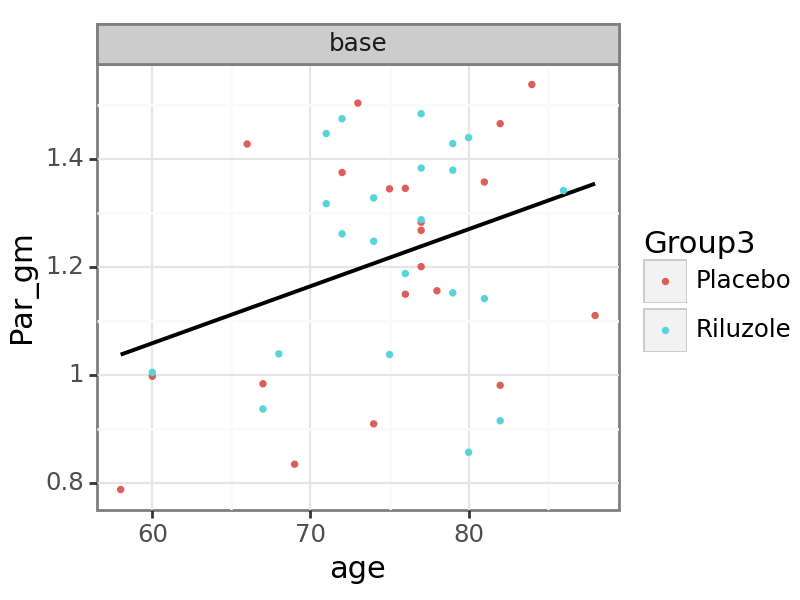

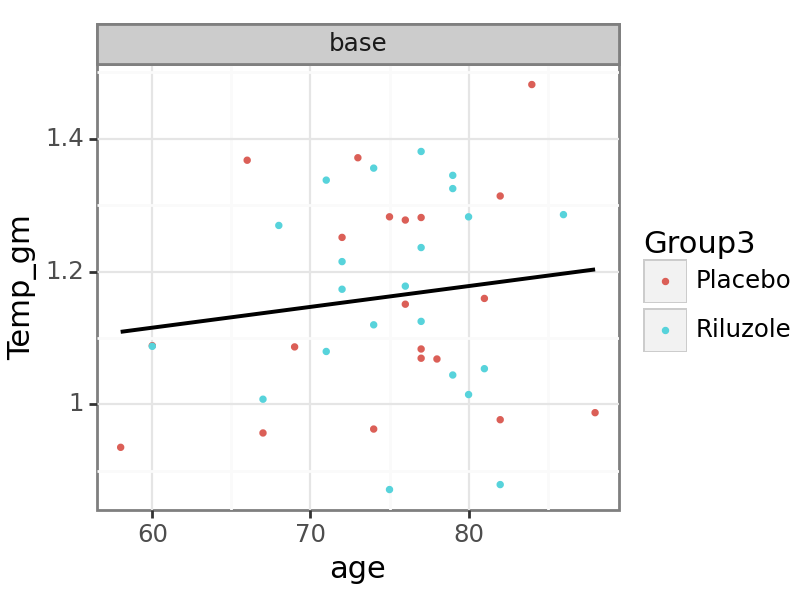

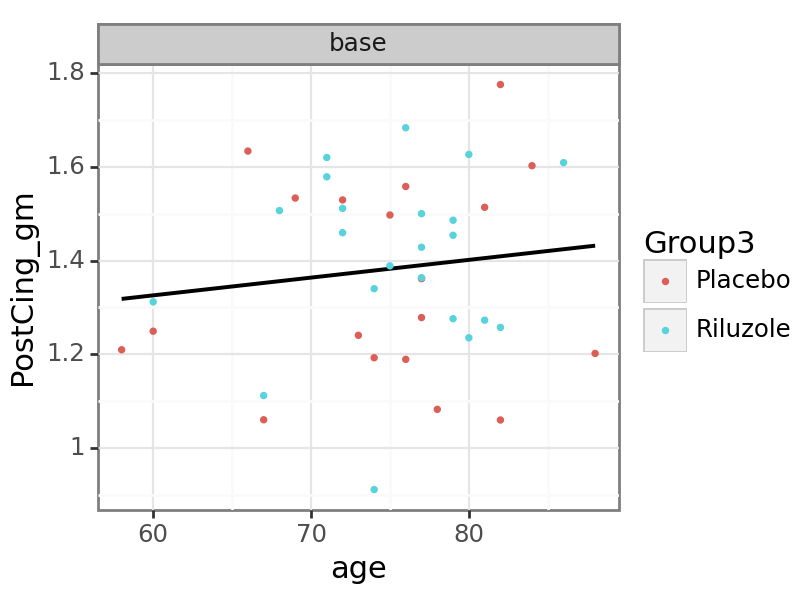

In [9]:
p9.options.figure_size = (4,3)
for var in [ele for ele in FDG_columns if ele in pons_rr.columns]:
    subset_data = pons_rr.dropna(subset = [var,'age', 'Group3'])
    subset_pons_rr = subset_data.copy()
    subset_pons_rr = subset_pons_rr.groupby('source', observed=True).filter(lambda x: x['ID_ADM'].nunique()> 6)

    plot = (
            p9.ggplot(subset_data, p9.aes(x = 'age', y = var, color = 'Group3'))
            + p9.theme_bw(base_size = 11)
            + p9.geom_smooth(subset_pons_rr, size = 0.8, se = False, color = 'black', method = 'lm')
            + p9.geom_point(size = 0.5)
            + p9.facet_grid('~timepoint')
    )
    print(plot)

## FDG - para2 rr

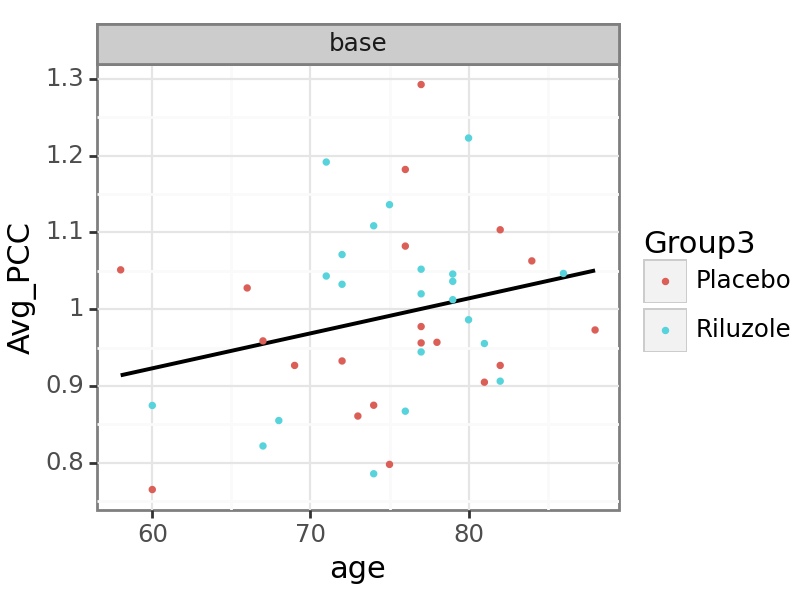

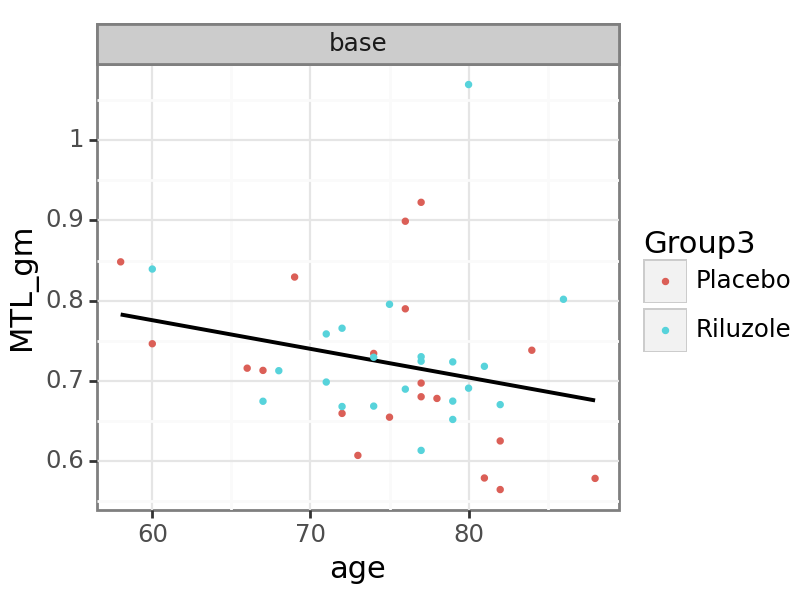

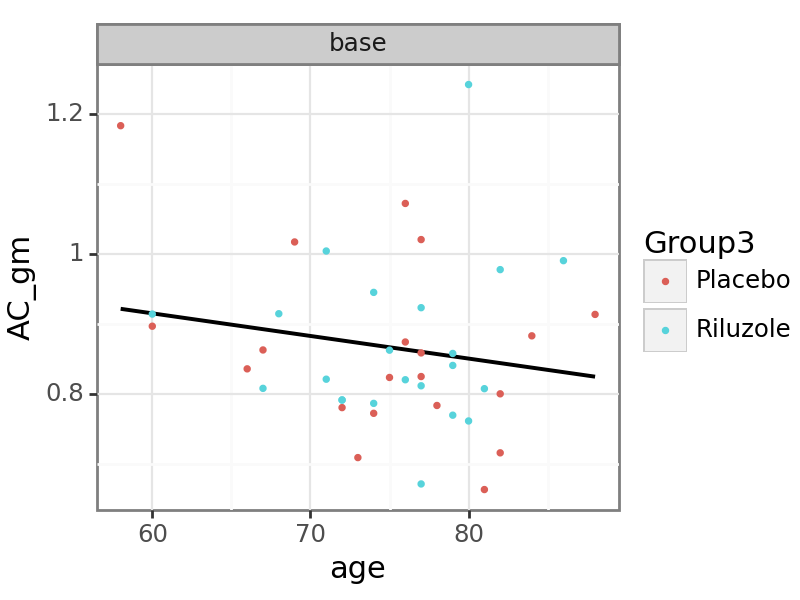

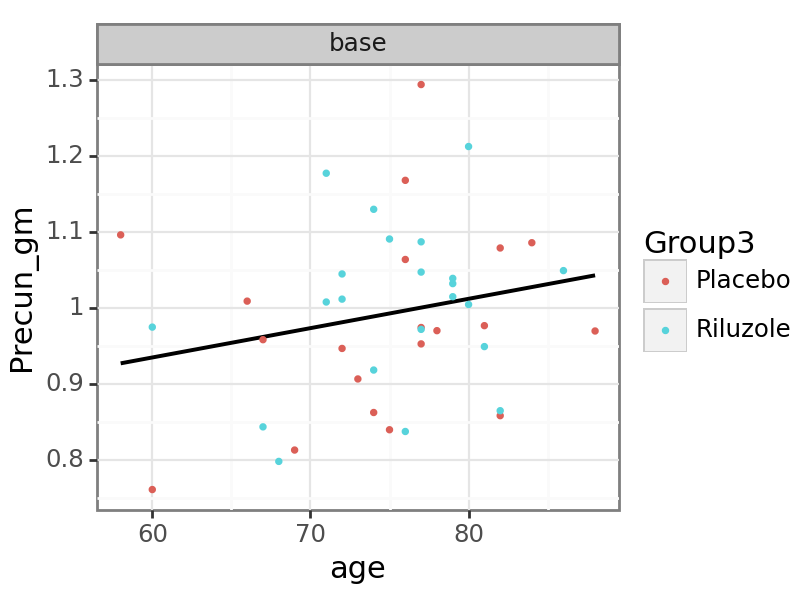

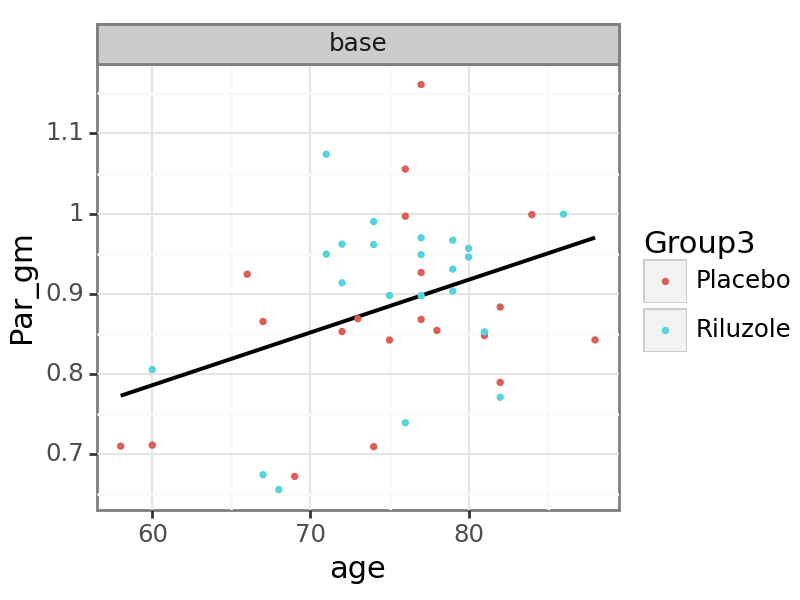

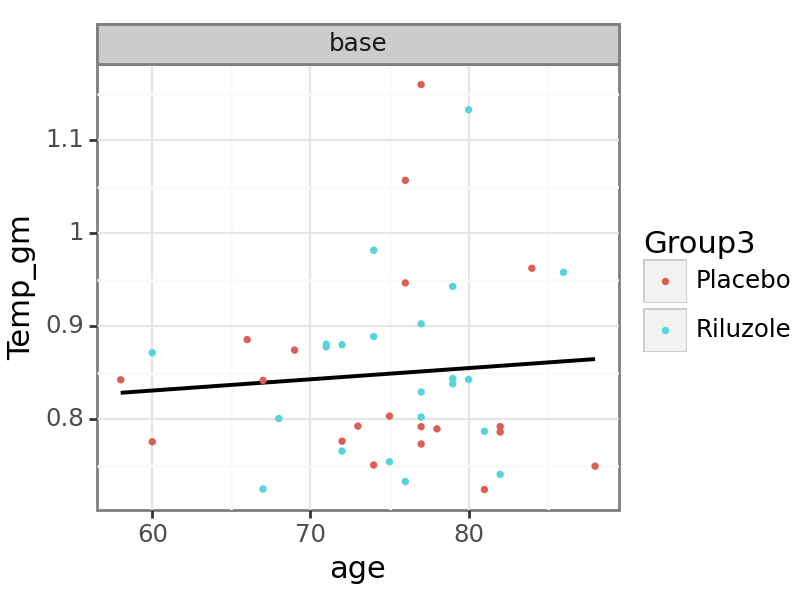

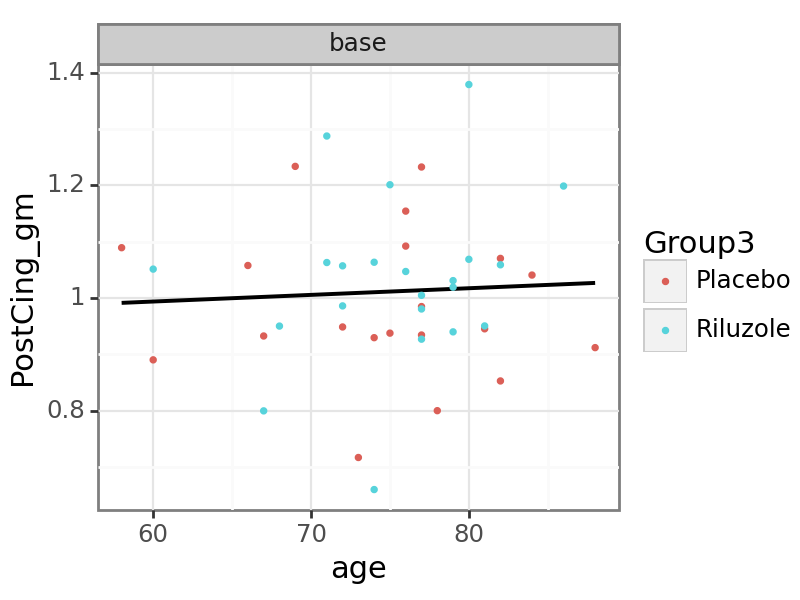

In [10]:
p9.options.figure_size = (4,3)
for var in [ele for ele in FDG_columns if ele in para_rr.columns]:
    subset_data = para_rr.dropna(subset = [var,'age', 'Group3'])
    subset_pons_rr = subset_data.copy()
    subset_pons_rr = subset_pons_rr.groupby('source', observed=True).filter(lambda x: x['ID_ADM'].nunique()> 6)

    plot = (
            p9.ggplot(subset_data, p9.aes(x = 'age', y = var, color = 'Group3'))
            + p9.theme_bw(base_size = 11)
            + p9.geom_smooth(subset_pons_rr, size = 0.8, se = False, color = 'black', method = 'lm')
            + p9.geom_point(size = 0.5)
            + p9.facet_grid('~timepoint')
    )
    print(plot)

## new_para_rr

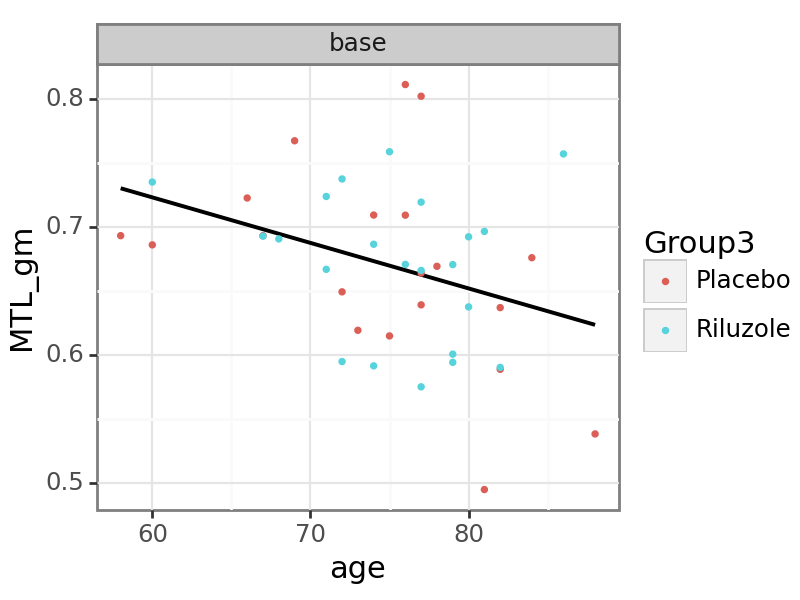

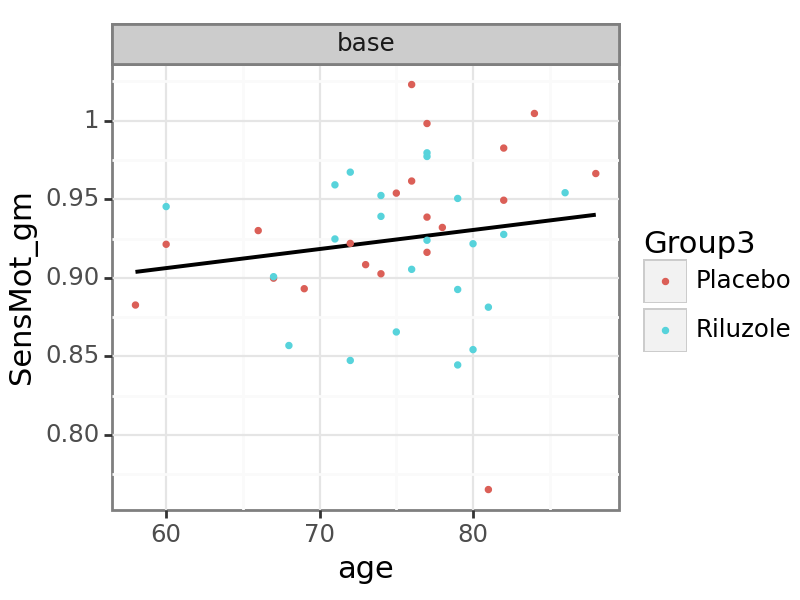

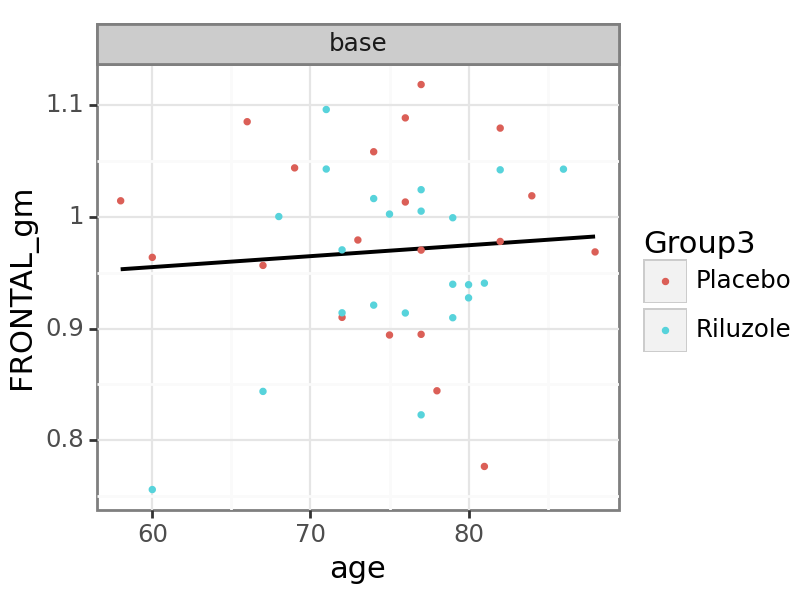

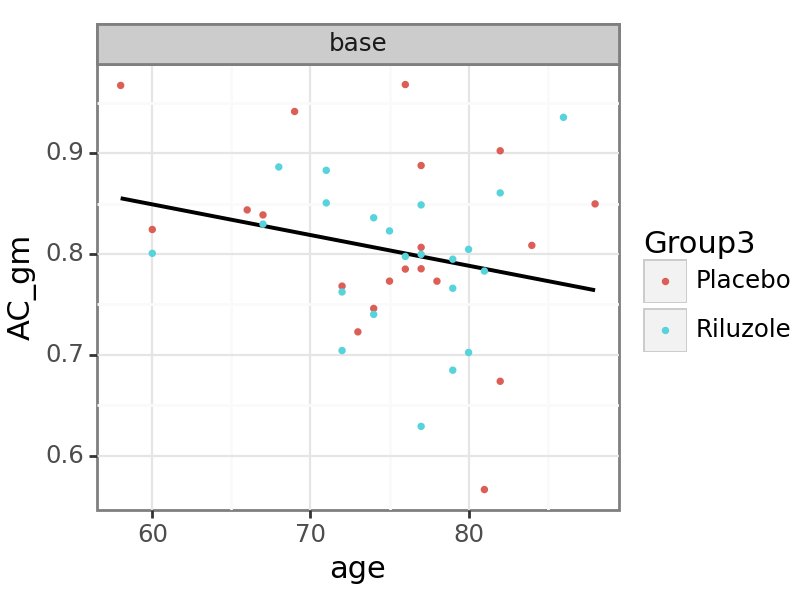

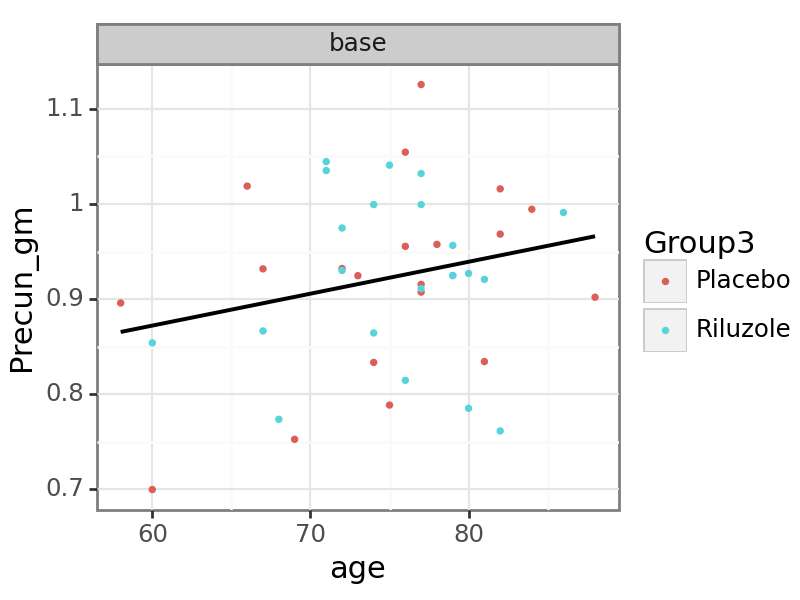

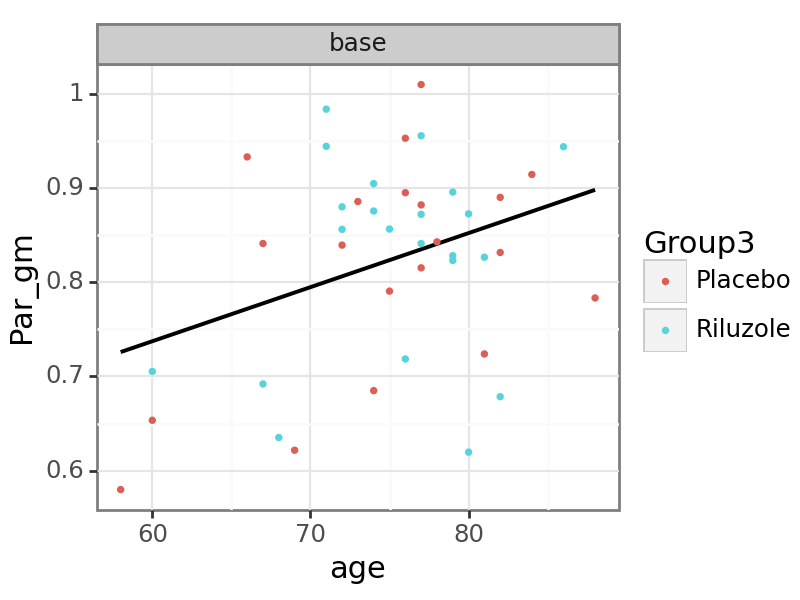

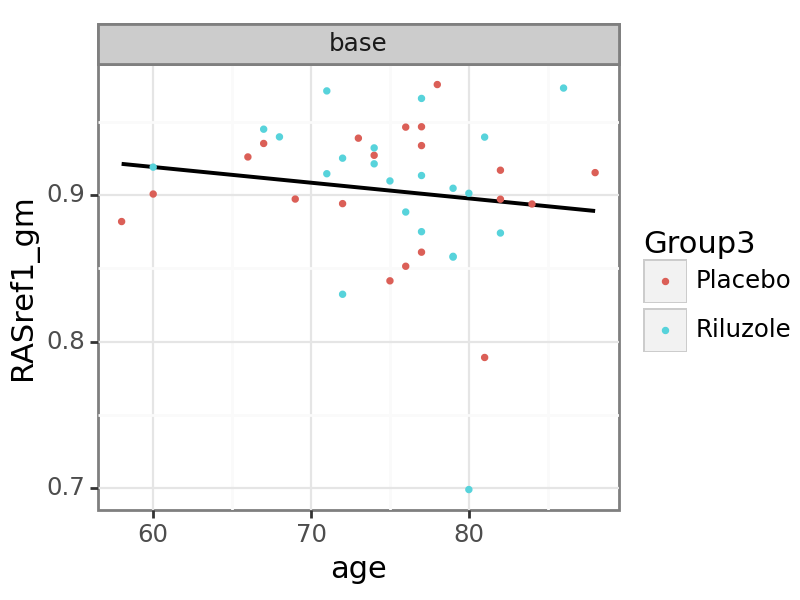

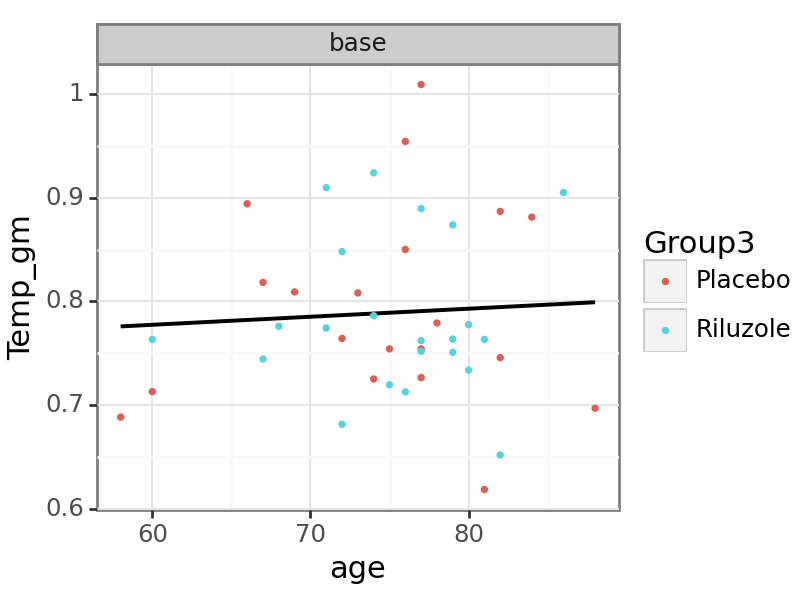

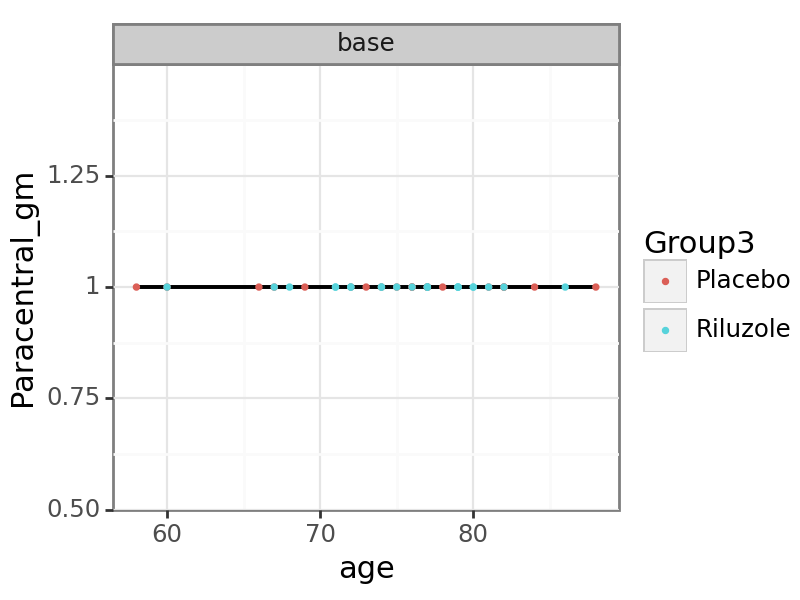

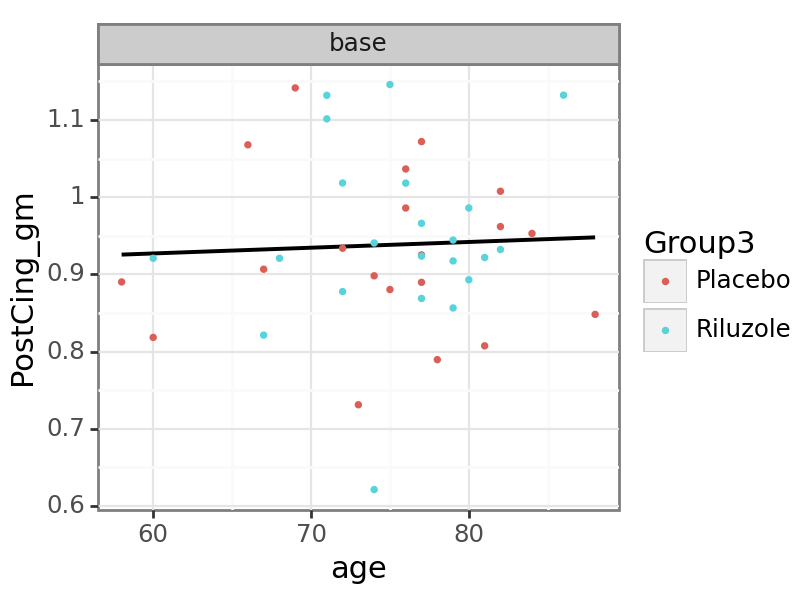

In [11]:
p9.options.figure_size = (4,3)
for var in [ele for ele in FDG_columns if ele in new_para_rr.columns]:
    subset_data = new_para_rr.dropna(subset = [var,'age', 'Group3'])
    subset_pons_rr = subset_data.copy()
    subset_pons_rr = subset_pons_rr.groupby('source', observed=True).filter(lambda x: x['ID_ADM'].nunique()> 6)

    plot = (
            p9.ggplot(subset_data, p9.aes(x = 'age', y = var, color = 'Group3'))
            + p9.theme_bw(base_size = 11)
            + p9.geom_smooth(subset_pons_rr, size = 0.8, se = False, color = 'black', method = 'lm')
            + p9.geom_point(size = 0.5)
            + p9.facet_grid('~timepoint')
    )
    print(plot)

## new_ras_rr

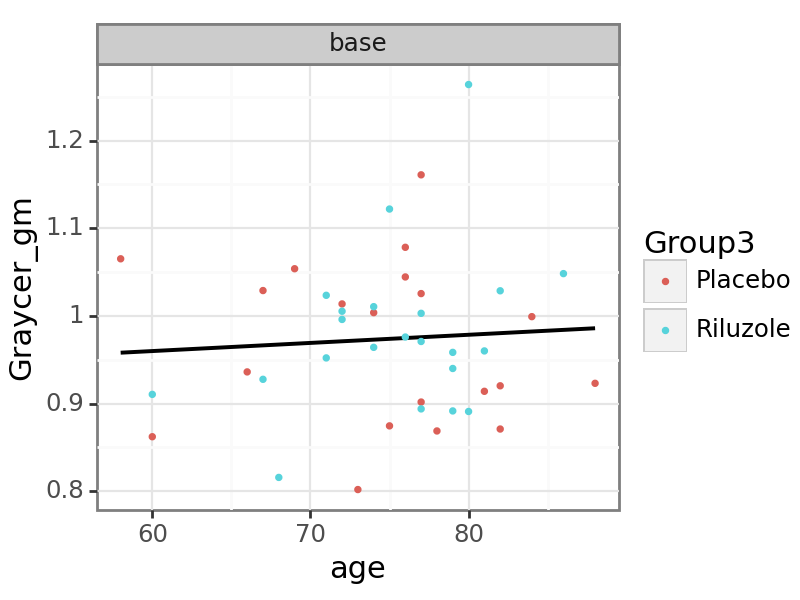

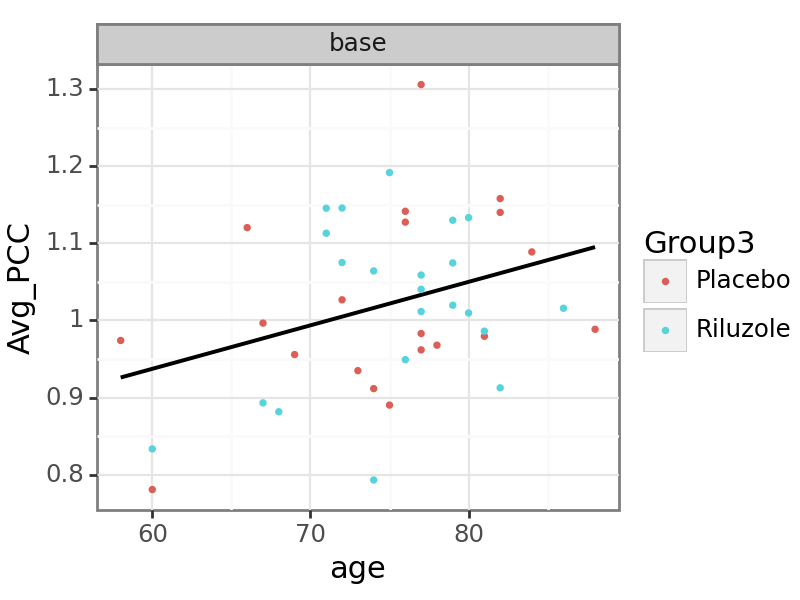

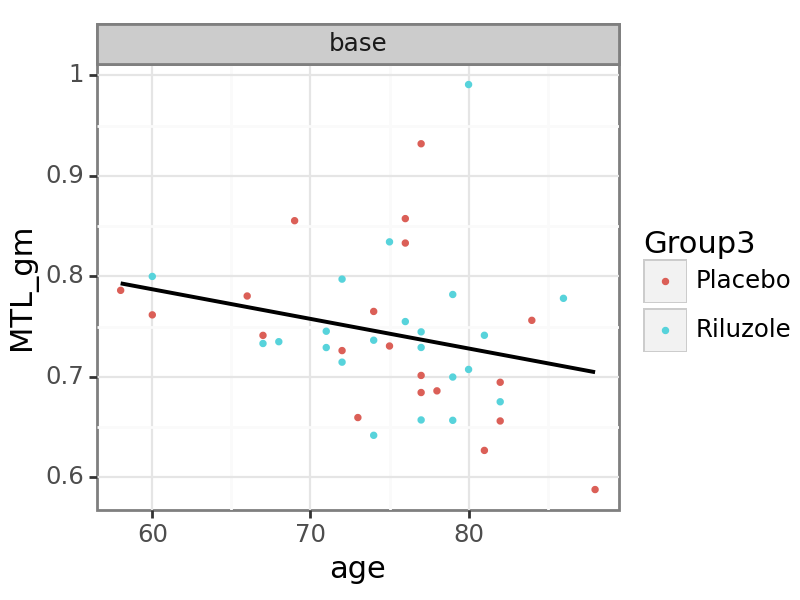

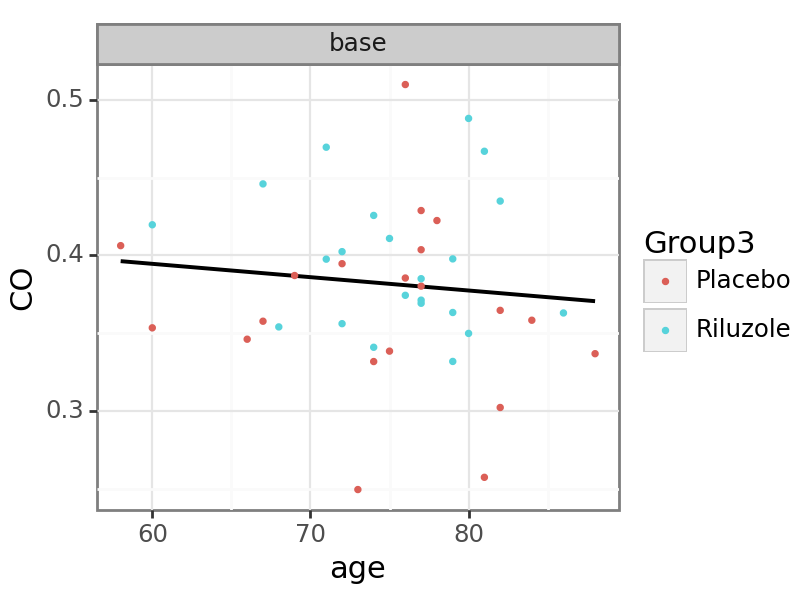

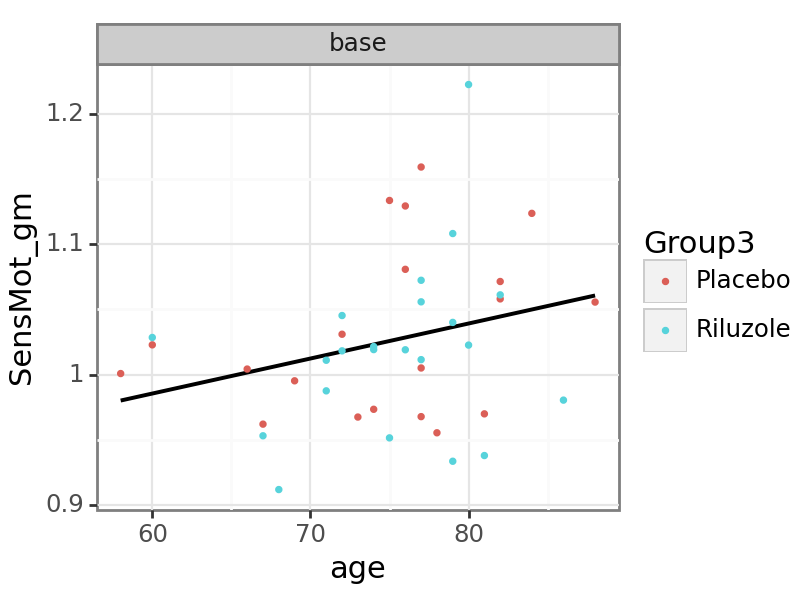

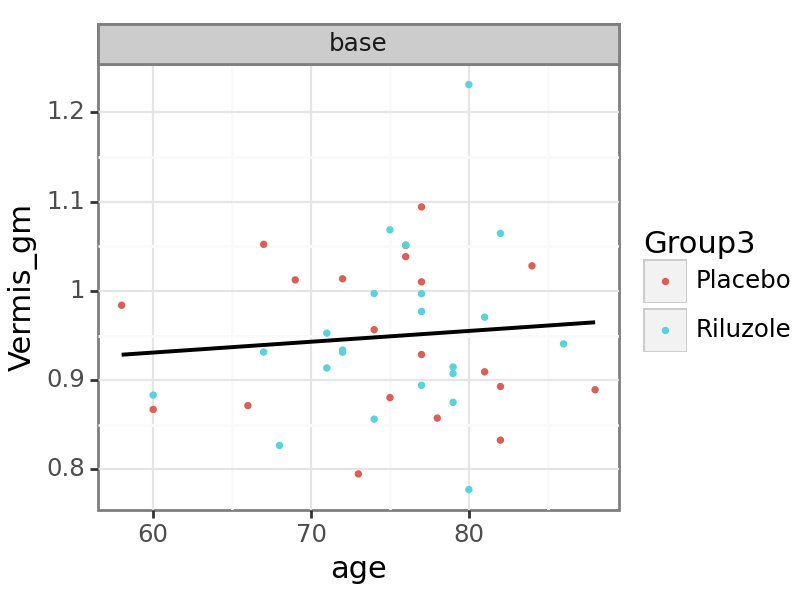

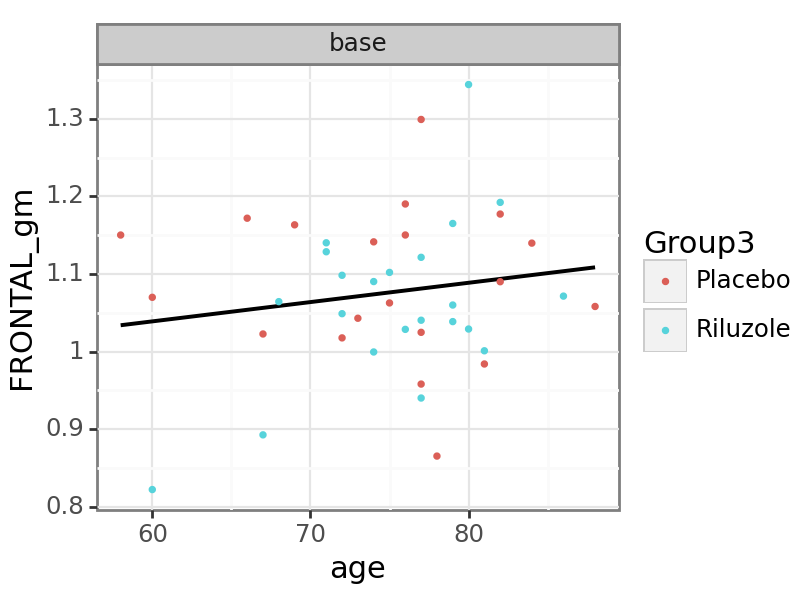

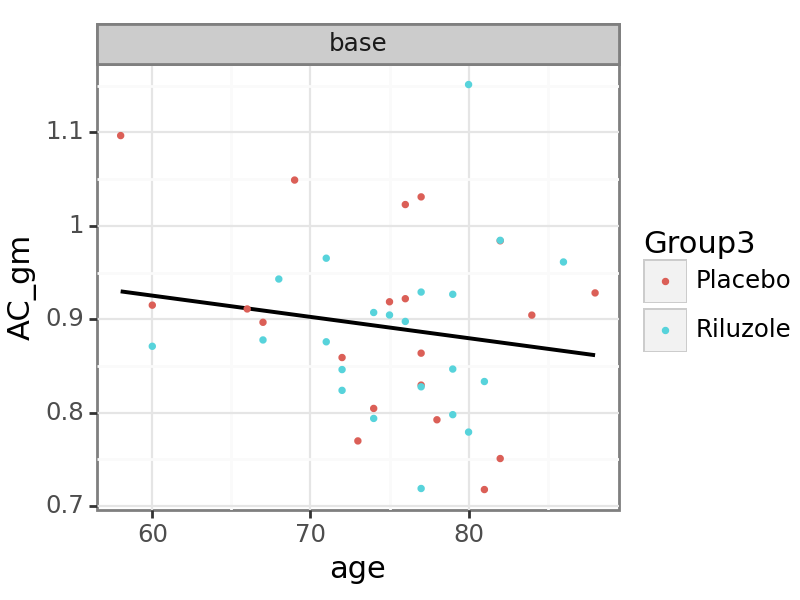

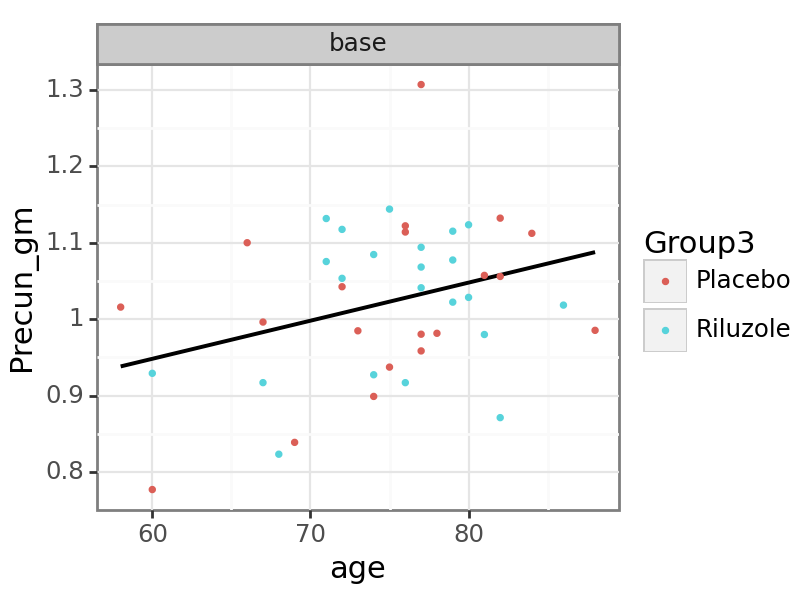

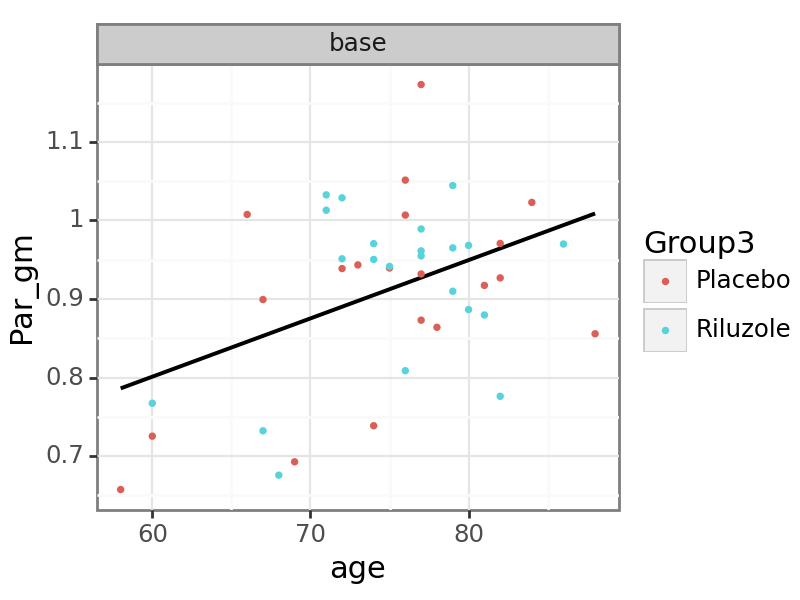

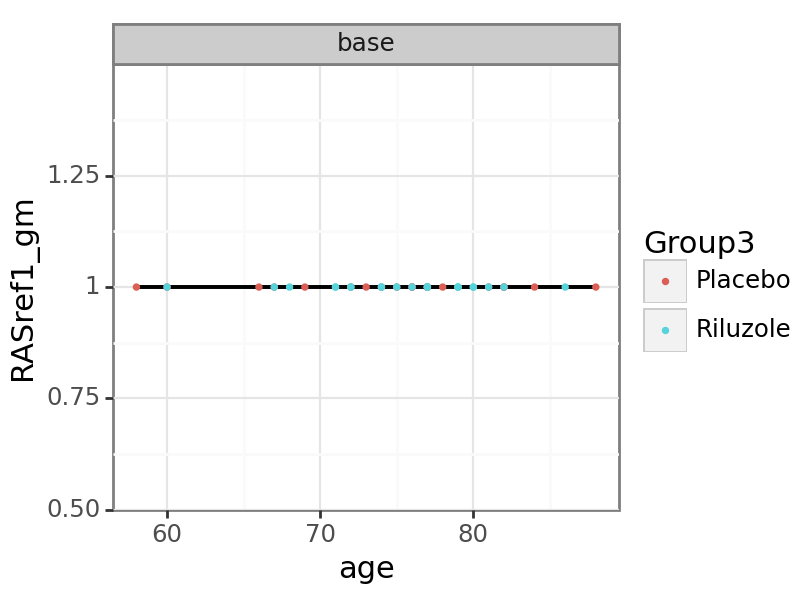

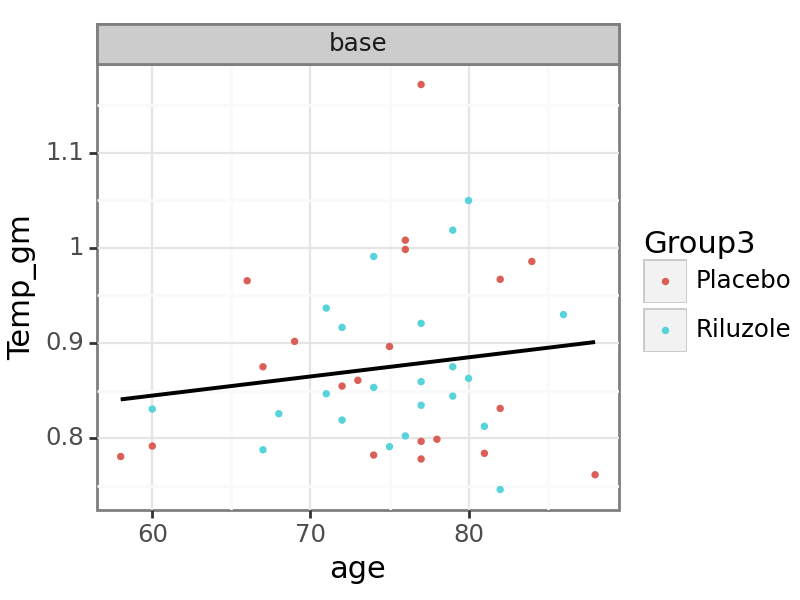

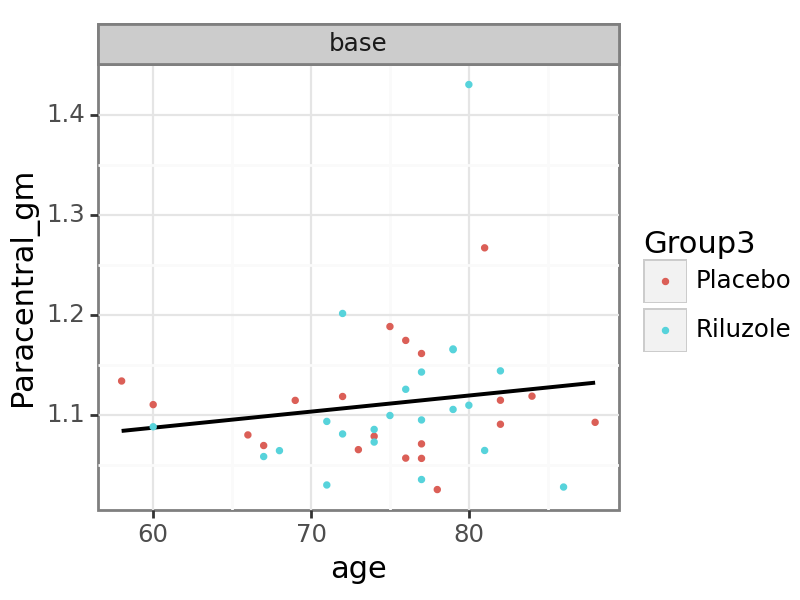

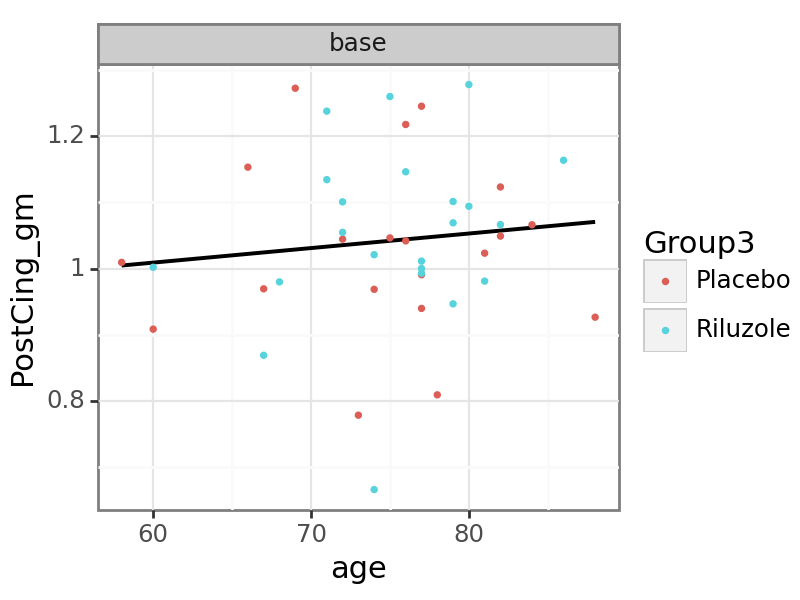

In [12]:
p9.options.figure_size = (4,3)
for var in [ele for ele in FDG_columns if ele in new_ras_rr.columns]:
    subset_data = new_ras_rr.dropna(subset = [var,'age', 'Group3'])
    subset_pons_rr = subset_data.copy()
    subset_pons_rr = subset_pons_rr.groupby('source', observed=True).filter(lambda x: x['ID_ADM'].nunique()> 6)

    plot = (
            p9.ggplot(subset_data, p9.aes(x = 'age', y = var, color = 'Group3'))
            + p9.theme_bw(base_size = 11)
            + p9.geom_smooth(subset_pons_rr, size = 0.8, se = False, color = 'black', method = 'lm')
            + p9.geom_point(size = 0.5)
            + p9.facet_grid('~timepoint')
    )
    print(plot)

# Selection of covariates

## univariate

In [13]:
other_relationship_results = pd.DataFrame(columns = ['fdg_source', 'var1', 'var2', 'lin_p_baseline'])

#### composite_rr ####
combinations = pd.DataFrame(list(itertools.product([ele for ele in FDG_columns if ele in composite_rr.columns], ['age', 'apoe4_carrier', 'sex', 'race', 'Education_years'])))
for idx in range(combinations[0].size):
    var0 = combinations[0][idx]
    var1 = combinations[1][idx]
    temp_df_baseline =  composite_rr[composite_rr['timepoint'].isin(['base'])].dropna(subset = [var0, var1])

    # z-score data
    temp_df_baseline[[var0]] = preprocessing.StandardScaler().fit_transform(temp_df_baseline[[var0]])

    # univariate linear model just within the baseline datapoints of the trial data
    model = smf.ols(formula = var0 + ' ~ ' + var1, data = temp_df_baseline).fit()
    lin_p_baseline = model.pvalues[1:].min()

    
    # save results
    other_relationship_results.loc[len(other_relationship_results)] =  ['composite_rr', var0, var1, lin_p_baseline] 

#### pons_rr ####
combinations = pd.DataFrame(list(itertools.product([ele for ele in FDG_columns if ele in pons_rr.columns], ['age', 'apoe4_carrier', 'sex', 'race', 'Education_years'])))
for idx in range(combinations[0].size):
    var0 = combinations[0][idx]
    var1 = combinations[1][idx]
    temp_df_baseline =  pons_rr[pons_rr['timepoint'].isin(['base'])].dropna(subset = [var0, var1])

    # z-score data
    temp_df_baseline[[var0]] = preprocessing.StandardScaler().fit_transform(temp_df_baseline[[var0]])

    # univariate linear model just within the baseline datapoints of the trial data
    model = smf.ols(formula = var0 + ' ~ ' + var1, data = temp_df_baseline).fit()
    lin_p_baseline = model.pvalues[1:].min()

    
    # save results
    other_relationship_results.loc[len(other_relationship_results)] =  ['pons_rr', var0, var1, lin_p_baseline] 

#### pons_rr ####
combinations = pd.DataFrame(list(itertools.product([ele for ele in FDG_columns if ele in para_rr.columns], ['age', 'apoe4_carrier', 'sex', 'race', 'Education_years'])))
for idx in range(combinations[0].size):
    var0 = combinations[0][idx]
    var1 = combinations[1][idx]
    temp_df_baseline =  para_rr[para_rr['timepoint'].isin(['base'])].dropna(subset = [var0, var1])

    # z-score data
    temp_df_baseline[[var0]] = preprocessing.StandardScaler().fit_transform(temp_df_baseline[[var0]])

    # univariate linear model just within the baseline datapoints of the trial data
    model = smf.ols(formula = var0 + ' ~ ' + var1, data = temp_df_baseline).fit()
    lin_p_baseline = model.pvalues[1:].min()

    
    # save results
    other_relationship_results.loc[len(other_relationship_results)] =  ['para_rr', var0, var1, lin_p_baseline] 

#### new_para_rr ####
combinations = pd.DataFrame(list(itertools.product([ele for ele in FDG_columns if ele in new_para_rr.columns], ['age', 'apoe4_carrier', 'sex', 'race', 'Education_years'])))
for idx in range(combinations[0].size):
    var0 = combinations[0][idx]
    var1 = combinations[1][idx]
    temp_df_baseline =  new_para_rr[new_para_rr['timepoint'].isin(['base'])].dropna(subset = [var0, var1])

    # z-score data
    temp_df_baseline[[var0]] = preprocessing.StandardScaler().fit_transform(temp_df_baseline[[var0]])

    # univariate linear model just within the baseline datapoints of the trial data
    model = smf.ols(formula = var0 + ' ~ ' + var1, data = temp_df_baseline).fit()
    lin_p_baseline = model.pvalues[1:].min()

    
    # save results
    other_relationship_results.loc[len(other_relationship_results)] =  ['new_para_rr', var0, var1, lin_p_baseline] 

#### new_ras_rr ####
combinations = pd.DataFrame(list(itertools.product([ele for ele in FDG_columns if ele in new_ras_rr.columns], ['age', 'apoe4_carrier', 'sex', 'race', 'Education_years'])))
for idx in range(combinations[0].size):
    var0 = combinations[0][idx]
    var1 = combinations[1][idx]
    temp_df_baseline =  new_ras_rr[new_ras_rr['timepoint'].isin(['base'])].dropna(subset = [var0, var1])

    # z-score data
    temp_df_baseline[[var0]] = preprocessing.StandardScaler().fit_transform(temp_df_baseline[[var0]])

    # univariate linear model just within the baseline datapoints of the trial data
    model = smf.ols(formula = var0 + ' ~ ' + var1, data = temp_df_baseline).fit()
    lin_p_baseline = model.pvalues[1:].min()

    
    # save results
    other_relationship_results.loc[len(other_relationship_results)] =  ['new_ras_rr', var0, var1, lin_p_baseline] 

In [14]:
print(other_relationship_results['var2'].value_counts())


age                50
apoe4_carrier      50
sex                50
race               50
Education_years    50
Name: var2, dtype: int64


In [15]:
other_relationship_results.groupby('var2')['lin_p_baseline'].describe()

count      mean       std       min       25%       50%  \
var2                                                                       
Education_years   48.0  0.407885  0.340615  0.003322  0.082890  0.318075   
age               48.0  0.269913  0.253591  0.001702  0.060254  0.161272   
apoe4_carrier     48.0  0.528671  0.227823  0.013552  0.353323  0.518974   
race              48.0  0.349048  0.199987  0.034554  0.210432  0.342443   
sex               48.0  0.397488  0.312536  0.000743  0.104359  0.328104   

                      75%       max  
var2                                 
Education_years  0.705437  0.980353  
age              0.423341  0.967786  
apoe4_carrier    0.681052  0.984583  
race             0.492155  0.923716  
sex              0.692701  0.972316

In [16]:
other_relationship_results.loc[(other_relationship_results[['lin_p_baseline']].min(axis = 1) < 0.05), :].sort_values(['var2', 'var1']).round(2)

fdg_source            var1             var2  lin_p_baseline
39   composite_rr           AC_gm  Education_years            0.02
14   composite_rr         Avg_Hip  Education_years            0.01
19   composite_rr          MTL_gm  Education_years            0.01
134   new_para_rr          MTL_gm  Education_years            0.01
244    new_ras_rr  Paracentral_gm  Education_years            0.05
64   composite_rr     PostCing_gm  Education_years            0.04
59   composite_rr           R_Hip  Education_years            0.00
24   composite_rr            Temp  Education_years            0.04
10   composite_rr         Avg_Hip              age            0.03
185    new_ras_rr         Avg_PCC              age            0.03
25   composite_rr           L_Hip              age            0.04
15   composite_rr          MTL_gm              age            0.02
45   composite_rr          Par_gm              age            0.02
80        pons_rr          Par_gm              age            0.03
115       para_rr          Par_gm              age            0.01
155   new_para_rr          Par_gm              age            0.02
225    new_ras_rr          Par_gm              age            0.00
220    new_ras_rr       Precun_gm              age            0.01
71        pons_rr           AC_gm    apoe4_carrier            0.01
38   composite_rr           AC_gm             race            0.03
148   new_para_rr           AC_gm             race            0.03
198    new_ras_rr              CO             race            0.04
72        pons_rr           AC_gm              sex            0.00
197    new_ras_rr              CO              sex            0.03
17   composite_rr          MTL_gm              sex            0.04
102       para_rr          MTL_gm              sex            0.03
132   new_para_rr          MTL_gm              sex            0.01
92        pons_rr     PostCing_gm              sex            0.01
87        pons_rr         Temp_gm              sex            0.02

In [17]:
other_relationship_results.loc[(other_relationship_results[['lin_p_baseline']].min(axis = 1) < 0.05), 'var2'].value_counts()

age                10
Education_years     8
sex                 7
race                3
apoe4_carrier       1
Name: var2, dtype: int64

In [18]:
other_relationship_results.groupby(['fdg_source', 'var2'])[['lin_p_baseline']].apply(lambda x: (x<0.05).sum()).reset_index().pivot(index='fdg_source', columns='var2', values='lin_p_baseline')


var2          Education_years  age  apoe4_carrier  race  sex
fdg_source                                                  
composite_rr                6    4              0     1    1
new_para_rr                 1    1              0     1    1
new_ras_rr                  1    3              0     1    1
para_rr                     0    1              0     0    1
pons_rr                     0    1              1     0    3

## combined

In [19]:
other_relationship_results_multi = pd.DataFrame(columns = ['fdg_source', 'var',
    'age_baseline','apoe4_carrier_baseline','sex_baseline', 'Education_years_baseline', 'race_hisp_baseline', 'race_white_baseline'
])

#### composite_rr ####
for var in [ele for ele in FDG_columns if ele in composite_rr.columns]:
    temp_df_baseline =  composite_rr[composite_rr['timepoint'].isin(['base'])].dropna(subset = [var, 'age', 'apoe4_carrier', 'sex', 'race',
     'Education_years'])

    # z-score data
    temp_df_baseline[[var, 'Education_years', 'age']] = preprocessing.StandardScaler().fit_transform(temp_df_baseline[[
        var, 'Education_years', 'age']])

    # multivariate linear model just within the baseline datapoints of the trial data
    model = smf.ols(formula = var + ' ~ age + apoe4_carrier + sex + Education_years + race', data = temp_df_baseline).fit()
    age_baseline = model.pvalues['age']
    apoe4_carrier_baseline = model.pvalues['apoe4_carrier[T.Yes]']
    sex_baseline = model.pvalues['sex[T.M]']
    Education_years_baseline = model.pvalues['Education_years']
    race_hisp_baseline = model.pvalues['race[T.Hispanic/Latino]']
    race_white_baseline = model.pvalues['race[T.White/NH]']

    # save results
    other_relationship_results_multi.loc[len(other_relationship_results_multi)] =  ['composite_rr', var,
    age_baseline,apoe4_carrier_baseline,sex_baseline, Education_years_baseline, race_hisp_baseline, race_white_baseline
   ] 

#### pons_rr ####
for var in [ele for ele in FDG_columns if ele in pons_rr.columns]:
    temp_df_baseline =  pons_rr[pons_rr['timepoint'].isin(['base'])].dropna(subset = [var, 'age', 'apoe4_carrier', 'sex', 'race', 
    'Education_years'])

    # z-score data
    temp_df_baseline[[var, 'Education_years', 'age']] = preprocessing.StandardScaler().fit_transform(temp_df_baseline[[
        var, 'Education_years', 'age']])

    # multivariate linear model just within the baseline datapoints of the trial data
    model = smf.ols(formula = var + ' ~ age + apoe4_carrier + sex + Education_years + race', data = temp_df_baseline).fit()
    age_baseline = model.pvalues['age']
    apoe4_carrier_baseline = model.pvalues['apoe4_carrier[T.Yes]']
    sex_baseline = model.pvalues['sex[T.M]']
    Education_years_baseline = model.pvalues['Education_years']
    race_hisp_baseline = model.pvalues['race[T.Hispanic/Latino]']
    race_white_baseline = model.pvalues['race[T.White/NH]']

    # save results
    other_relationship_results_multi.loc[len(other_relationship_results_multi)] =  ['pons_rr', var,
    age_baseline,apoe4_carrier_baseline,sex_baseline, Education_years_baseline, race_hisp_baseline, race_white_baseline
   ] 

#### para_rr ####
for var in [ele for ele in FDG_columns if ele in para_rr.columns]:
    temp_df_baseline =  para_rr[para_rr['timepoint'].isin(['base'])].dropna(subset = [var, 'age', 'apoe4_carrier', 'sex', 'race', 
    'Education_years'])

    # z-score data
    temp_df_baseline[[var, 'Education_years', 'age']] = preprocessing.StandardScaler().fit_transform(temp_df_baseline[[
        var, 'Education_years', 'age']])

    # multivariate linear model just within the baseline datapoints of the trial data
    model = smf.ols(formula = var + ' ~ age + apoe4_carrier + sex + Education_years + race', data = temp_df_baseline).fit()
    age_baseline = model.pvalues['age']
    apoe4_carrier_baseline = model.pvalues['apoe4_carrier[T.Yes]']
    sex_baseline = model.pvalues['sex[T.M]']
    Education_years_baseline = model.pvalues['Education_years']
    race_hisp_baseline = model.pvalues['race[T.Hispanic/Latino]']
    race_white_baseline = model.pvalues['race[T.White/NH]']

    # save results
    other_relationship_results_multi.loc[len(other_relationship_results_multi)] =  ['para_rr', var,
    age_baseline,apoe4_carrier_baseline,sex_baseline, Education_years_baseline, race_hisp_baseline, race_white_baseline
   ] 

#### new_para_rr ####
for var in [ele for ele in FDG_columns if ele in new_para_rr.columns]:
    temp_df_baseline =  new_para_rr[new_para_rr['timepoint'].isin(['base'])].dropna(subset = [var, 'age', 'apoe4_carrier', 'sex', 'race', 
    'Education_years'])

    # z-score data
    temp_df_baseline[[var, 'Education_years', 'age']] = preprocessing.StandardScaler().fit_transform(temp_df_baseline[[
        var, 'Education_years', 'age']])

    # multivariate linear model just within the baseline datapoints of the trial data
    model = smf.ols(formula = var + ' ~ age + apoe4_carrier + sex + Education_years + race', data = temp_df_baseline).fit()
    age_baseline = model.pvalues['age']
    apoe4_carrier_baseline = model.pvalues['apoe4_carrier[T.Yes]']
    sex_baseline = model.pvalues['sex[T.M]']
    Education_years_baseline = model.pvalues['Education_years']
    race_hisp_baseline = model.pvalues['race[T.Hispanic/Latino]']
    race_white_baseline = model.pvalues['race[T.White/NH]']

    # save results
    other_relationship_results_multi.loc[len(other_relationship_results_multi)] =  ['new_para_rr', var,
    age_baseline,apoe4_carrier_baseline,sex_baseline, Education_years_baseline, race_hisp_baseline, race_white_baseline
   ] 

#### new_ras_rr ####
for var in [ele for ele in FDG_columns if ele in new_ras_rr.columns]:
    temp_df_baseline =  new_ras_rr[new_ras_rr['timepoint'].isin(['base'])].dropna(subset = [var, 'age', 'apoe4_carrier', 'sex', 'race',
     'Education_years'])

    # z-score data
    temp_df_baseline[[var, 'Education_years', 'age']] = preprocessing.StandardScaler().fit_transform(temp_df_baseline[[
        var, 'Education_years', 'age']])

    # multivariate linear model just within the baseline datapoints of the trial data
    model = smf.ols(formula = var + ' ~ age + apoe4_carrier + sex + Education_years + race', data = temp_df_baseline).fit()
    age_baseline = model.pvalues['age']
    apoe4_carrier_baseline = model.pvalues['apoe4_carrier[T.Yes]']
    sex_baseline = model.pvalues['sex[T.M]']
    Education_years_baseline = model.pvalues['Education_years']
    race_hisp_baseline = model.pvalues['race[T.Hispanic/Latino]']
    race_white_baseline = model.pvalues['race[T.White/NH]']

    # save results
    other_relationship_results_multi.loc[len(other_relationship_results_multi)] =  ['new_ras_rr', var,
    age_baseline,apoe4_carrier_baseline,sex_baseline, Education_years_baseline, race_hisp_baseline, race_white_baseline
   ] 

In [20]:
other_relationship_results_multi.loc[(other_relationship_results_multi[['age_baseline','apoe4_carrier_baseline',
'sex_baseline', 'Education_years_baseline','race_hisp_baseline', 'race_white_baseline']].min(axis = 1) < 0.05), :].round(2)

fdg_source          var  age_baseline  apoe4_carrier_baseline  \
1   composite_rr      Avg_PCC          0.01                    0.52   
3   composite_rr       MTL_gm          0.17                    0.43   
4   composite_rr         Temp          0.41                    0.18   
6   composite_rr   FRONTAL_gm          0.16                    0.92   
7   composite_rr        AC_gm          0.67                    0.75   
8   composite_rr    Precun_gm          0.03                    0.22   
9   composite_rr       Par_gm          0.01                    0.48   
11  composite_rr        R_Hip          0.29                    0.95   
12  composite_rr  PostCing_gm          0.25                    0.37   
14       pons_rr        AC_gm          0.28                    0.03   
18       pons_rr  PostCing_gm          0.46                    0.08   
20       para_rr       MTL_gm          0.20                    0.93   
23       para_rr       Par_gm          0.01                    0.71   
26   new_para_rr       MTL_gm          0.17                    0.43   
28   new_para_rr   FRONTAL_gm          0.16                    0.92   
29   new_para_rr        AC_gm          0.66                    0.75   
30   new_para_rr    Precun_gm          0.03                    0.21   
31   new_para_rr       Par_gm          0.01                    0.48   
35   new_para_rr  PostCing_gm          0.24                    0.37   
37    new_ras_rr      Avg_PCC          0.02                    0.64   
44    new_ras_rr    Precun_gm          0.03                    0.29   
45    new_ras_rr       Par_gm          0.00                    0.51   

    sex_baseline  Education_years_baseline  race_hisp_baseline  \
1           0.83                      0.01                0.10   
3           0.05                      0.03                0.36   
4           0.95                      0.04                0.64   
6           0.43                      0.01                0.09   
7           0.66                      0.04                0.06   
8           0.71                      0.03                0.14   
9           0.81                      0.20                0.19   
11          0.12                      0.03                0.48   
12          0.29                      0.01                0.05   
14          0.00                      0.95                0.07   
18          0.01                      0.52                0.16   
20          0.04                      0.88                0.70   
23          0.37                      0.80                0.22   
26          0.05                      0.03                0.36   
28          0.43                      0.01                0.09   
29          0.66                      0.04                0.06   
30          0.71                      0.03                0.14   
31          0.81                      0.20                0.19   
35          0.29                      0.01                0.05   
37          0.51                      0.12                0.30   
44          0.87                      0.33                0.40   
45          0.80                      0.68                0.37   

    race_white_baseline  
1                  0.53  
3                  0.07  
4                  0.25  
6                  0.31  
7                  0.13  
8                  0.46  
9                  0.58  
11                 0.21  
12                 0.81  
14                 0.30  
18                 0.81  
20                 0.44  
23                 0.98  
26                 0.07  
28                 0.31  
29                 0.13  
30                 0.46  
31                 0.58  
35                 0.81  
37                 0.90  
44                 0.96  
45                 0.94

In [21]:
(other_relationship_results_multi[['age_baseline','apoe4_carrier_baseline','sex_baseline', 'Education_years_baseline','race_hisp_baseline', 'race_white_baseline'
]]<0.05).sum().sort_values()

race_white_baseline          0
apoe4_carrier_baseline       1
race_hisp_baseline           2
sex_baseline                 3
age_baseline                 9
Education_years_baseline    13
dtype: int64

In [22]:
other_relationship_results_multi.groupby('fdg_source')[['age_baseline','apoe4_carrier_baseline','sex_baseline', 'Education_years_baseline', 'race_hisp_baseline', 'race_white_baseline'
]].apply(lambda x: (x<0.05).sum()).reset_index()


fdg_source  age_baseline  apoe4_carrier_baseline  sex_baseline  \
0  composite_rr             3                       0             0   
1   new_para_rr             2                       0             0   
2    new_ras_rr             3                       0             0   
3       para_rr             1                       0             1   
4       pons_rr             0                       1             2   

   Education_years_baseline  race_hisp_baseline  race_white_baseline  
0                         8                   1                    0  
1                         5                   1                    0  
2                         0                   0                    0  
3                         0                   0                    0  
4                         0                   0                    0

# Covariate Directionality

In [23]:
var1

'Education_years'

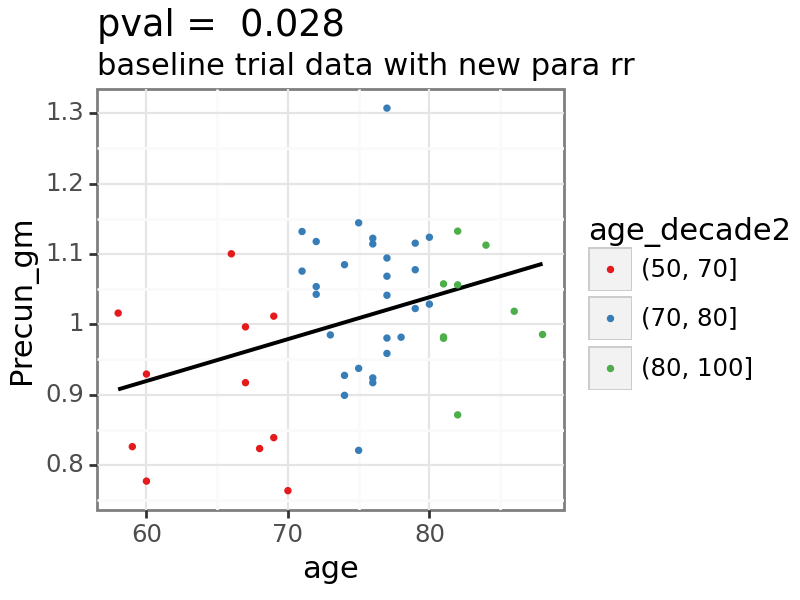

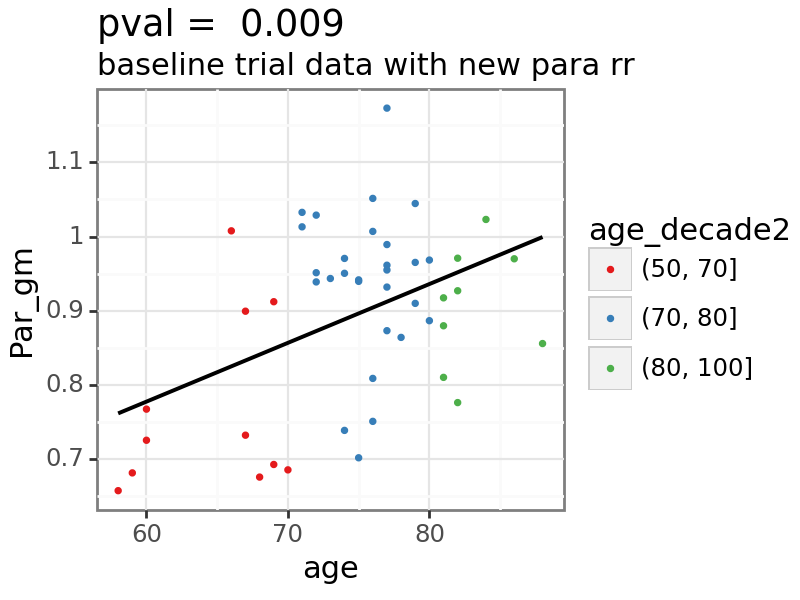

In [24]:
p9.options.figure_size = (4,3)   

var_list = other_relationship_results_multi.loc[other_relationship_results_multi['fdg_source'].isin(['new_para_rr']) & (other_relationship_results_multi['age_baseline']<0.05), 'var'].to_list()
for var1 in var_list:
    p_value = other_relationship_results_multi.loc[
        other_relationship_results_multi['var'].isin([var1]) & other_relationship_results_multi['fdg_source'].isin(['new_para_rr']),
         'age_baseline'].reset_index(drop=True)[0].round(3).astype('str')

    subset_data = new_ras_rr[new_ras_rr['timepoint'].isin(['base'])].dropna(subset = ['age', var1])
    subset_data2 = subset_data.copy()
    subset_data2 = subset_data2.groupby('age_decade2', observed=True).filter(lambda x: x['ID_ADM'].nunique()> 10)
    plot = (
            p9.ggplot(subset_data, p9.aes(x = 'age', y = var1, color = 'age_decade2'))
            + p9.theme_bw(base_size = 11)
            + p9.geom_smooth(subset_data, size = 0.8, se = False, alpha = 1, color = 'black', method = 'lm')
            #+ p9.geom_smooth(subset_data2, size = 0.8, se = False, alpha = 1)
            
            + p9.geom_point(size = 0.5)
            + p9.labs(title = ('pval =  ' + p_value ), subtitle = 'baseline trial data with new para rr')
            + p9.scale_color_brewer(type='qual', palette='Set1')
        )
    print(plot)

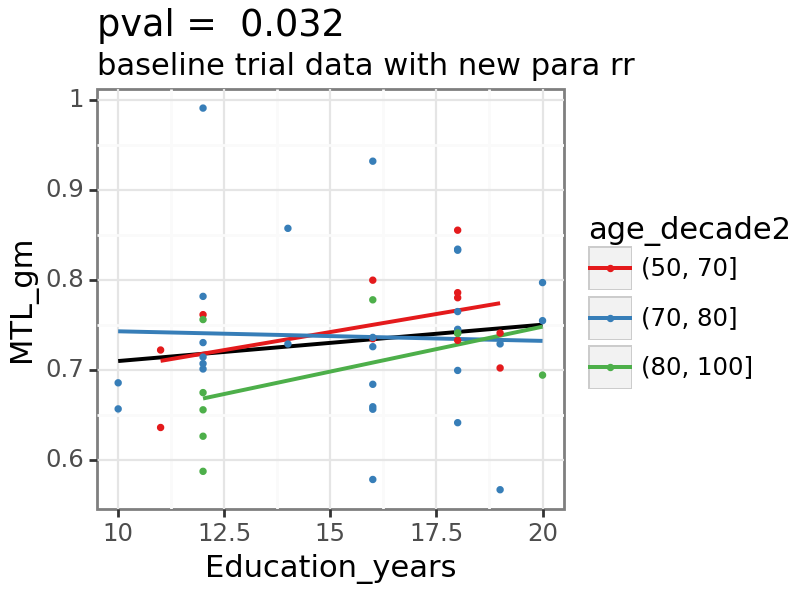

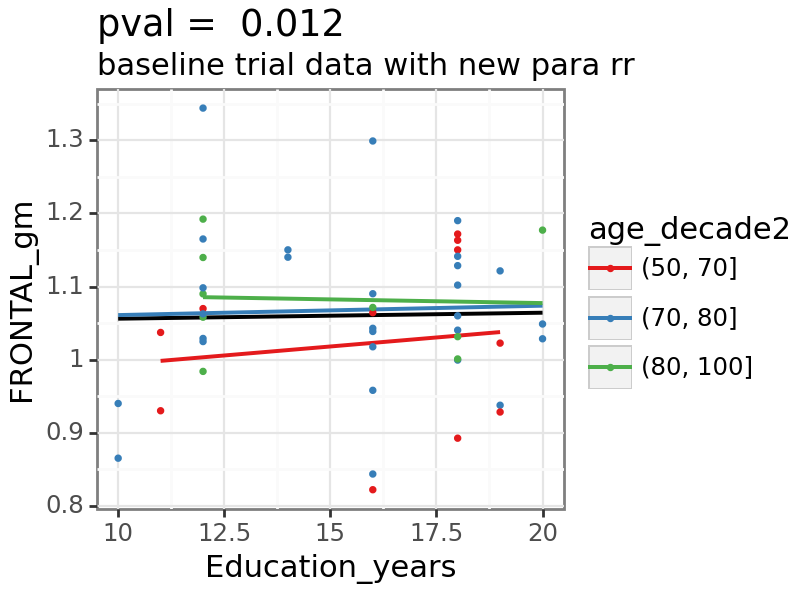

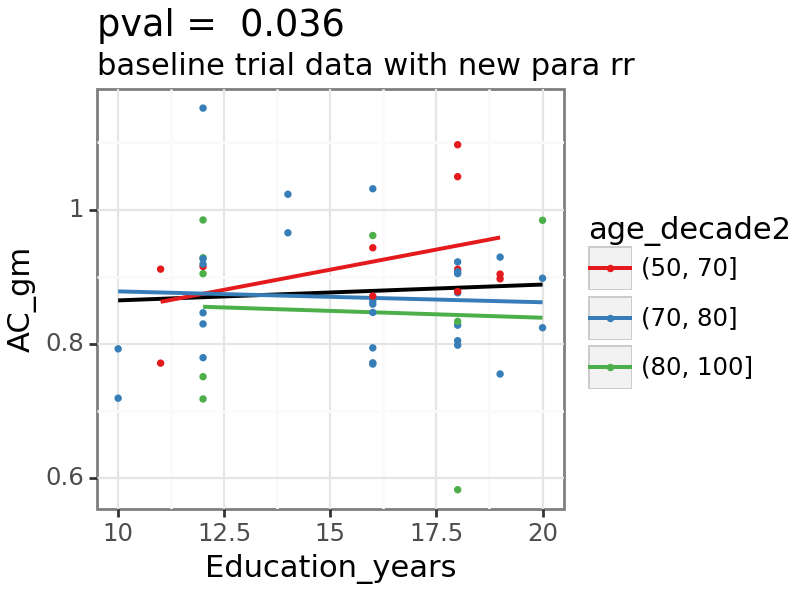

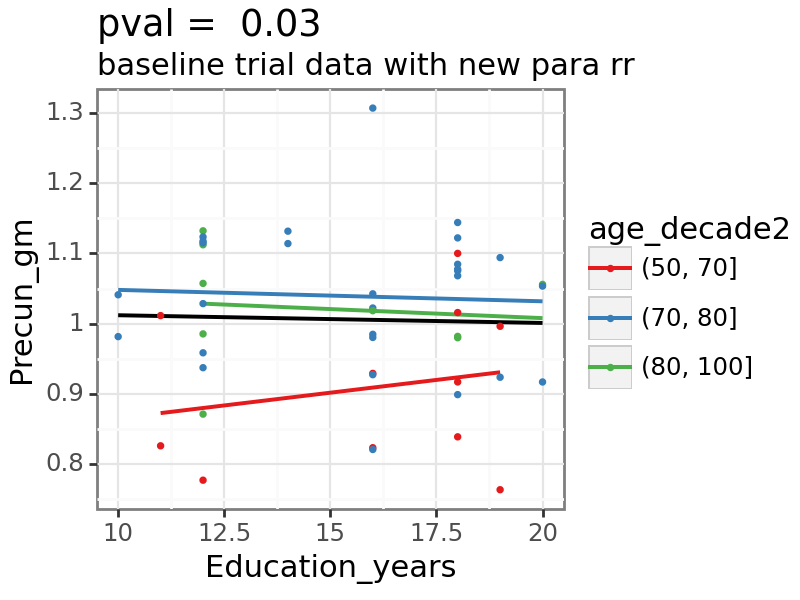

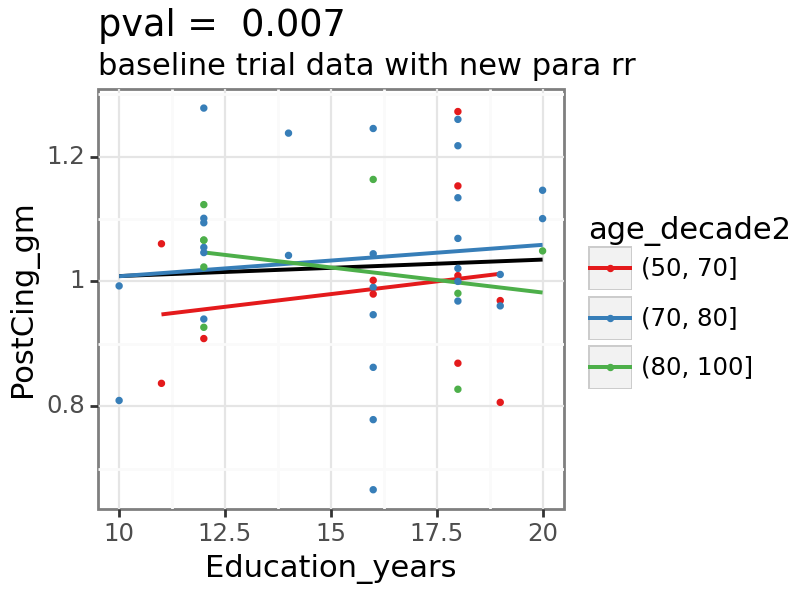

In [25]:
var_list = other_relationship_results_multi.loc[other_relationship_results_multi['fdg_source'].isin(['new_para_rr']) & (other_relationship_results_multi['Education_years_baseline']<0.05), 'var'].to_list()
for var1 in var_list:
    p_value = other_relationship_results_multi.loc[
        other_relationship_results_multi['var'].isin([var1]) & other_relationship_results_multi['fdg_source'].isin(['new_para_rr']),
         'Education_years_baseline'].reset_index(drop=True)[0].round(3).astype('str')

    subset_data = new_ras_rr[new_ras_rr['timepoint'].isin(['base'])].dropna(subset = ['Education_years', var1])
    subset_data2 = subset_data.copy()
    subset_data2 = subset_data2.groupby('age_decade2', observed=True).filter(lambda x: x['ID_ADM'].nunique()> 10)
    plot = (
            p9.ggplot(subset_data, p9.aes(x = 'Education_years', y = var1, color = 'age_decade2'))
            + p9.theme_bw(base_size = 11)
            + p9.geom_smooth(subset_data, size = 0.8, se = False, alpha = 1, color = 'black', method = 'lm')
            #+ p9.geom_smooth(subset_data2, size = 0.8, se = False, alpha = 1)
            
            + p9.geom_point(size = 0.5)
            + p9.labs(title = ('pval =  ' + p_value ), subtitle = 'baseline trial data with new para rr')
            + p9.scale_color_brewer(type='qual', palette='Set1')
        )

    plot = (
            p9.ggplot(subset_data, p9.aes(x = 'Education_years', y = var1, color = 'age_decade2'))
            + p9.theme_bw(base_size = 11)
            + p9.geom_smooth(subset_data, size = 0.8, se = False, alpha = 1, color = 'black', method = 'lm')
            + p9.geom_smooth(subset_data, size = 0.8, se = False, alpha = 1, method = 'lm')
            #+ p9.geom_smooth(subset_data2, size = 0.8, se = False, alpha = 1)
            
            + p9.geom_point(size = 0.5)
            + p9.labs(title = ('pval =  ' + p_value ), subtitle = 'baseline trial data with new para rr')
            + p9.scale_color_brewer(type='qual', palette='Set1')
        )

    print(plot)

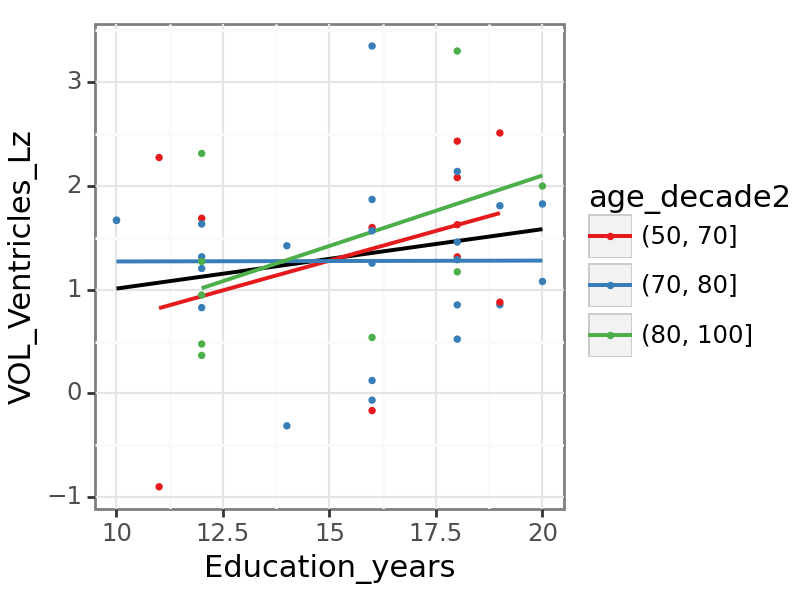

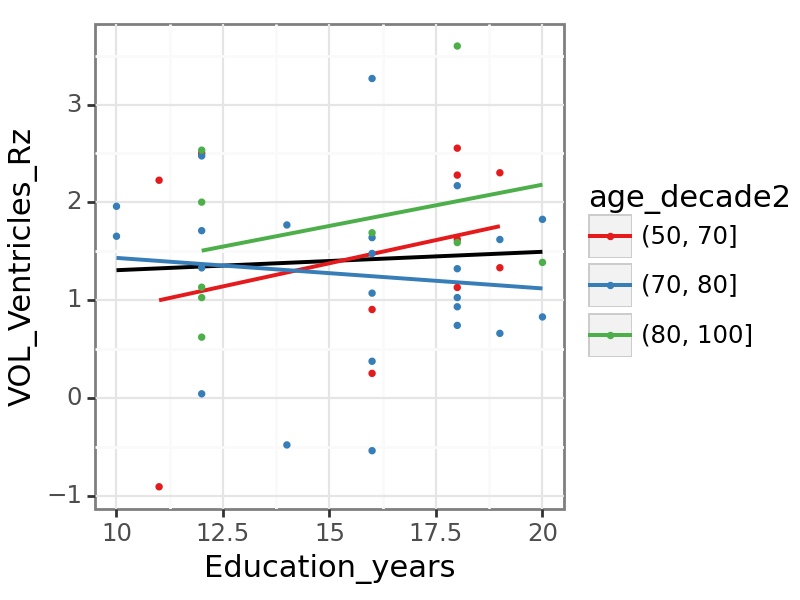

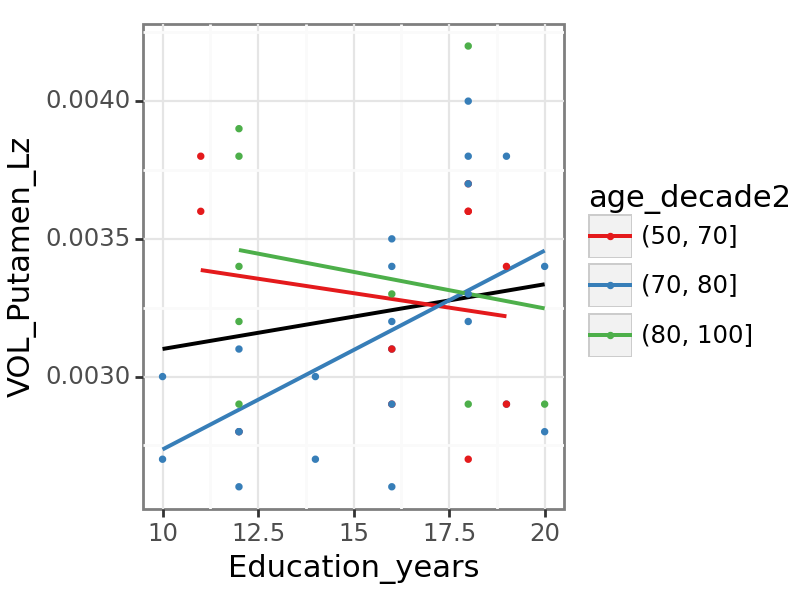

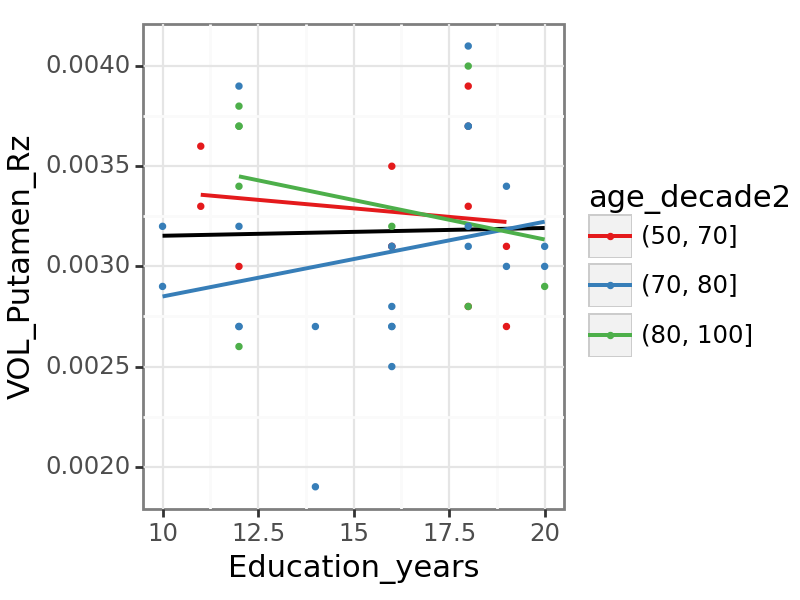

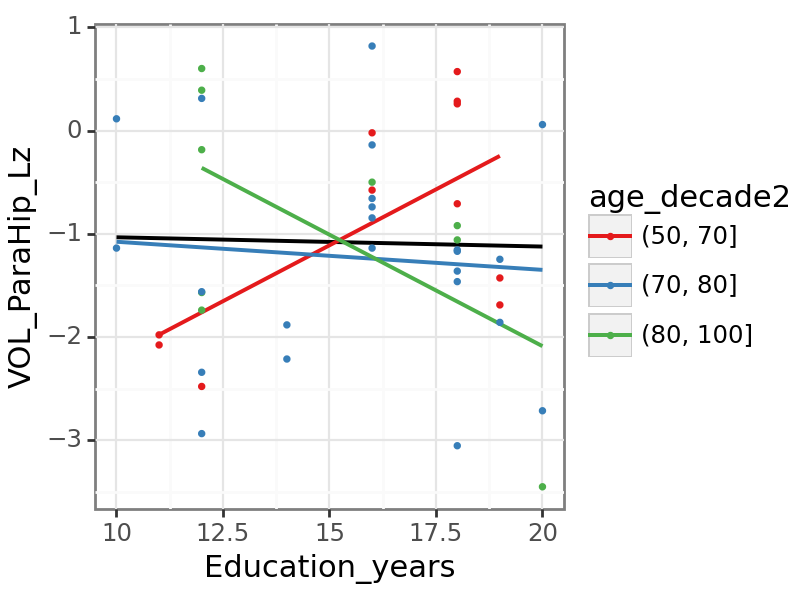

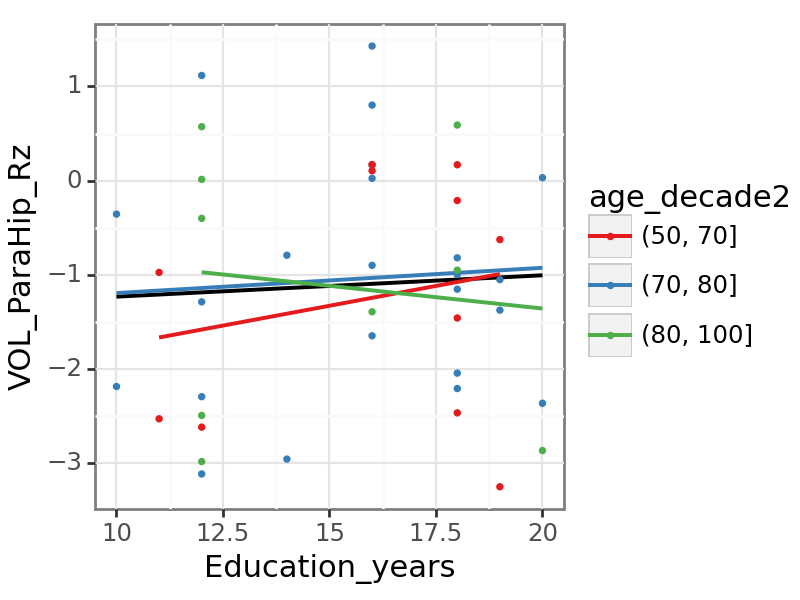

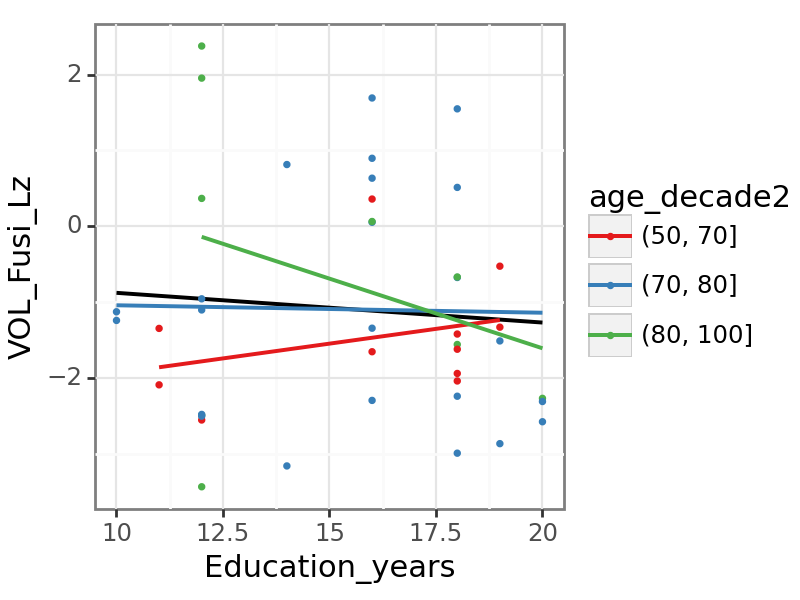

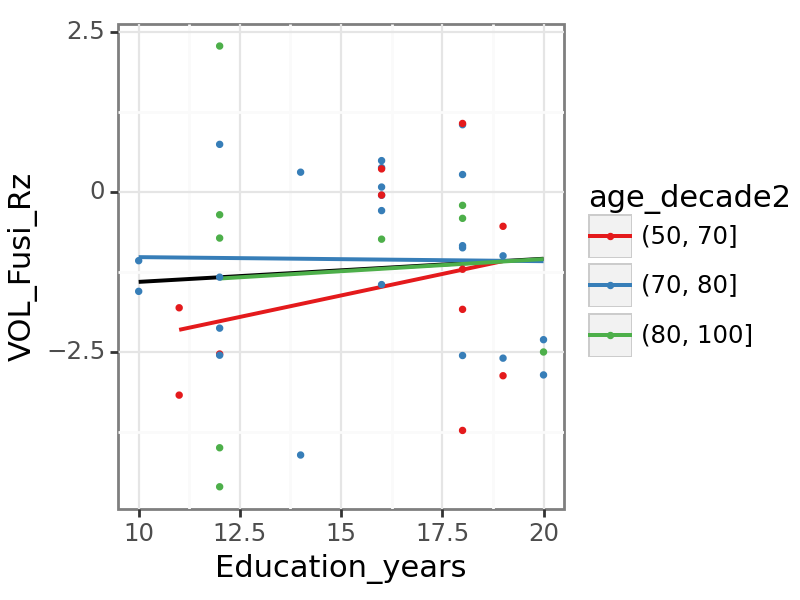

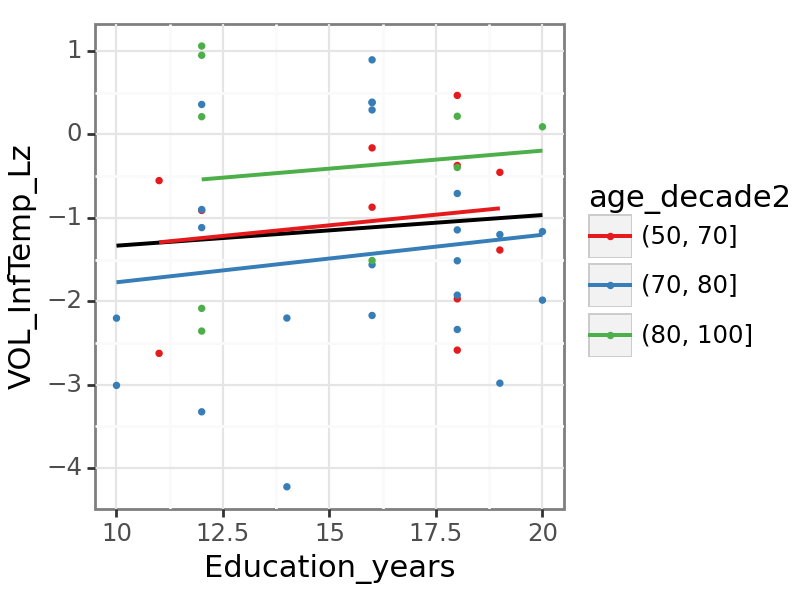

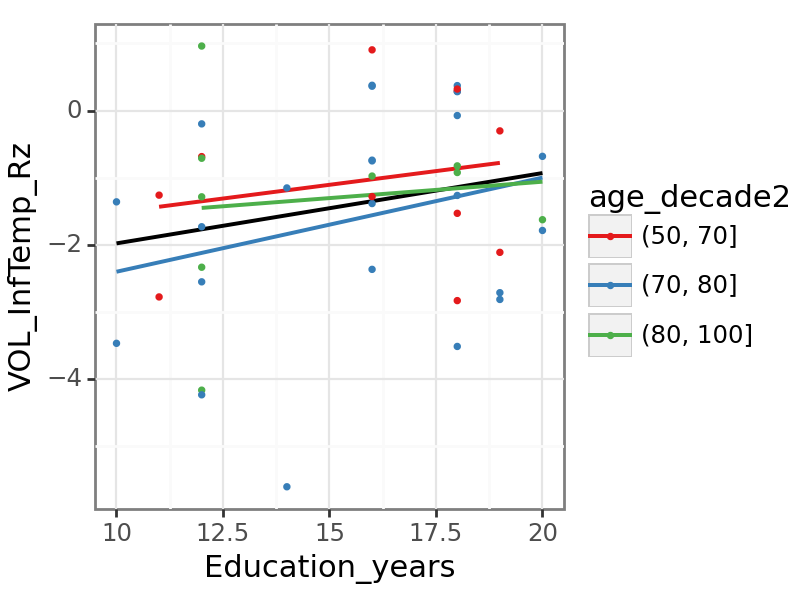

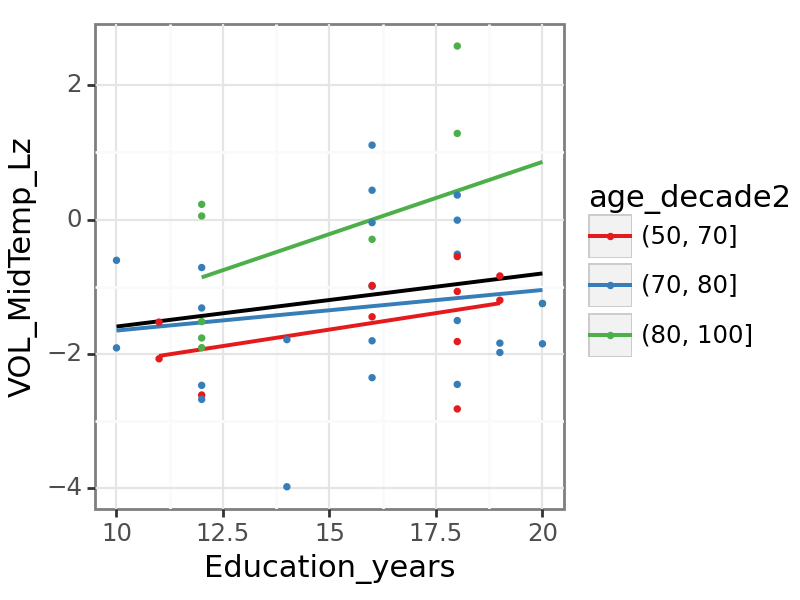

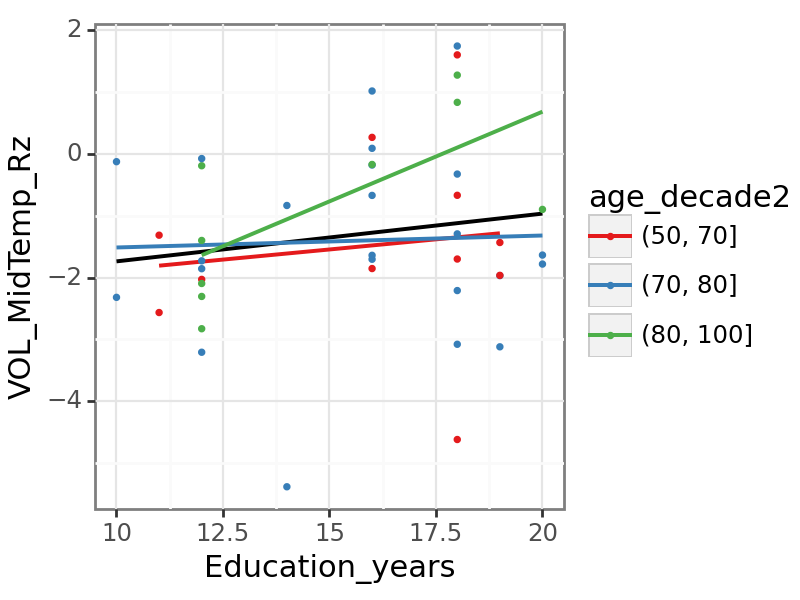

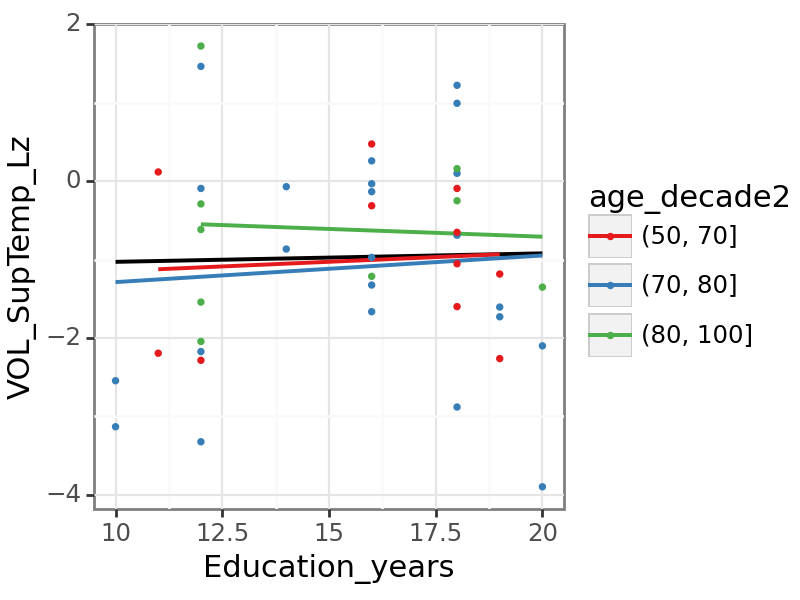

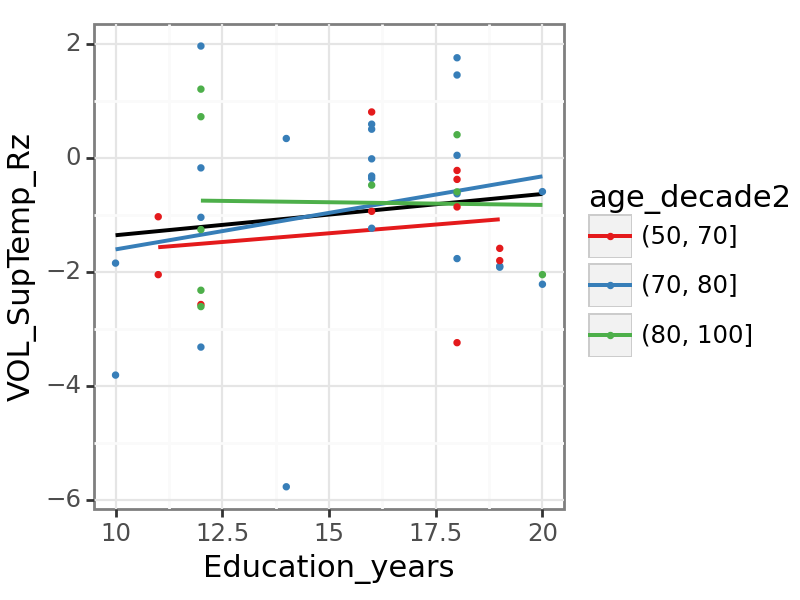

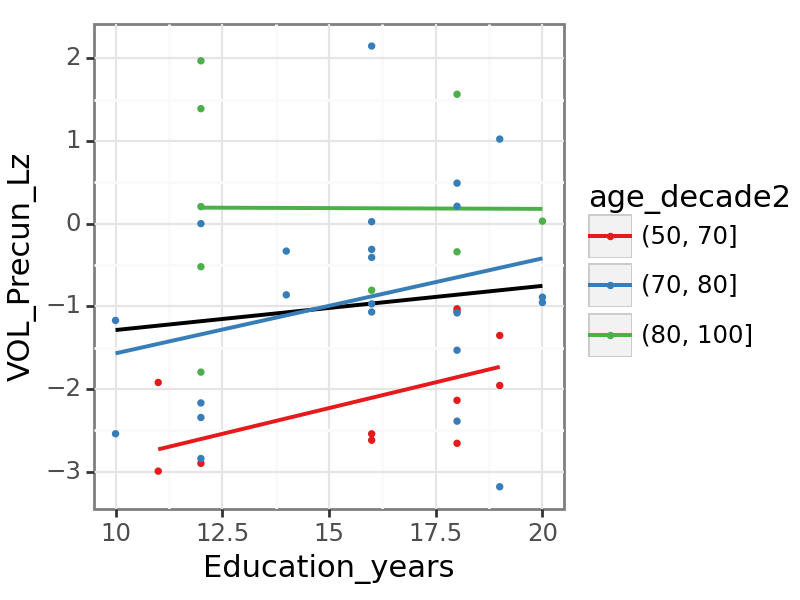

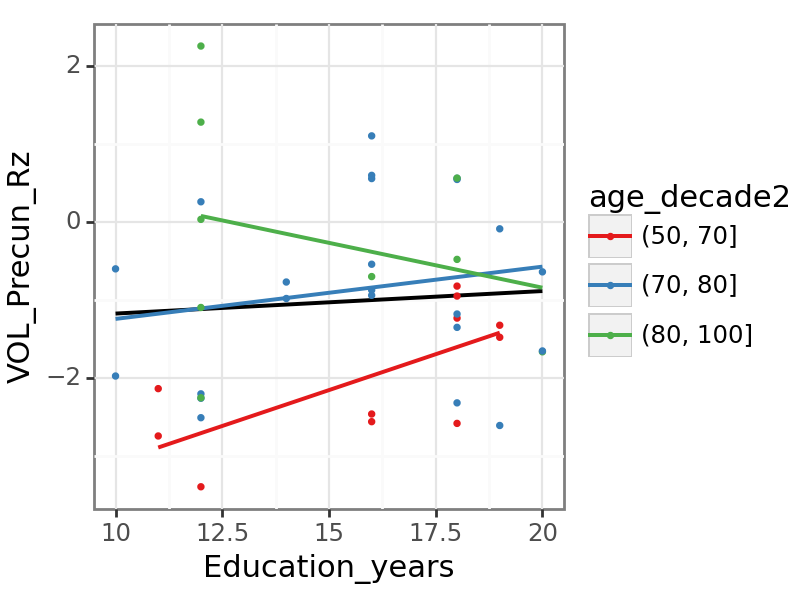

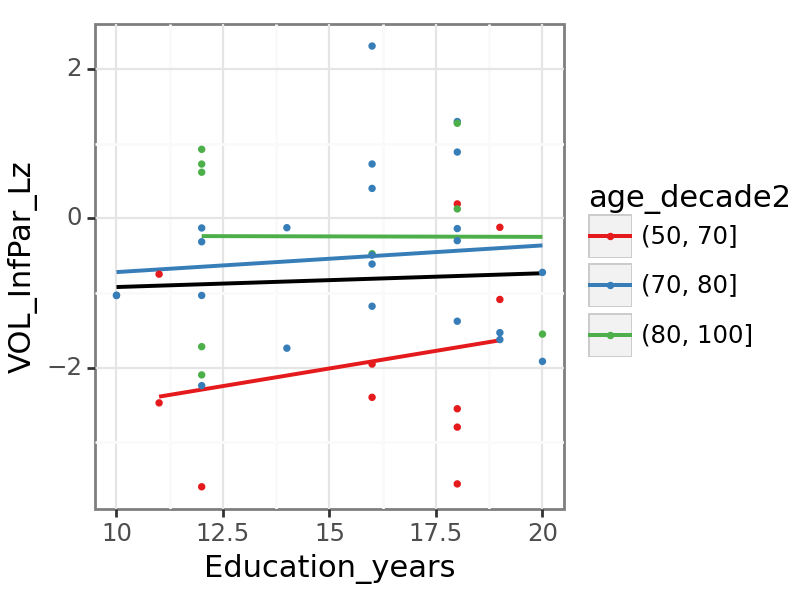

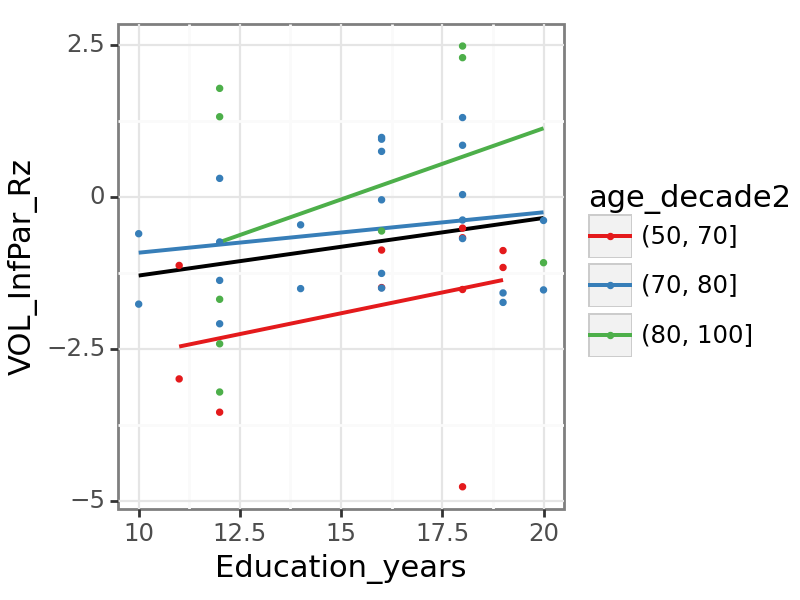

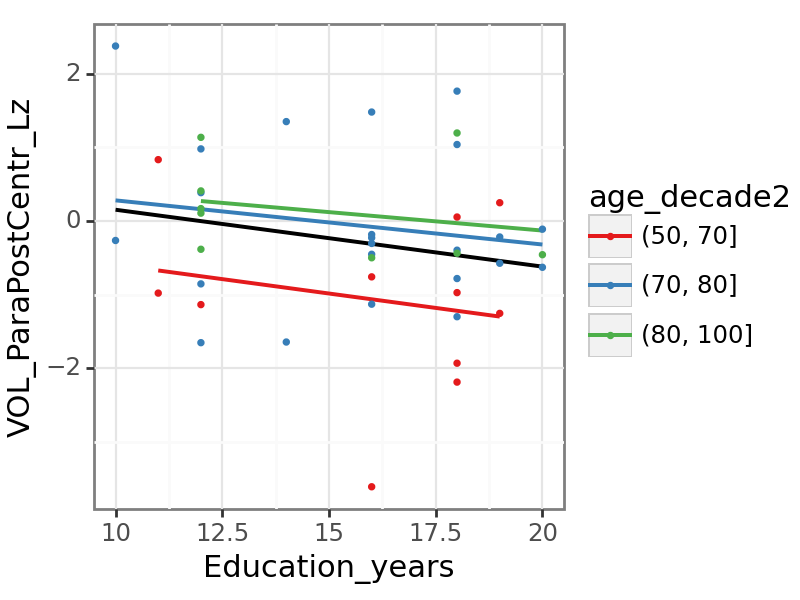

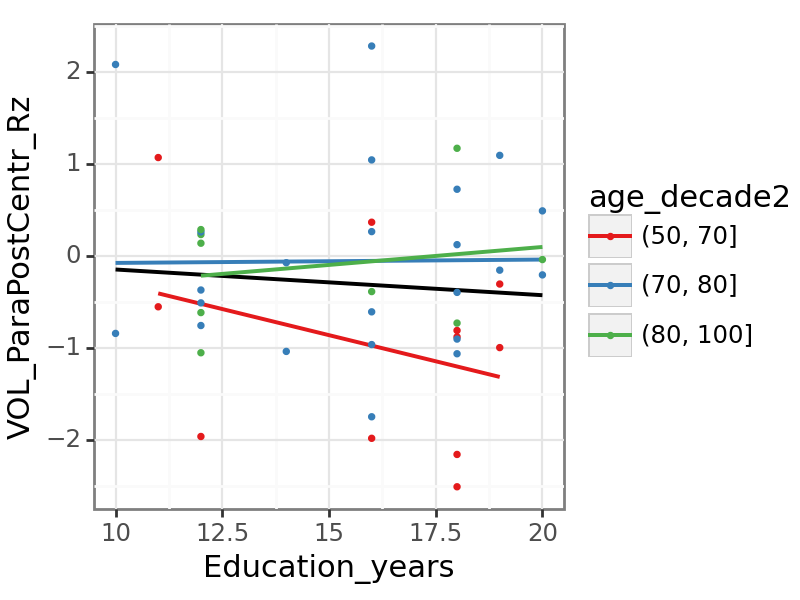

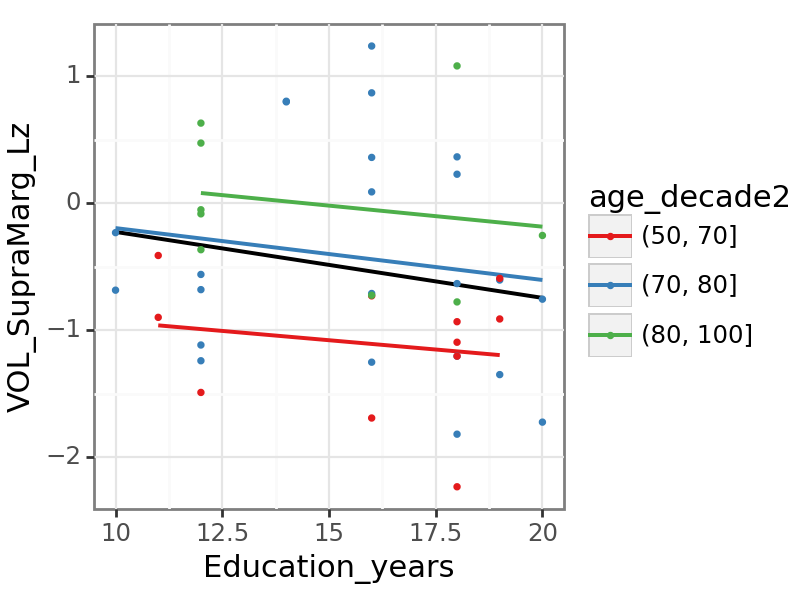

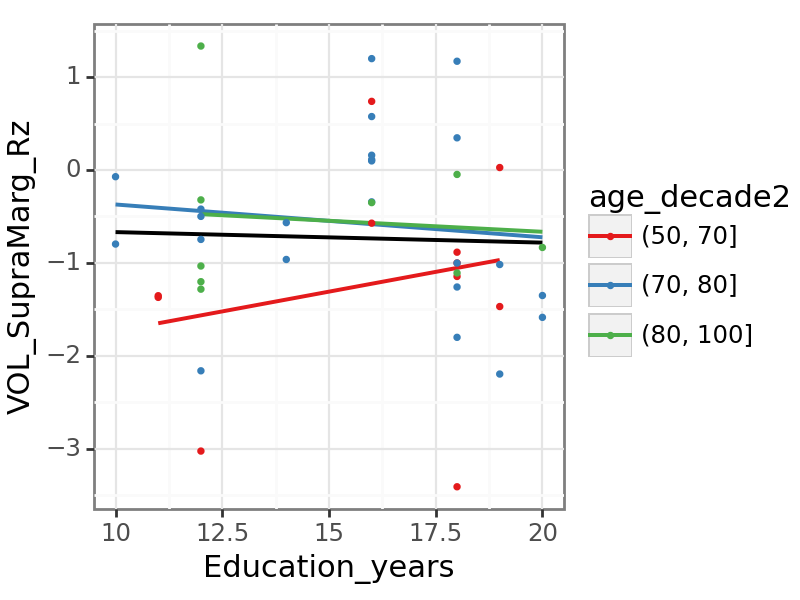

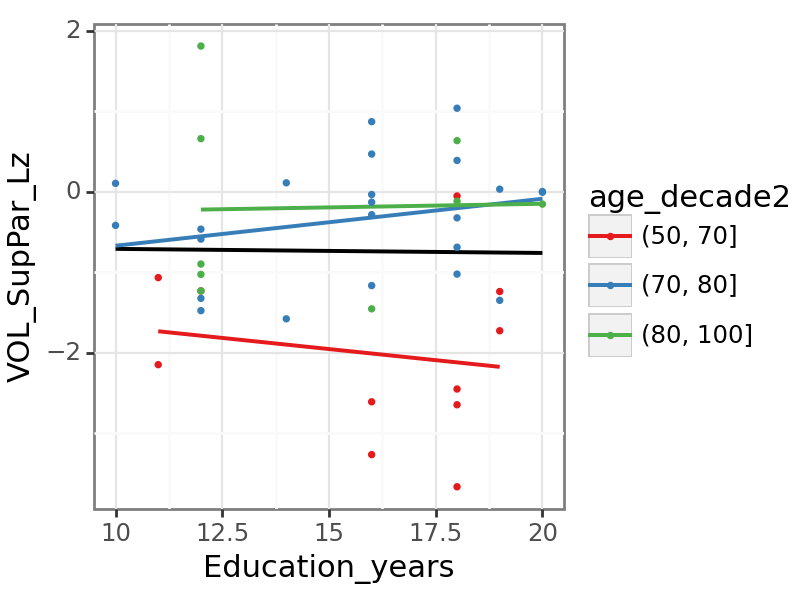

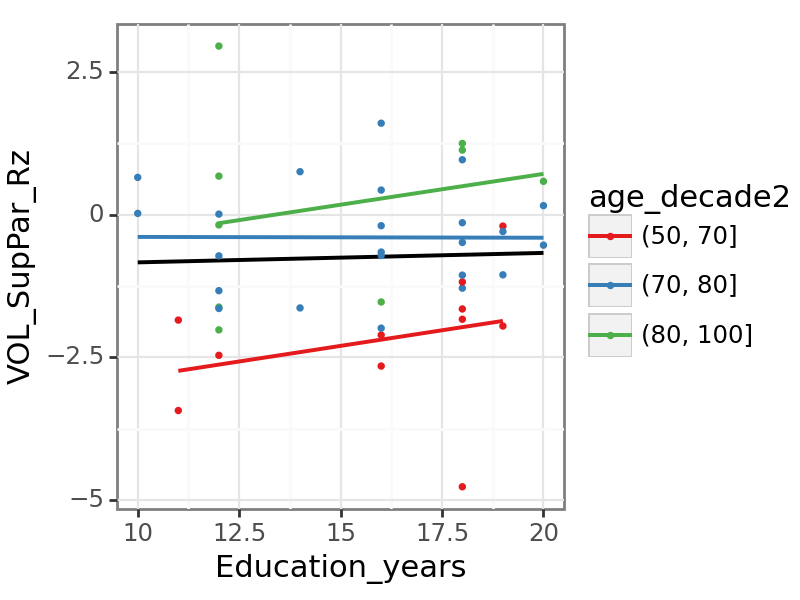

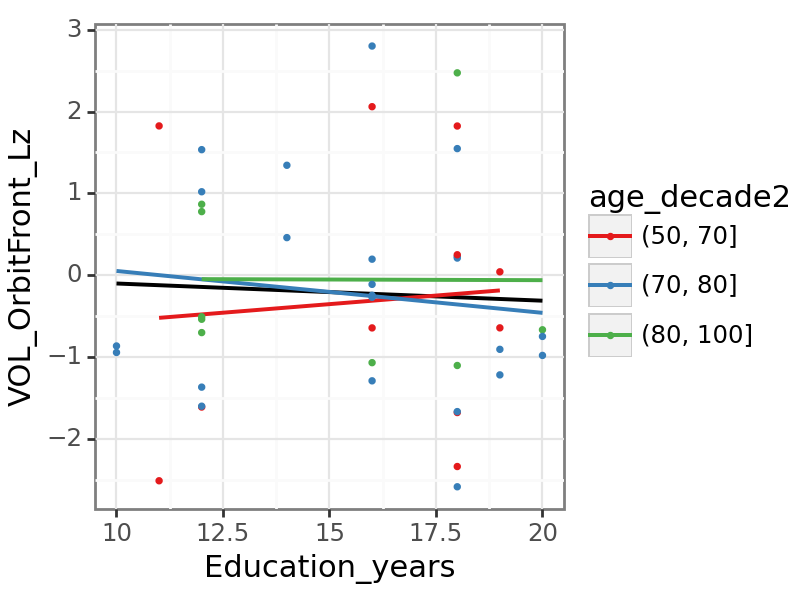

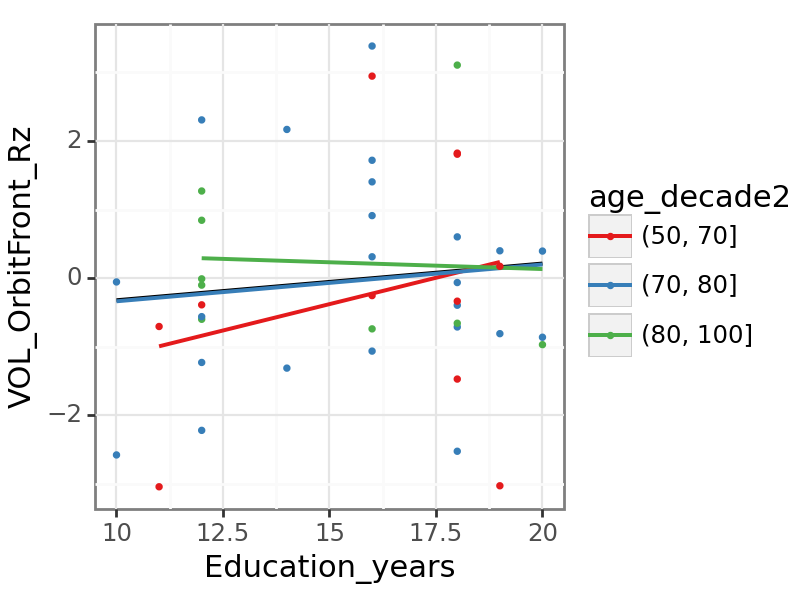

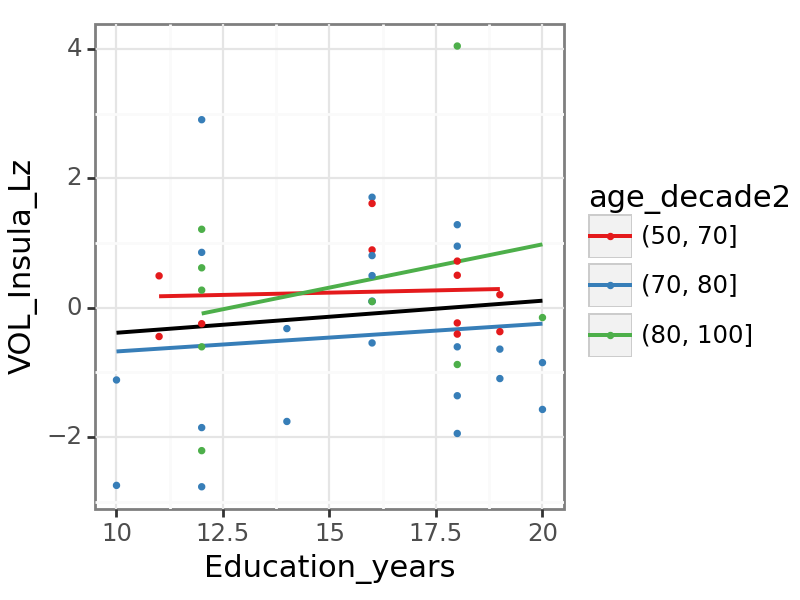

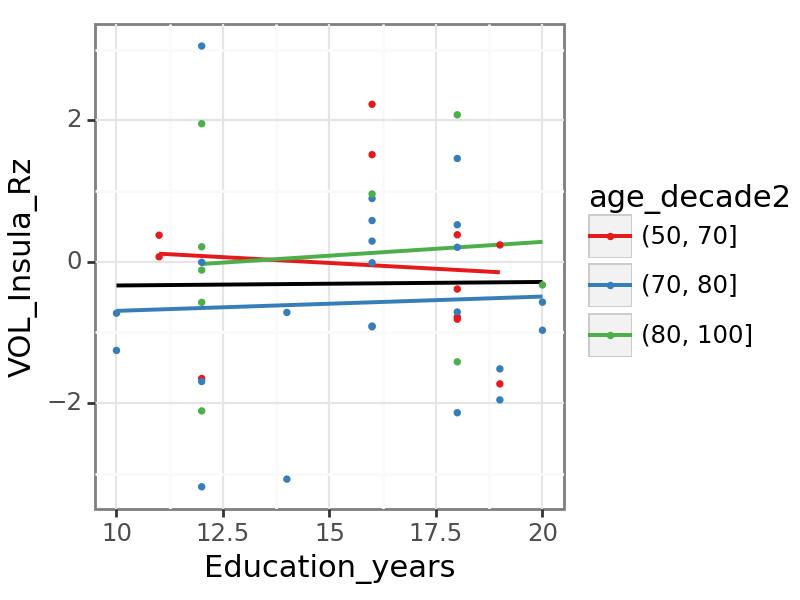

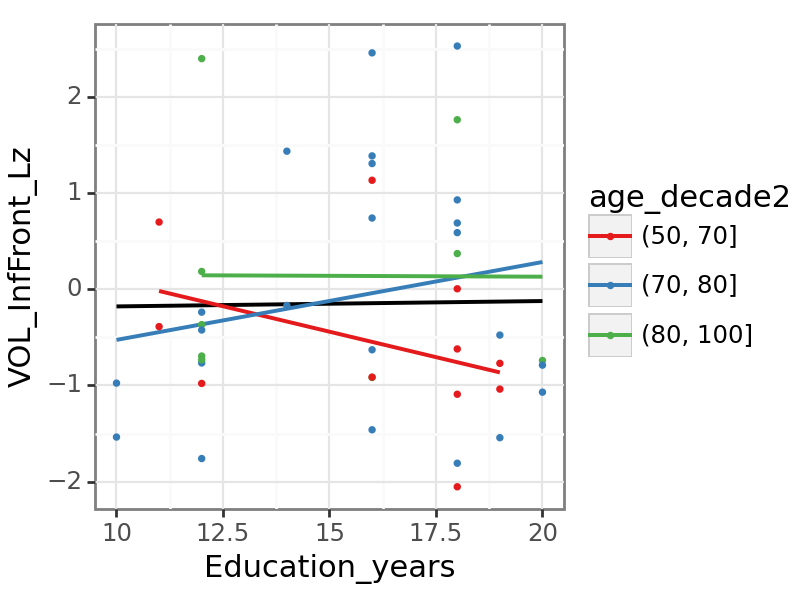

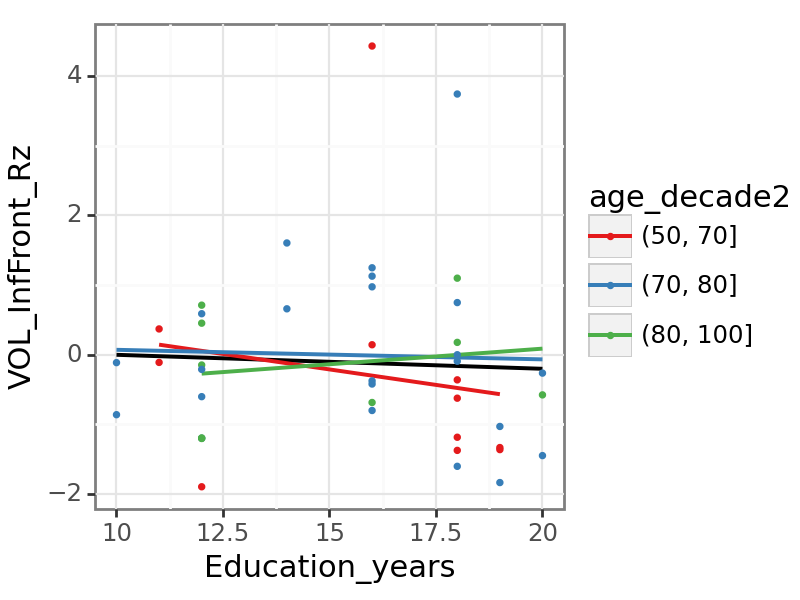

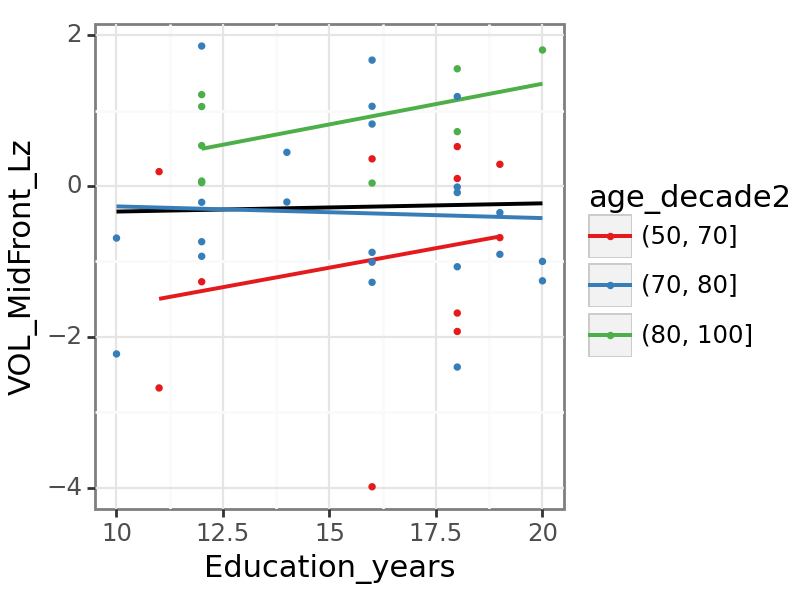

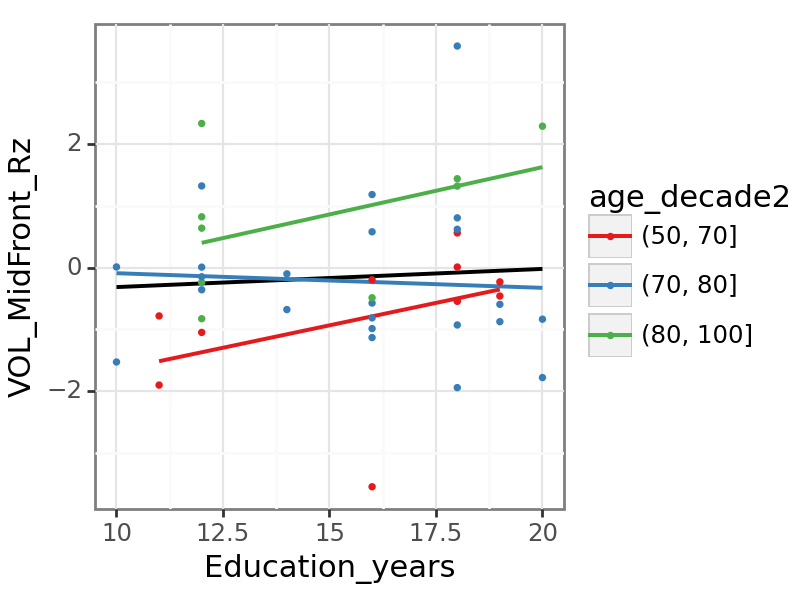

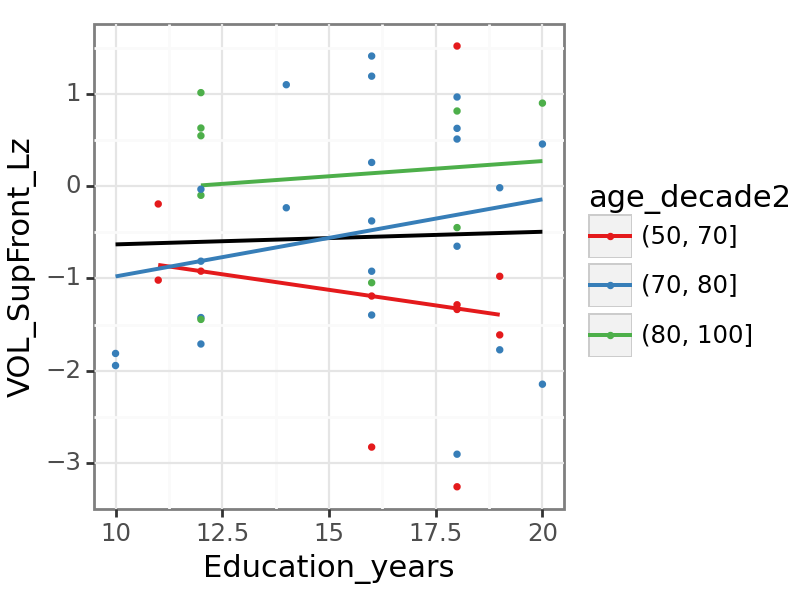

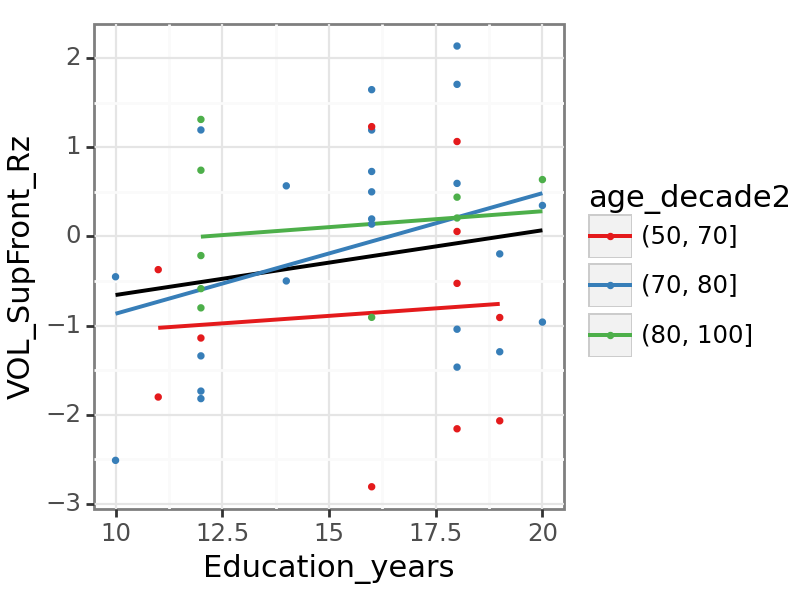

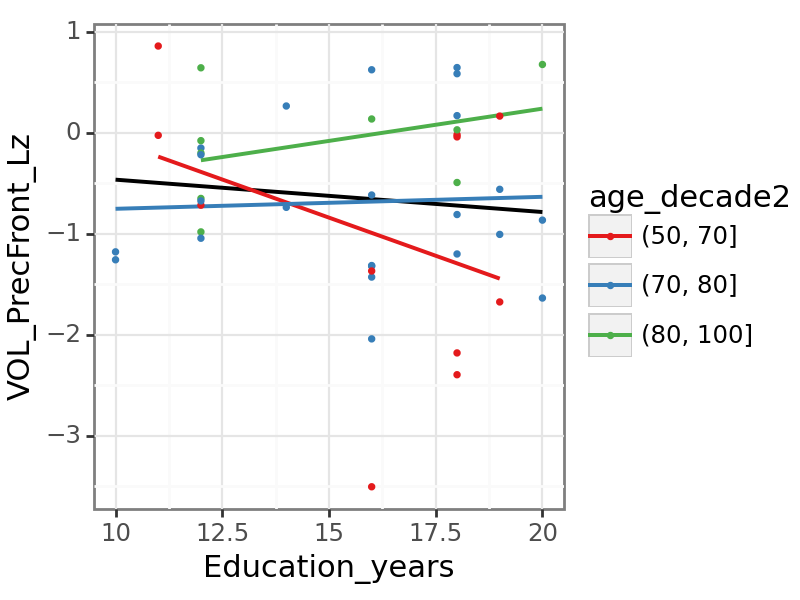

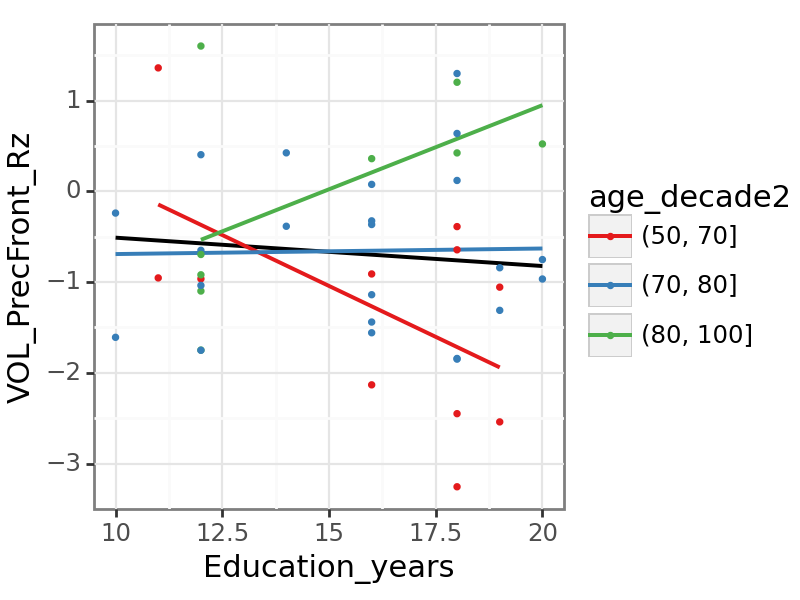

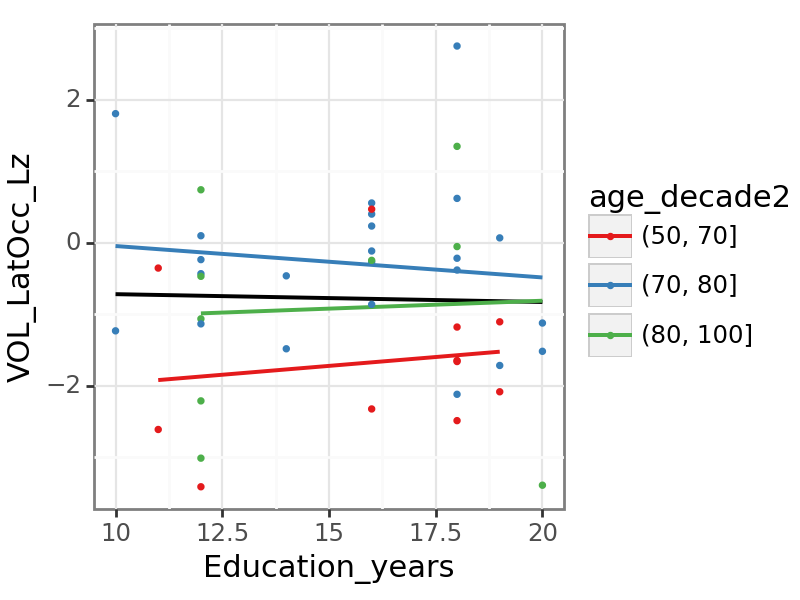

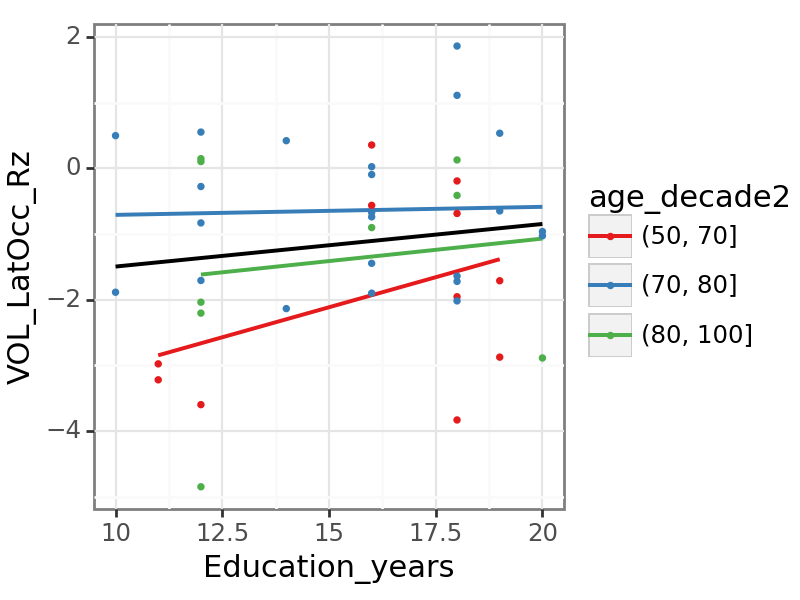

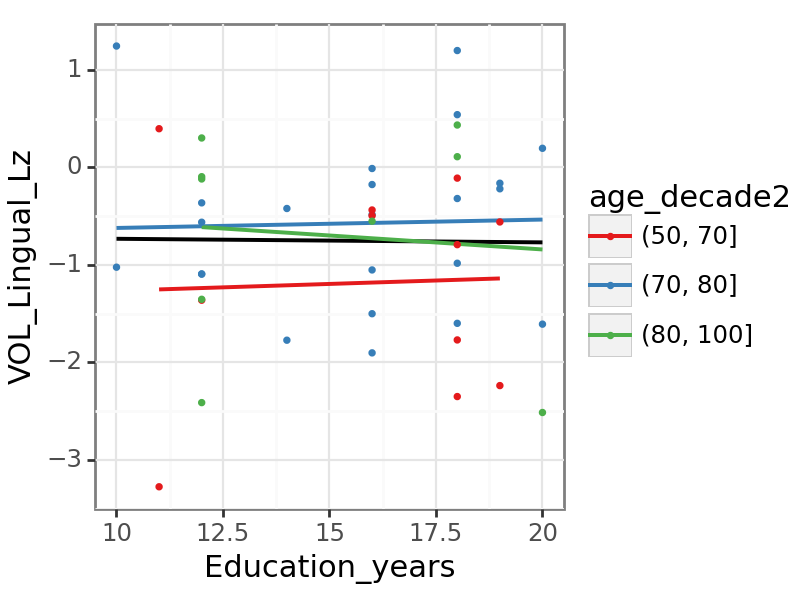

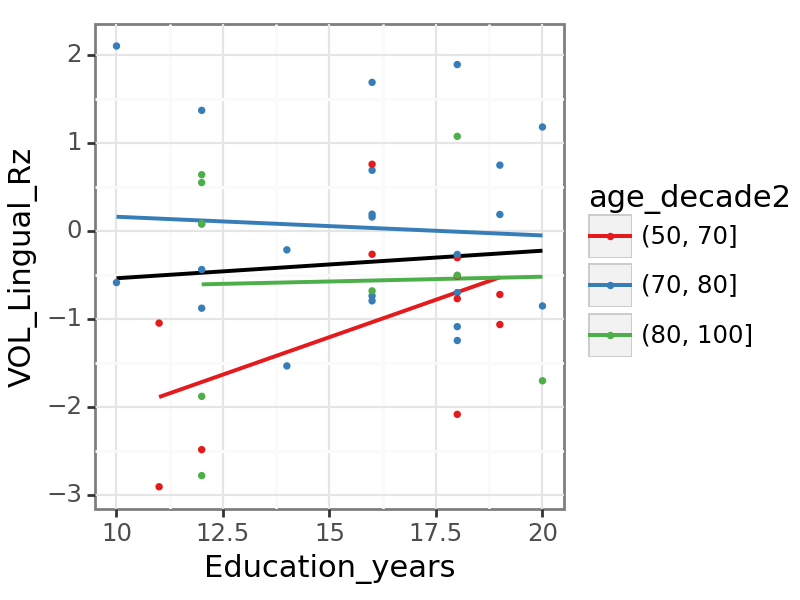

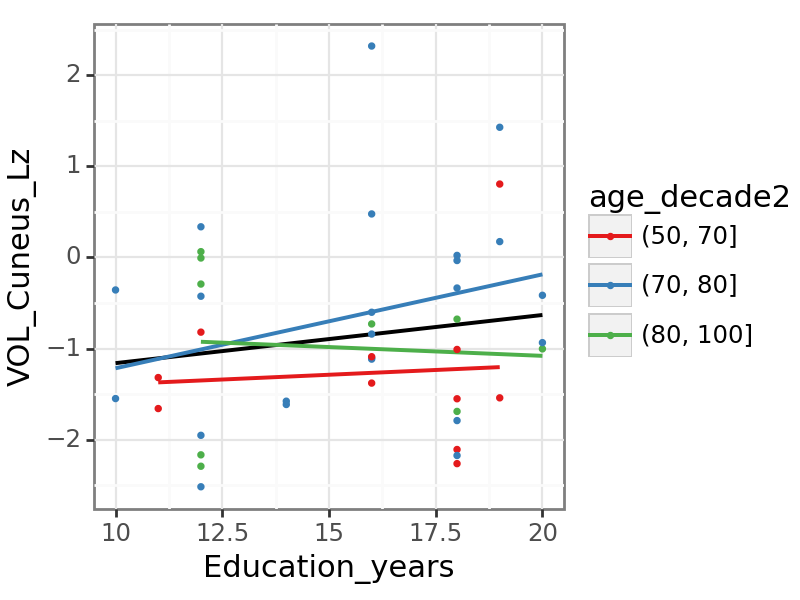

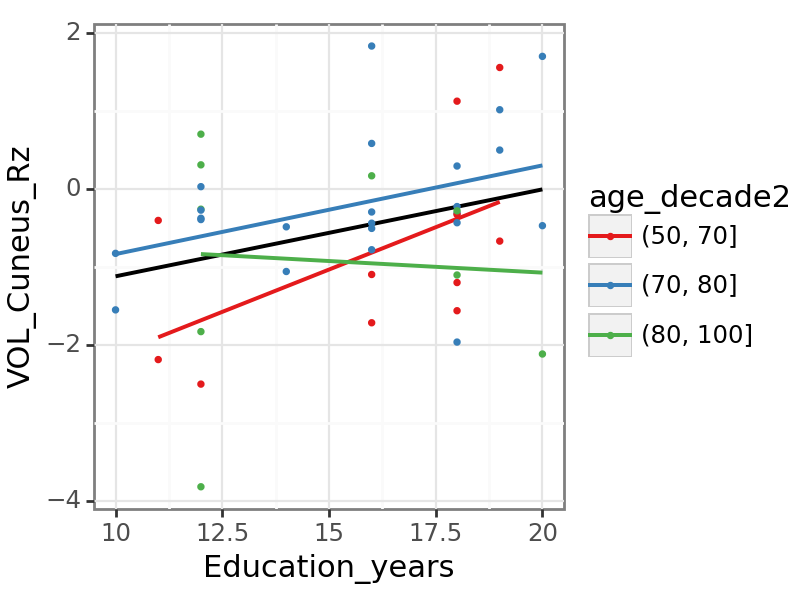

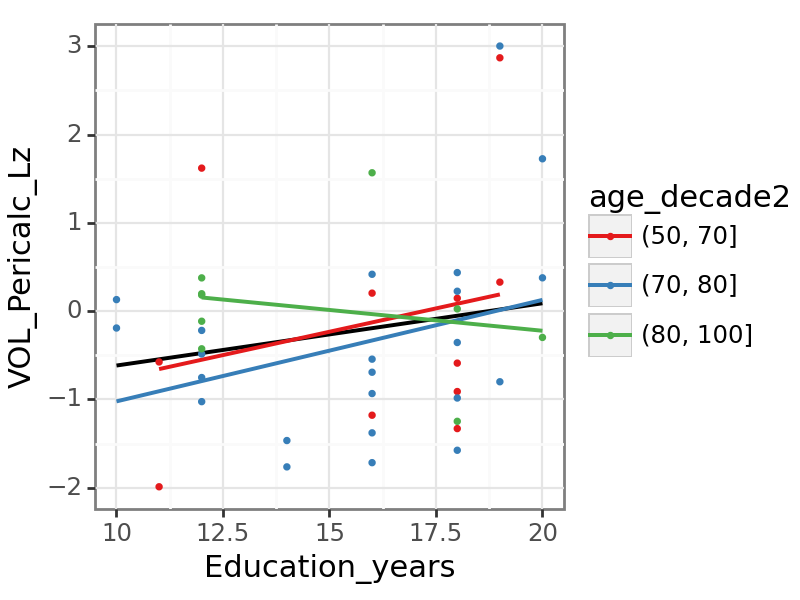

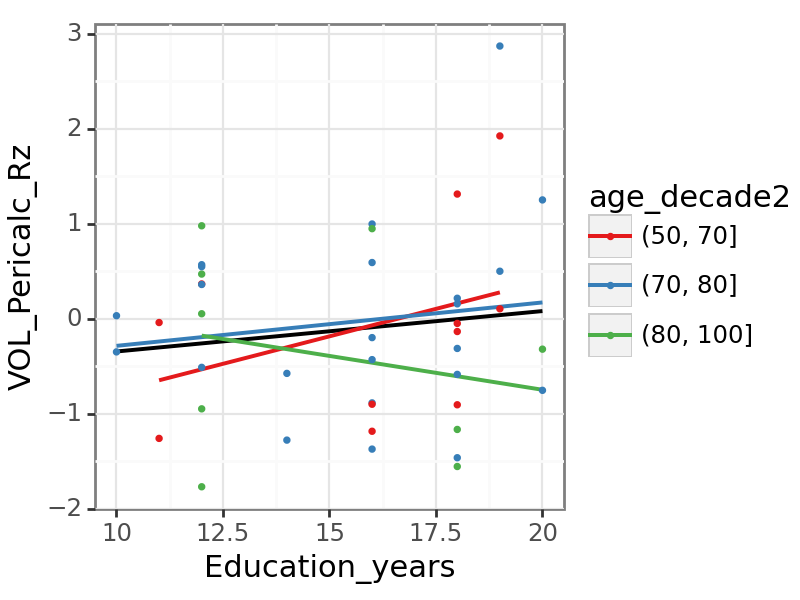

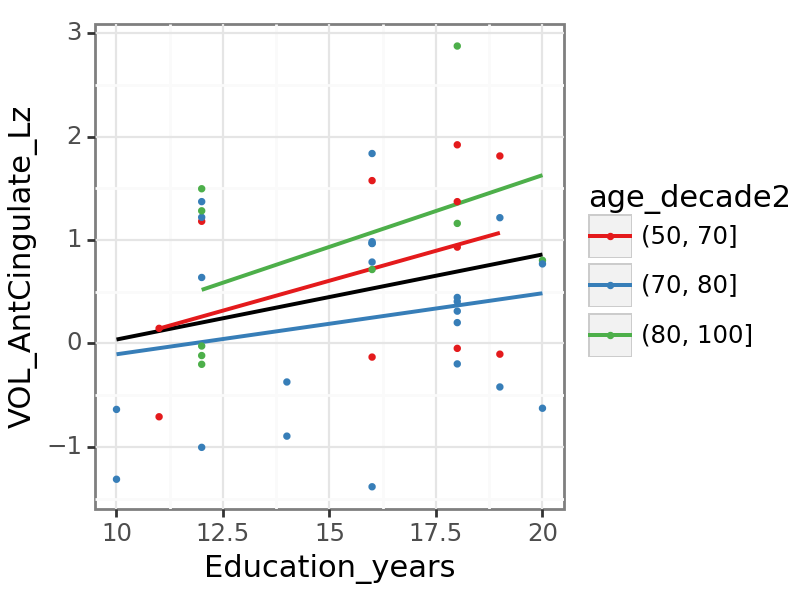

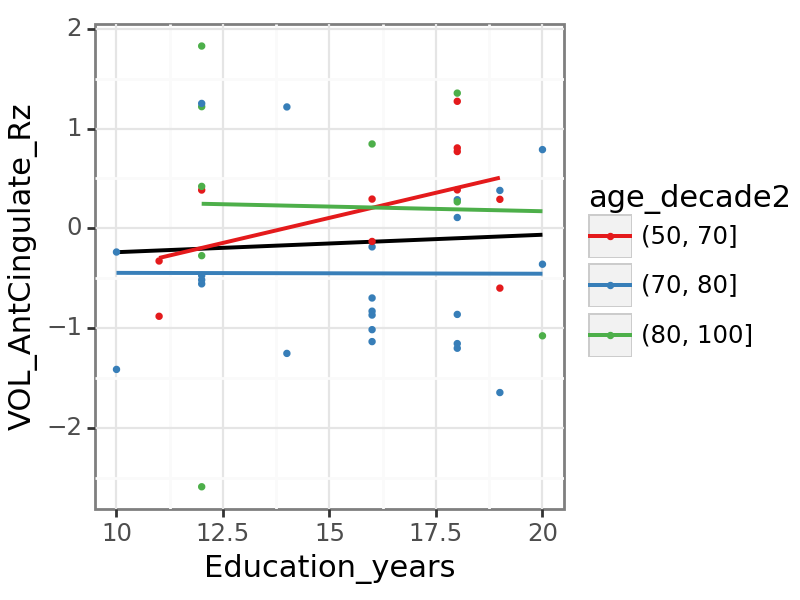

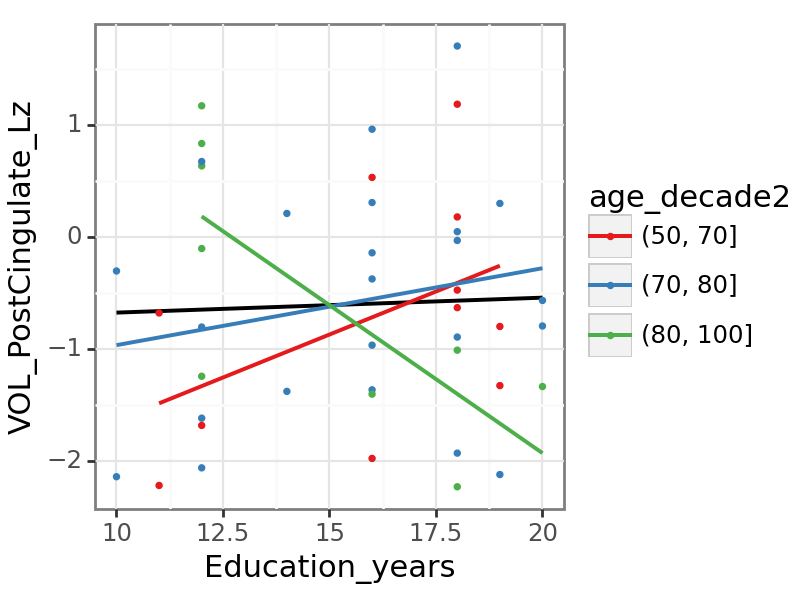

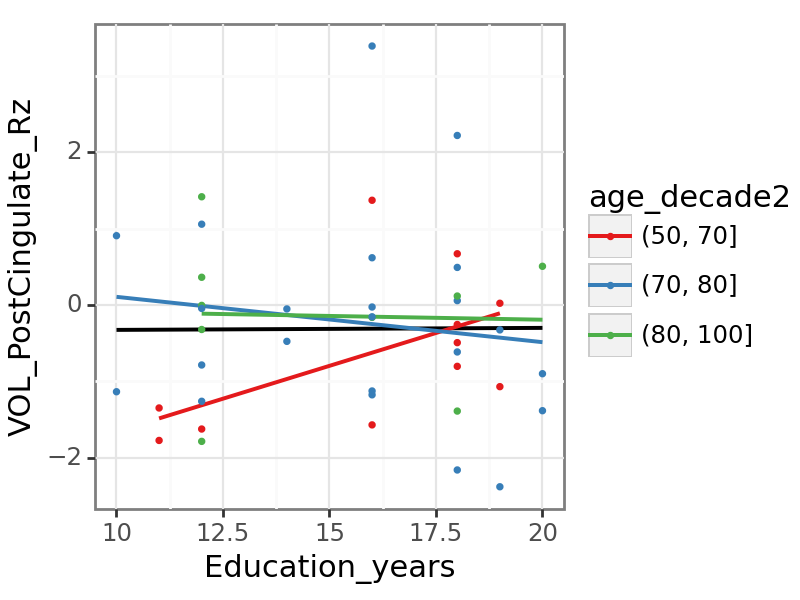

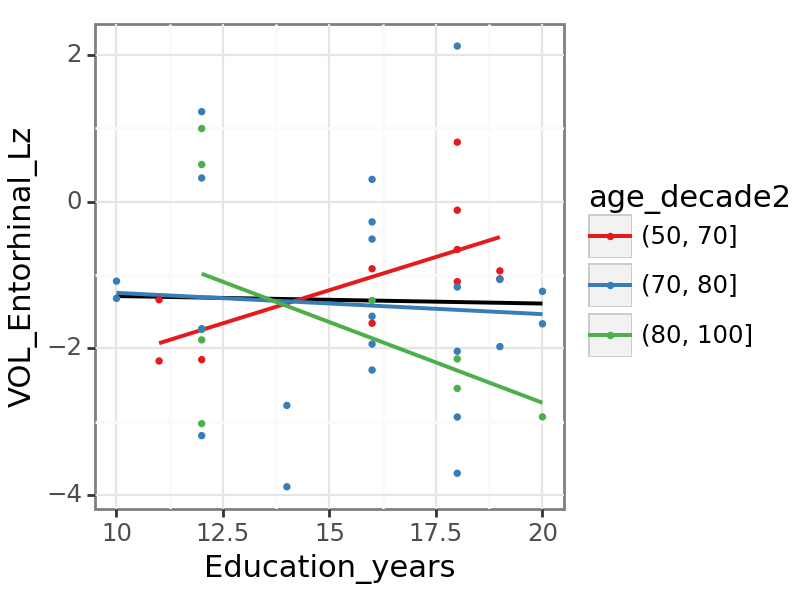

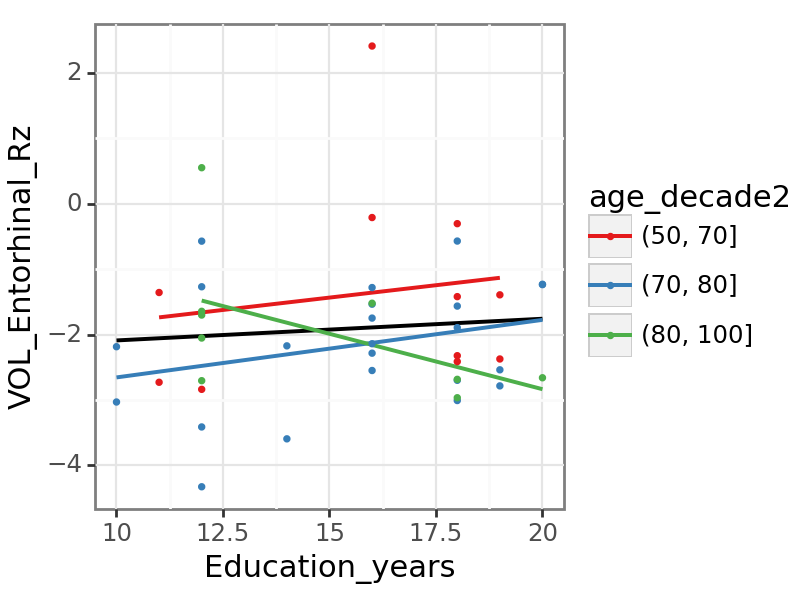

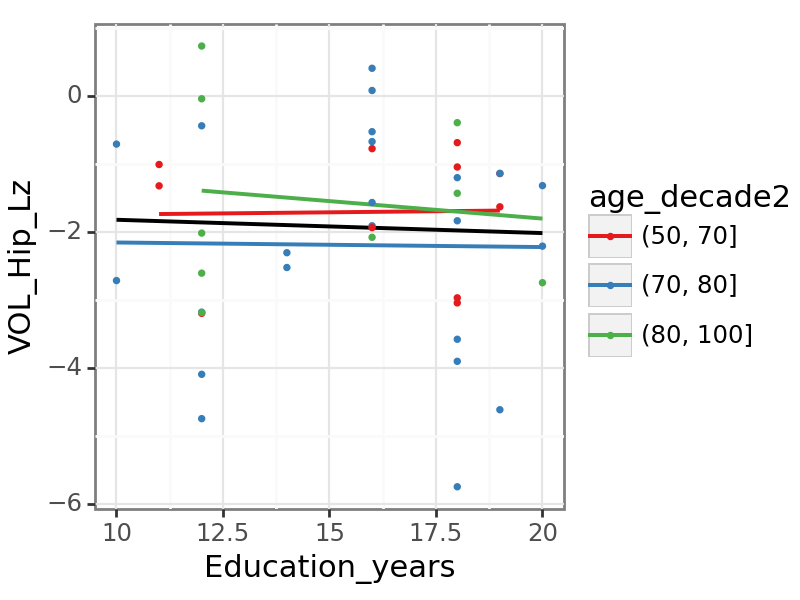

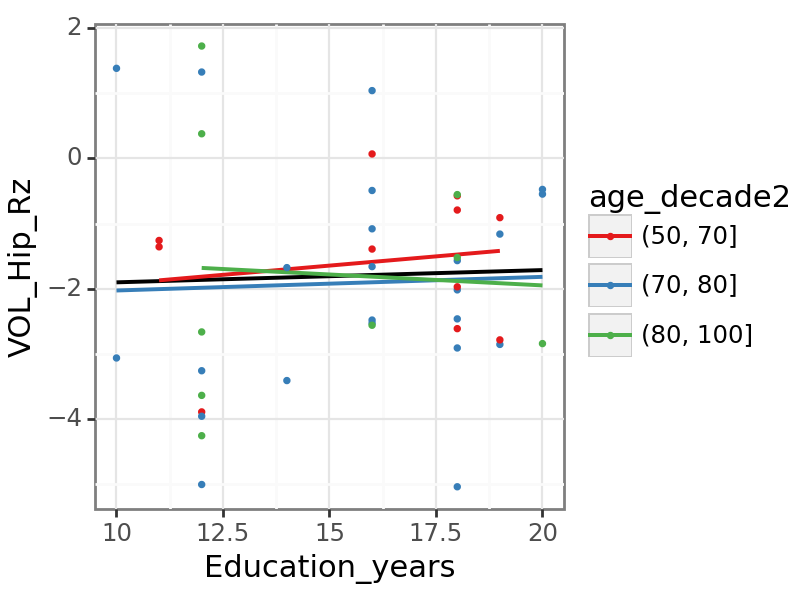

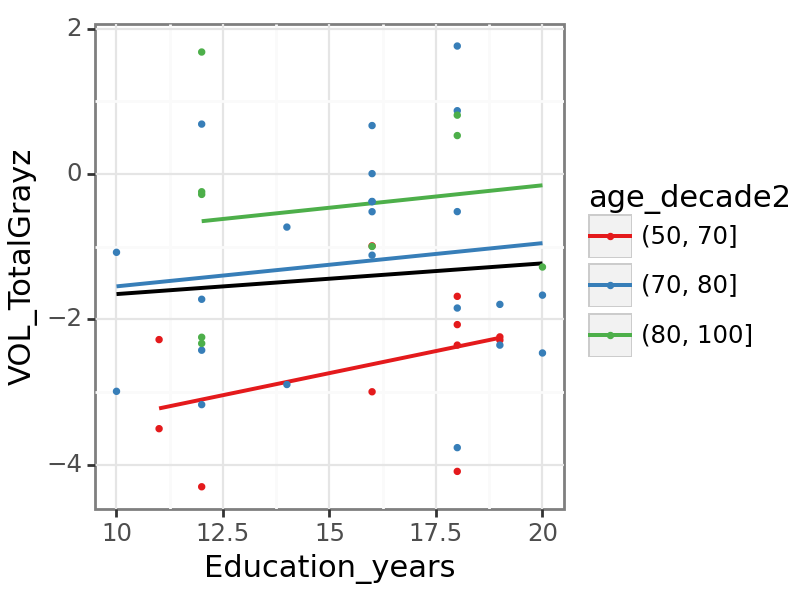

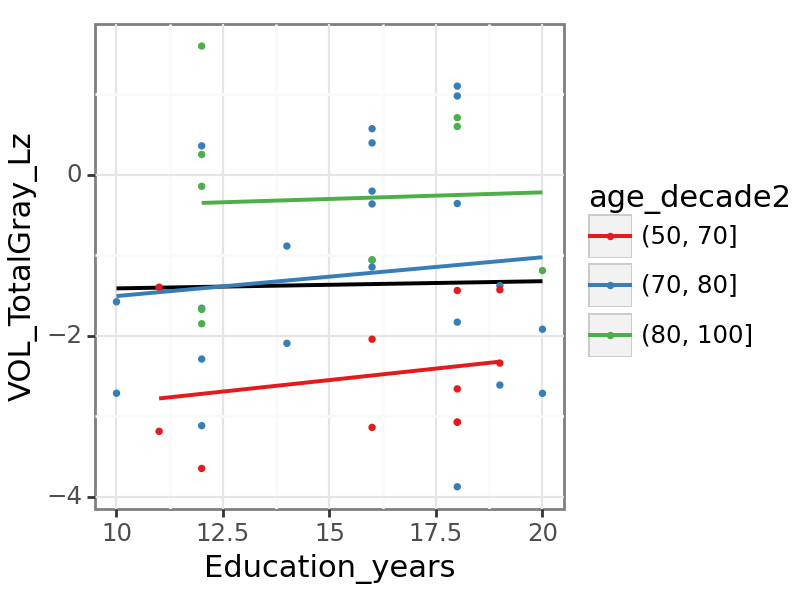

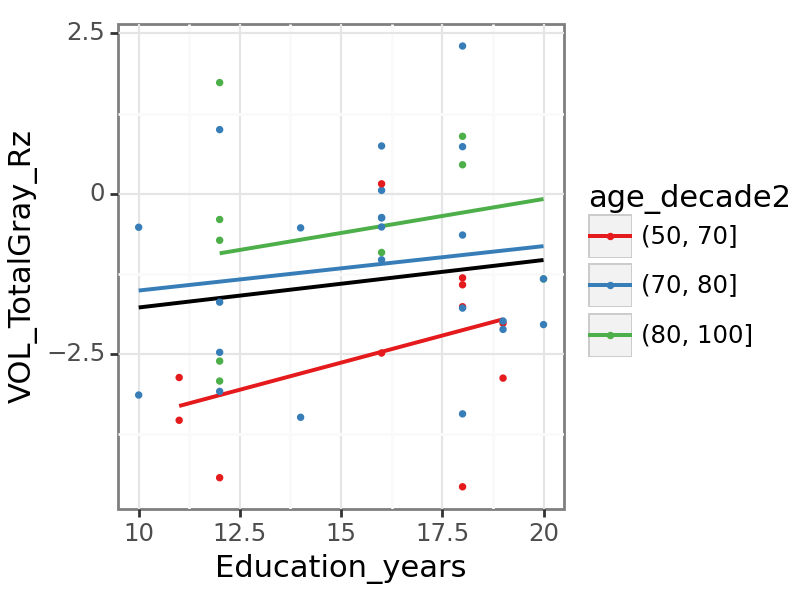

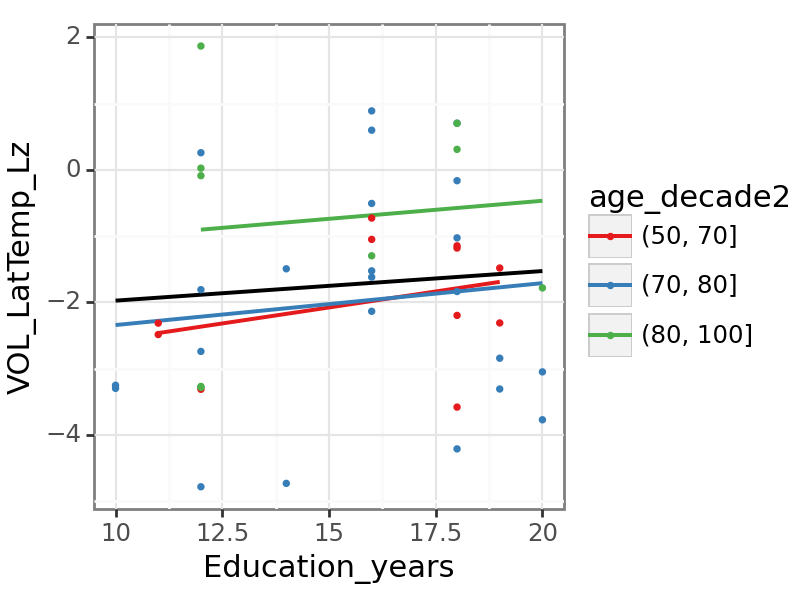

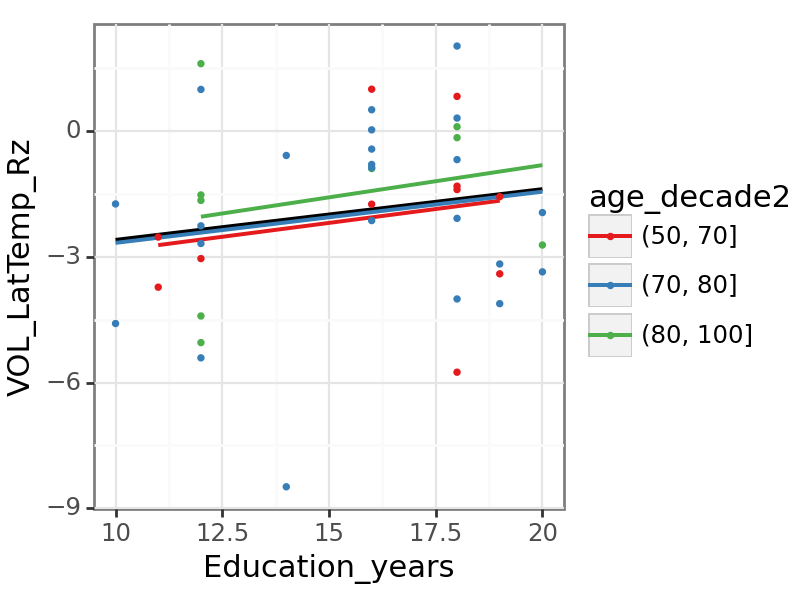

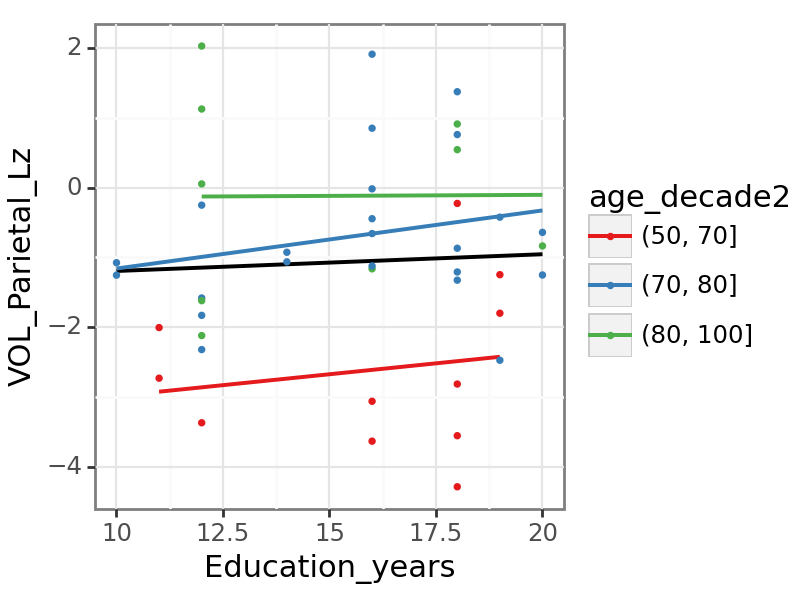

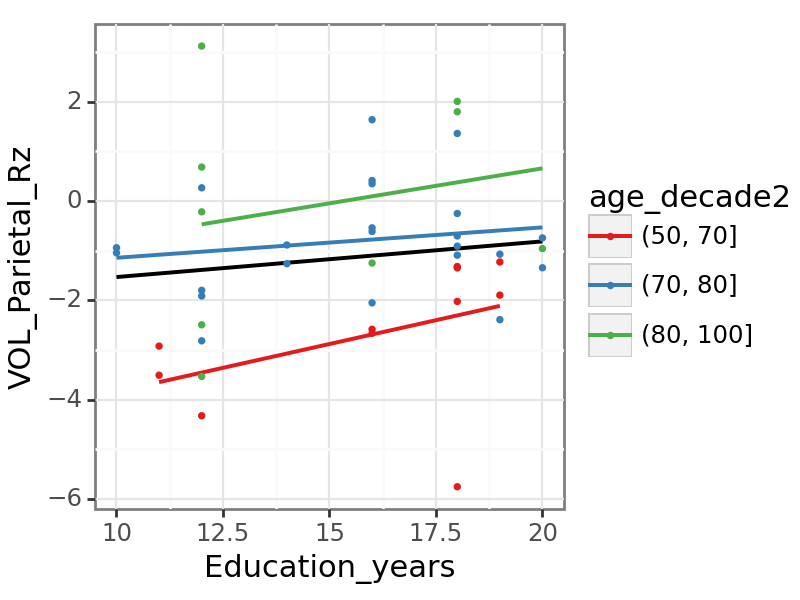

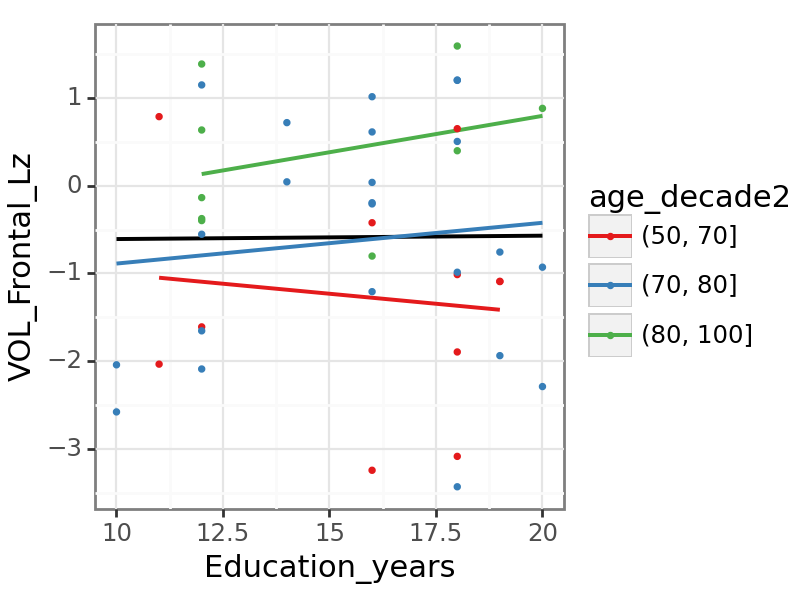

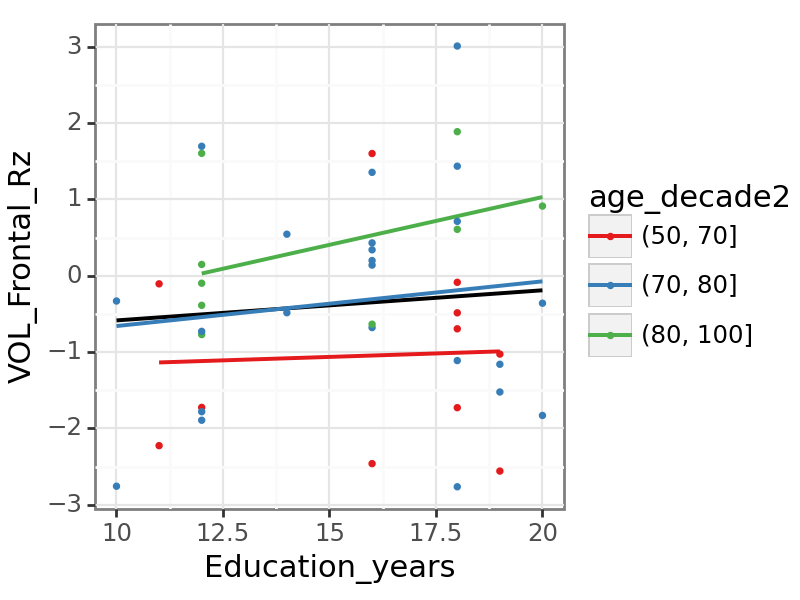

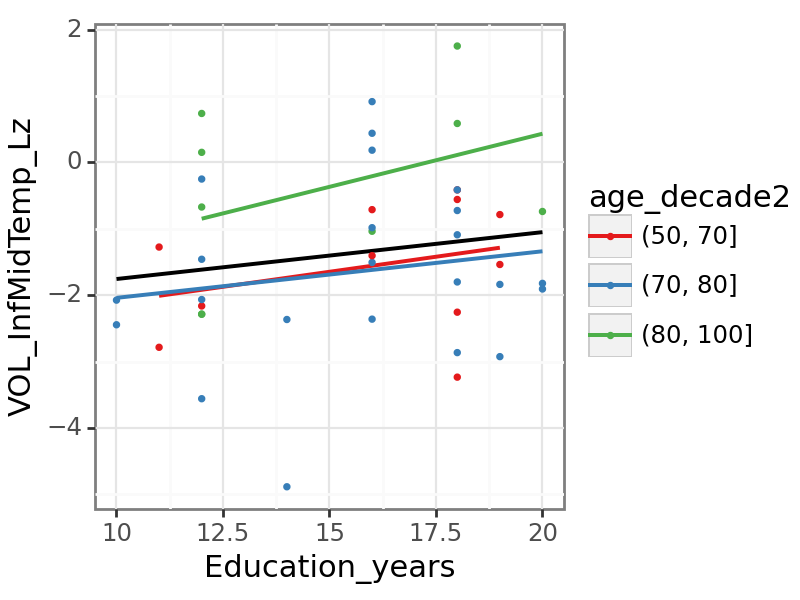

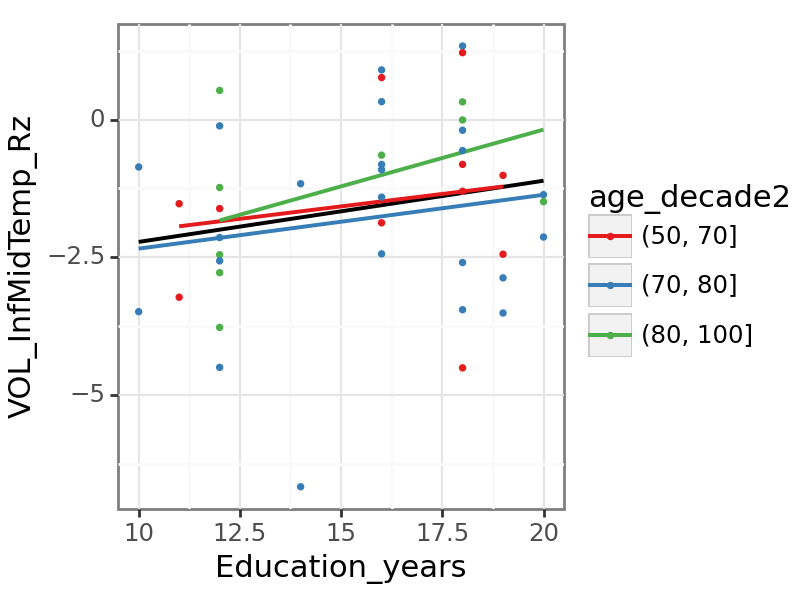

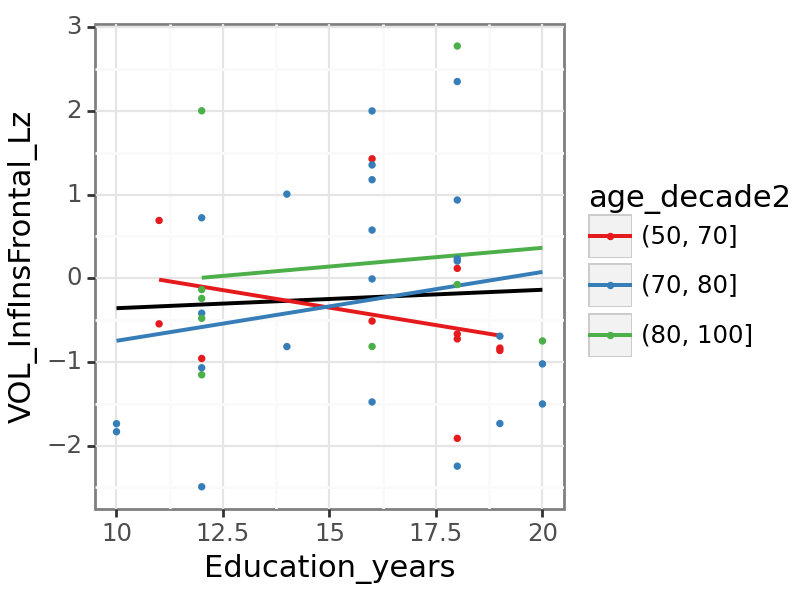

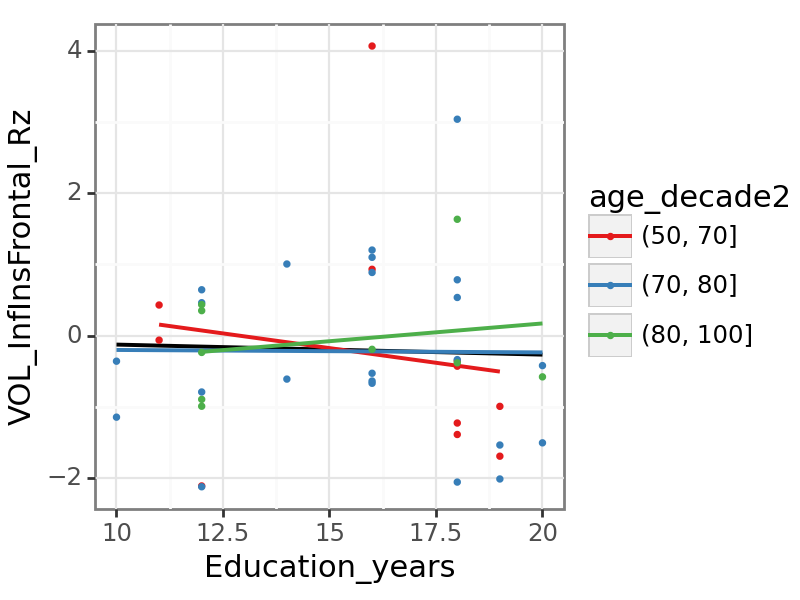

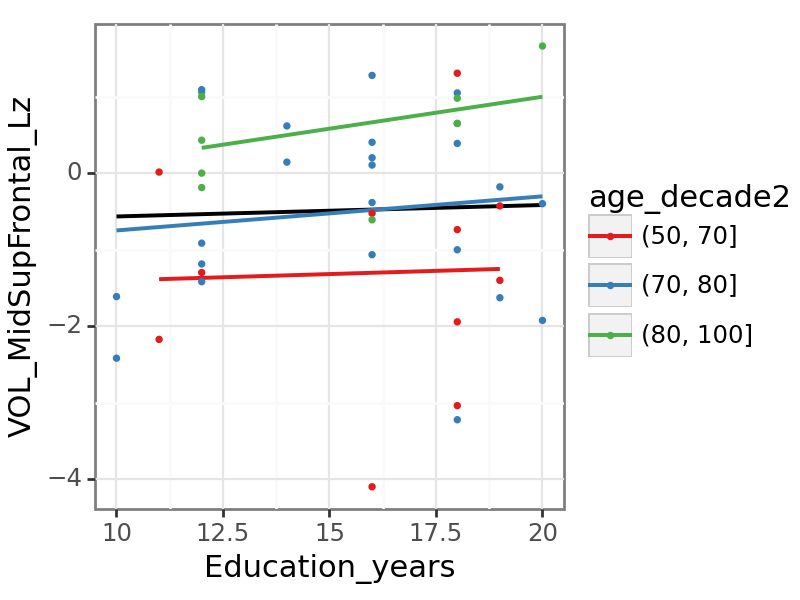

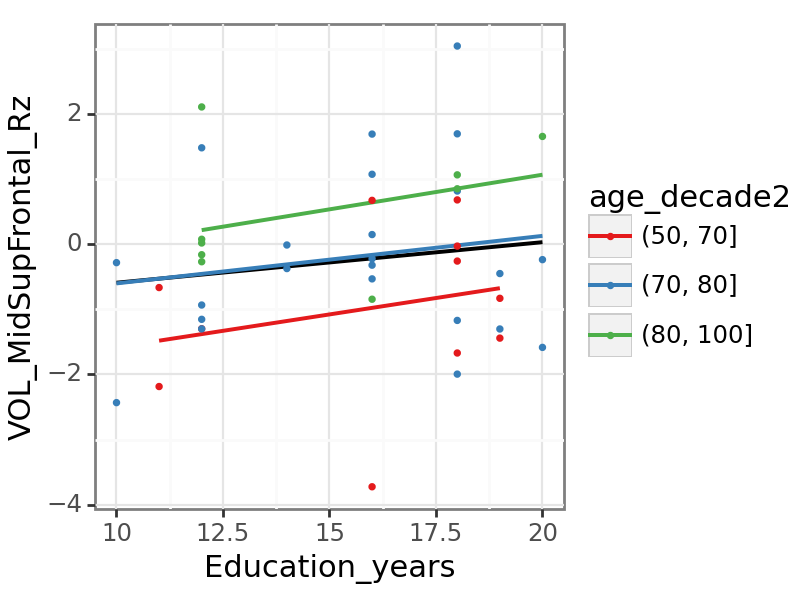

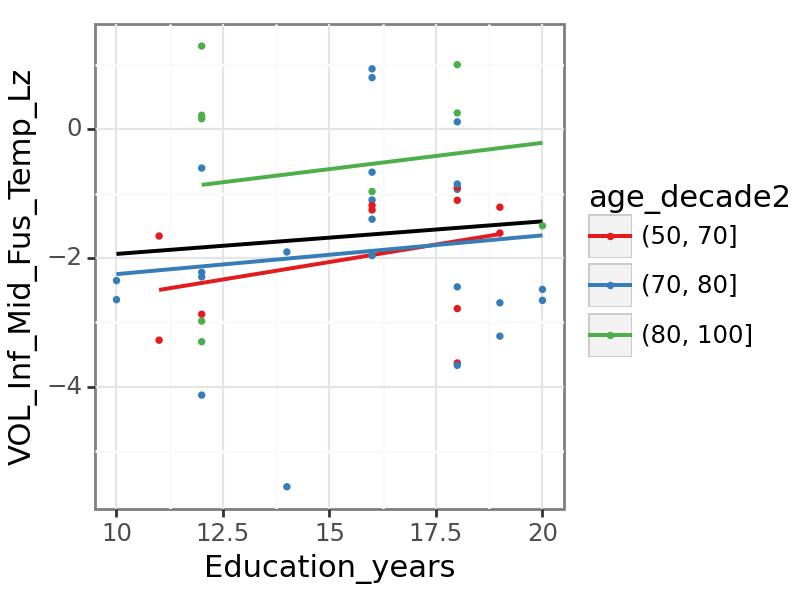

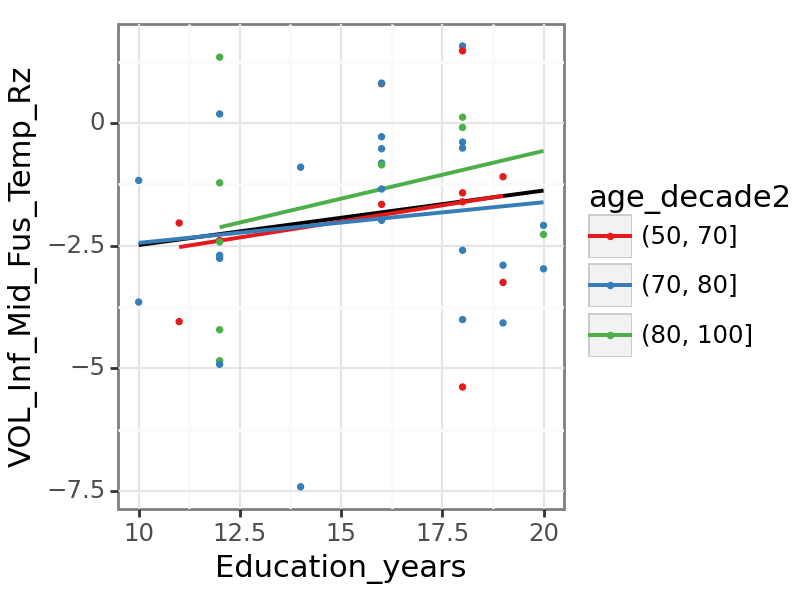

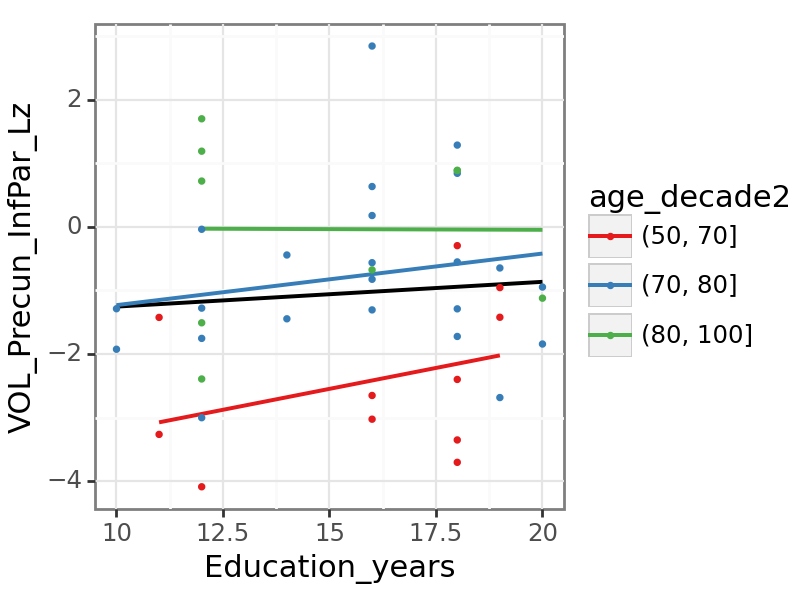

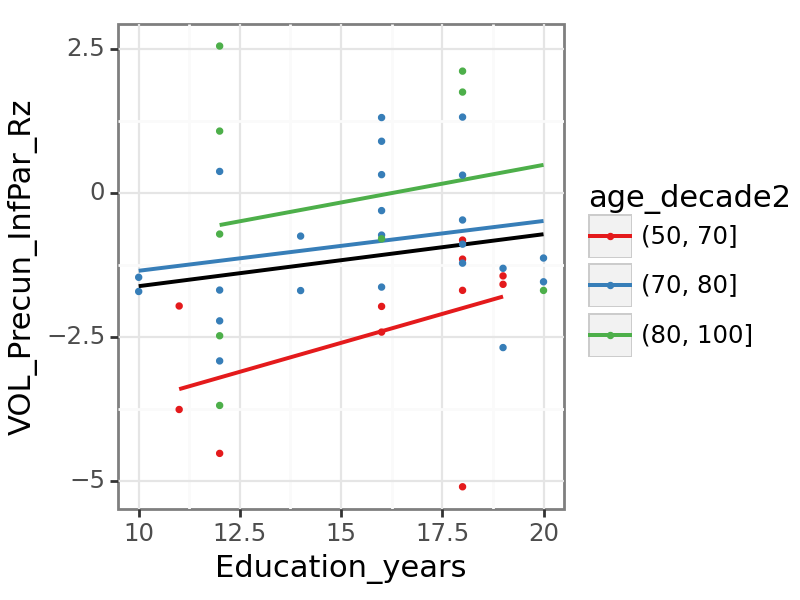

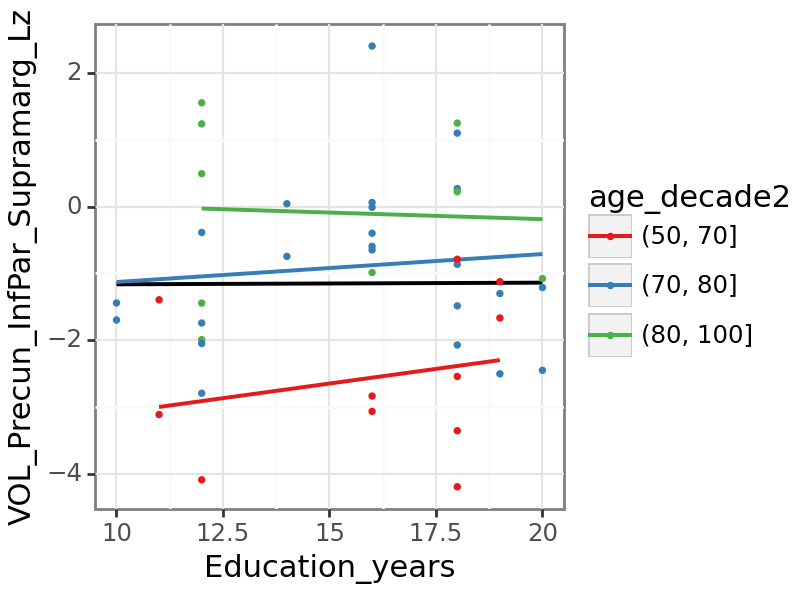

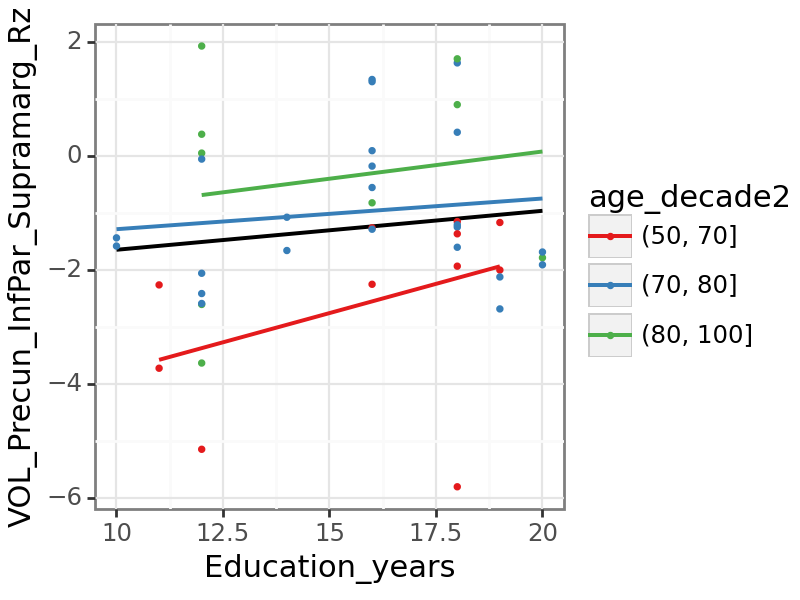

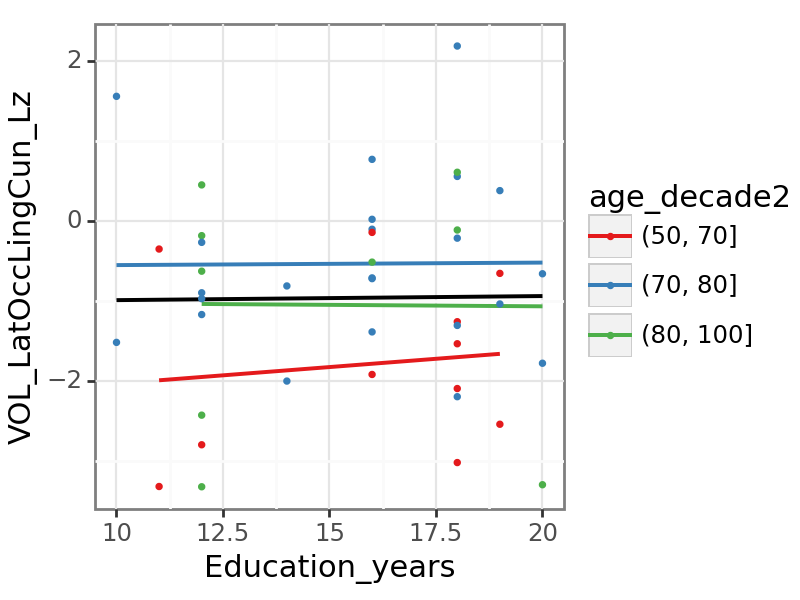

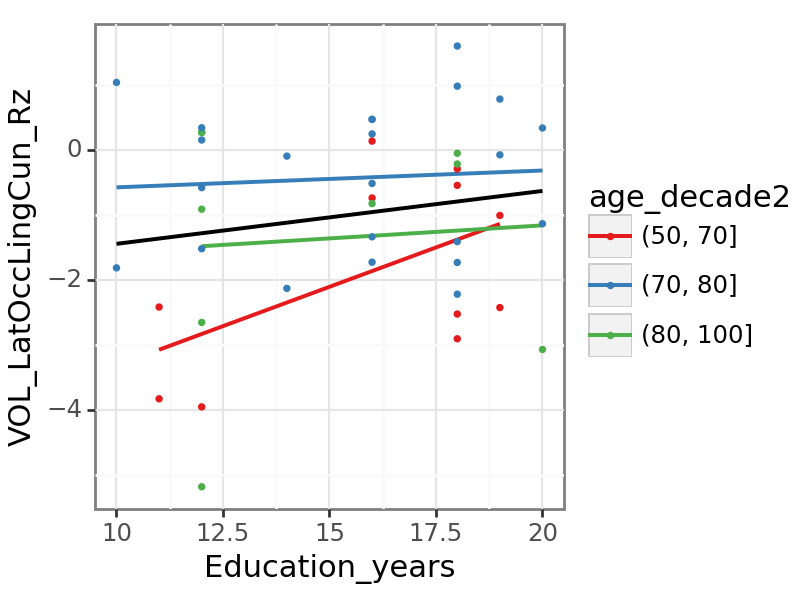

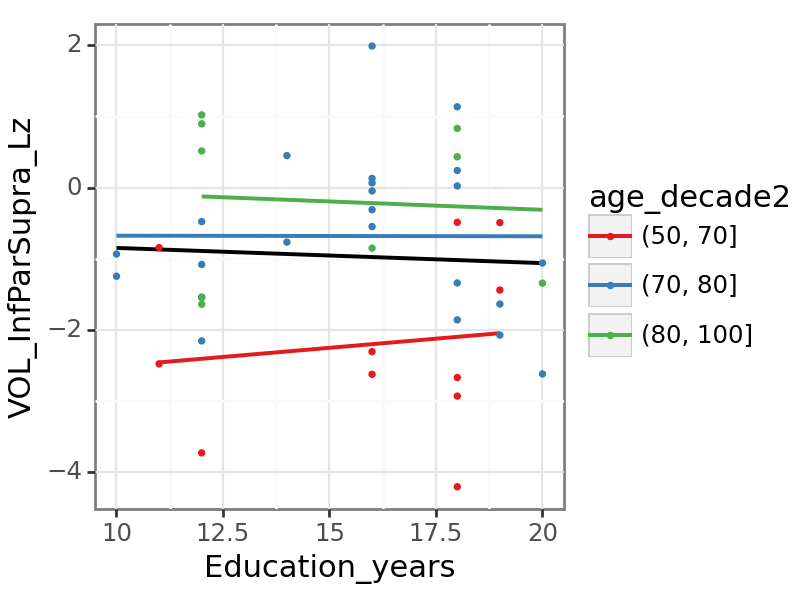

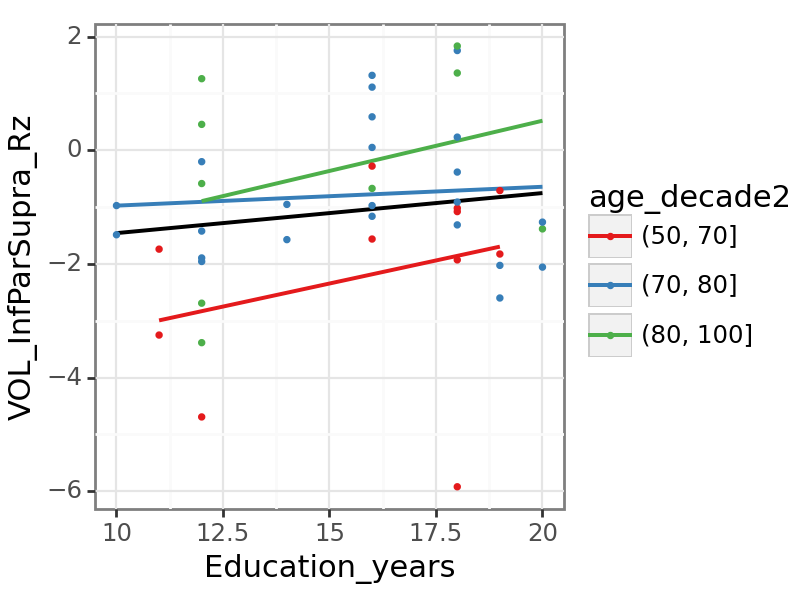

In [26]:

for var1 in vol_columns:

    subset_data = new_ras_rr[new_ras_rr['timepoint'].isin(['base'])].dropna(subset = ['Education_years', var1])
    subset_data2 = subset_data.copy()
    subset_data2 = subset_data2.groupby('age_decade2', observed=True).filter(lambda x: x['ID_ADM'].nunique()> 10)
    plot = (
            p9.ggplot(subset_data, p9.aes(x = 'Education_years', y = var1, color = 'age_decade2'))
            + p9.theme_bw(base_size = 11)
            + p9.geom_smooth(subset_data, size = 0.8, se = False, alpha = 1, color = 'black', method = 'lm')
            #+ p9.geom_smooth(subset_data2, size = 0.8, se = False, alpha = 1)
            
            + p9.geom_point(size = 0.5)
            + p9.labs(title = ('pval =  ' + p_value ), subtitle = 'baseline trial data with new para rr')
            + p9.scale_color_brewer(type='qual', palette='Set1')
        )

    plot = (
            p9.ggplot(subset_data, p9.aes(x = 'Education_years', y = var1, color = 'age_decade2'))
            + p9.theme_bw(base_size = 11)
            + p9.geom_smooth(subset_data, size = 0.8, se = False, alpha = 1, color = 'black', method = 'lm')
            + p9.geom_smooth(subset_data, size = 0.8, se = False, alpha = 1, method = 'lm')
            #+ p9.geom_smooth(subset_data2, size = 0.8, se = False, alpha = 1)
            
            + p9.geom_point(size = 0.5)
            + p9.scale_color_brewer(type='qual', palette='Set1')
        )

    print(plot)